In [1]:
# Name : Milan Girish Chandiramani
# CWID: 20032010
# Assignment Name and Description: KDD Project ann Model

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense, Dropout, Input, Activation
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2.18.0


## Data Processing

In [27]:
df = pd.read_csv('archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [28]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [29]:
df.shape

(70692, 22)

In [30]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [31]:
# Summarizing each column (e.g. min, max, mean ) Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

In [32]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [33]:
# Create a new column for BMI

# 0 = Underweight (below 18)
# 1 = Healthy (19-24)
# 2 = Overweight (25-29)
# 3 = Obese (30-39)
# 4 = Extremely Obese (40+)

def categorize_bmi(bmi):
    if bmi < 18:
        return 0
    elif 18 <= bmi <= 24:
        return 1
    elif 25 <= bmi <= 29:
        return 2
    elif 30 <= bmi <= 39:
        return 3
    else:
        return 4

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['BMI_Category'] = df['BMI_Category'].astype(float)
print(df[['BMI', 'BMI_Category']].head())

    BMI  BMI_Category
0  26.0           2.0
1  26.0           2.0
2  26.0           2.0
3  28.0           2.0
4  29.0           2.0


In [34]:
# Applying label encoder 
label_encoder = LabelEncoder()

# Encoding all categorical columns
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [35]:
# attr = df.drop(['Diabetes_012'],axis=1)
# target=pd.get_dummies(df.Diabetes_012,prefix='output').astype(int)
# print(attr.shape)
# print(target.shape)
# attr.head()
# target.head()
attr = df.drop(['Diabetes_binary'],axis=1)
target = df['Diabetes_binary']
# target=pd.get_dummies(df.Diabetes_binary,prefix='output').astype(int)
print(attr.shape)
print(target.shape)
attr.head()
target.head()

(70692, 22)
(70692,)


0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int64

In [36]:
## convert the data frames to arrays
X=attr.values
y=target.values
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(70692, 22)
(70692,)


In [37]:
 #creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=9)
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(49484, 22)
(49484,)
(21208, 22)
(21208,)


In [38]:



dropout_rate = 0.1
epochs = 10
batch_size = 1
learn_rate = 0.001

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=9, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

adam = Adam(learning_rate=learn_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
## you nee graphviz for ploting
from tensorflow.keras.utils import plot_model
# run in colab for graphviz plot
plot_model(model,to_file='model_plot1.png',show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [40]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 9)                   │             207 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Do it over a group of random states
#creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
random_states = range(102)  # You can adjust the range and step
with open('ann_accuracies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["RandomState", "Accuracy", "Neurons"])  # Write header
    accuracy_list = []
    max_rs = [0,0,0,0,0,0,0,0,0,0]
    max_acc = [0,0,0,0,0,0,0,0,0,0]
    min_rs = [0,0,0,0,0,0,0,0,0,0]
    min_acc = [0,0,0,0,0,0,0,0,0,0]
    for h_neurons in range(1,11):
        
        for random_state in random_states:
            print("\n\nRandom State:", rs)
            x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=random_state)
            sc=StandardScaler()
            x_train=sc.fit_transform(x_train)
            x_test=sc.fit_transform(x_test)
            print(x_train.shape)
            print(y_train.shape)
            print(x_test.shape)
            print(y_test.shape)
    
    
    
            dropout_rate = 0.1
            epochs = 10
            batch_size = 32
            # learn_rate = 0.001
        
            model = Sequential()
            model.add(Input(shape=(x_train.shape[1],)))
            model.add(Dense(units=h_neurons, activation='relu', input_dim=x_train.shape[1]))
    
    
            model.add(Dropout(dropout_rate))
            model.add(Dense(units=1, activation='sigmoid'))
    
            # adam = Adam(learning_rate=learn_rate)
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)
            accuracies = model.evaluate(x_test, y_test, verbose=1)
            print("Test score:", accuracies[0])
            print("Test Accuracy;", accuracies[1])
            print(accuracies)
            accuracy = accuracies[1]
            print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")
            if max_acc[h_neurons] < accuracy:
                max_acc[h_neurons] = accuracy
                max_rs[h_neurons] = random_state
            if min_acc[h_neurons] > accuracy:
                min_acc[h_neurons] = accuracy
                min_rs[h_neurons] = random_state
            # Save the result to the CSV file
            writer.writerow([random_state, accuracy, h_neurons])
            accuracy_list.append((random_state, accuracy, h_neurons))
## you nee graphviz for ploting
# from tensorflow.keras.utils import plot_model
# run in colab for graphviz plot
# plot_model(model,to_file='model_plot1.png',show_shapes=True, show_layer_names=True)



Random State: 0
(49484, 22)
(49484,)
(21208, 22)
(21208,)
Epoch 1/10


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.5963 - loss: 0.6676 - val_accuracy: 0.7443 - val_loss: 0.5709
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.7171 - loss: 0.5847 - val_accuracy: 0.7484 - val_loss: 0.5457
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7197 - loss: 0.5754 - val_accuracy: 0.7476 - val_loss: 0.5391
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.7191 - loss: 0.5713 - val_accuracy: 0.7488 - val_loss: 0.5333
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.7257 - loss: 0.5649 - val_accuracy: 0.7481 - val_loss: 0.5329
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.7215 - loss: 0.5670 - val_accuracy: 0.7475 - val_loss: 0.5299
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.7245 - loss: 0.5658 - val_accuracy: 0.7495 - val_loss: 0.5295
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7254 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.6548 - loss: 0.6418 - val_accuracy: 0.7239 - val_loss: 0.5921
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7028 - loss: 0.5938 - val_accuracy: 0.7388 - val_loss: 0.5612
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.7230 - loss: 0.5714 - val_accuracy: 0.7447 - val_loss: 0.5471
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.7213 - loss: 0.5683 - val_accuracy: 0.7445 - val_loss: 0.5410
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7164 - loss: 0.5715 - val_accuracy: 0.7456 - val_loss: 0.5383
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.7238 - loss: 0.5612 - val_accuracy: 0.7431 - val_loss: 0.5382
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.7234 - loss: 0.5628 - val_accuracy: 0.7468 - val_loss: 0.5363
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7209 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.5250 - loss: 0.8471 - val_accuracy: 0.7242 - val_loss: 0.5635
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7090 - loss: 0.5696 - val_accuracy: 0.7477 - val_loss: 0.5318
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.7209 - loss: 0.5546 - val_accuracy: 0.7482 - val_loss: 0.5246
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7195 - loss: 0.5538 - val_accuracy: 0.7493 - val_loss: 0.5227
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7246 - loss: 0.5478 - val_accuracy: 0.7500 - val_loss: 0.5206
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7260 - loss: 0.5488 - val_accuracy: 0.7498 - val_loss: 0.5200
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.7259 - loss: 0.5474 - val_accuracy: 0.7492 - val_loss: 0.5189
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.7221 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.6237 - loss: 0.6717 - val_accuracy: 0.7373 - val_loss: 0.5471
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.7152 - loss: 0.5611 - val_accuracy: 0.7431 - val_loss: 0.5312
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.7195 - loss: 0.5540 - val_accuracy: 0.7438 - val_loss: 0.5268
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7254 - loss: 0.5485 - val_accuracy: 0.7461 - val_loss: 0.5247
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.7221 - loss: 0.5492 - val_accuracy: 0.7472 - val_loss: 0.5231
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7221 - loss: 0.5518 - val_accuracy: 0.7456 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7223 - loss: 0.5502 - val_accuracy: 0.7450 - val_loss: 0.5226
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7246 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.5710 - loss: 0.7402 - val_accuracy: 0.7266 - val_loss: 0.5510
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7129 - loss: 0.5612 - val_accuracy: 0.7358 - val_loss: 0.5353
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7238 - loss: 0.5504 - val_accuracy: 0.7362 - val_loss: 0.5324
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7306 - loss: 0.5442 - val_accuracy: 0.7399 - val_loss: 0.5296
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.7265 - loss: 0.5469 - val_accuracy: 0.7384 - val_loss: 0.5297
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.7265 - loss: 0.5467 - val_accuracy: 0.7390 - val_loss: 0.5289
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.7282 - loss: 0.5451 - val_accuracy: 0.7407 - val_loss: 0.5275
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7275 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.6507 - loss: 0.6378 - val_accuracy: 0.7419 - val_loss: 0.5468
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7242 - loss: 0.5555 - val_accuracy: 0.7451 - val_loss: 0.5313
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7199 - loss: 0.5517 - val_accuracy: 0.7466 - val_loss: 0.5284
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7256 - loss: 0.5469 - val_accuracy: 0.7482 - val_loss: 0.5273
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7239 - loss: 0.5474 - val_accuracy: 0.7473 - val_loss: 0.5266
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7275 - loss: 0.5444 - val_accuracy: 0.7490 - val_loss: 0.5263
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7251 - loss: 0.5484 - val_accuracy: 0.7486 - val_loss: 0.5263
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.7247 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.6668 - loss: 0.6451 - val_accuracy: 0.7310 - val_loss: 0.5784
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7144 - loss: 0.5847 - val_accuracy: 0.7359 - val_loss: 0.5570
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7186 - loss: 0.5749 - val_accuracy: 0.7399 - val_loss: 0.5482
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.7219 - loss: 0.5681 - val_accuracy: 0.7412 - val_loss: 0.5437
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.7194 - loss: 0.5681 - val_accuracy: 0.7416 - val_loss: 0.5407
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7241 - loss: 0.5658 - val_accuracy: 0.7423 - val_loss: 0.5391
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7236 - loss: 0.5652 - val_accuracy: 0.7422 - val_loss: 0.5373
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7257 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.5705 - loss: 0.7040 - val_accuracy: 0.7336 - val_loss: 0.5511
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7157 - loss: 0.5641 - val_accuracy: 0.7433 - val_loss: 0.5313
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.7199 - loss: 0.5541 - val_accuracy: 0.7458 - val_loss: 0.5254
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.7251 - loss: 0.5505 - val_accuracy: 0.7474 - val_loss: 0.5241
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7285 - loss: 0.5440 - val_accuracy: 0.7468 - val_loss: 0.5227
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.7283 - loss: 0.5444 - val_accuracy: 0.7488 - val_loss: 0.5220
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7215 - loss: 0.5510 - val_accuracy: 0.7470 - val_loss: 0.5214
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7233 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.6073 - loss: 0.6730 - val_accuracy: 0.7300 - val_loss: 0.5600
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.7150 - loss: 0.5635 - val_accuracy: 0.7399 - val_loss: 0.5388
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7213 - loss: 0.5531 - val_accuracy: 0.7417 - val_loss: 0.5324
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.7283 - loss: 0.5450 - val_accuracy: 0.7428 - val_loss: 0.5310
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7233 - loss: 0.5492 - val_accuracy: 0.7425 - val_loss: 0.5298
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7253 - loss: 0.5463 - val_accuracy: 0.7420 - val_loss: 0.5292
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.7252 - loss: 0.5479 - val_accuracy: 0.7434 - val_loss: 0.5280
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.7283 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.6347 - loss: 0.6527 - val_accuracy: 0.7306 - val_loss: 0.5832
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7103 - loss: 0.5895 - val_accuracy: 0.7417 - val_loss: 0.5556
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7226 - loss: 0.5709 - val_accuracy: 0.7447 - val_loss: 0.5436
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7235 - loss: 0.5672 - val_accuracy: 0.7446 - val_loss: 0.5381
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.7246 - loss: 0.5662 - val_accuracy: 0.7457 - val_loss: 0.5356
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.7257 - loss: 0.5647 - val_accuracy: 0.7452 - val_loss: 0.5332
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7216 - loss: 0.5672 - val_accuracy: 0.7456 - val_loss: 0.5330
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7301 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.6425 - loss: 0.6443 - val_accuracy: 0.7312 - val_loss: 0.5517
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.7150 - loss: 0.5577 - val_accuracy: 0.7370 - val_loss: 0.5358
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7270 - loss: 0.5466 - val_accuracy: 0.7403 - val_loss: 0.5319
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7253 - loss: 0.5489 - val_accuracy: 0.7423 - val_loss: 0.5294
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7265 - loss: 0.5474 - val_accuracy: 0.7419 - val_loss: 0.5275
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7250 - loss: 0.5464 - val_accuracy: 0.7430 - val_loss: 0.5258
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.7285 - loss: 0.5454 - val_accuracy: 0.7423 - val_loss: 0.5259
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.7258 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.6503 - loss: 0.6565 - val_accuracy: 0.7448 - val_loss: 0.5708
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.7137 - loss: 0.5886 - val_accuracy: 0.7548 - val_loss: 0.5464
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7218 - loss: 0.5720 - val_accuracy: 0.7580 - val_loss: 0.5368
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7191 - loss: 0.5697 - val_accuracy: 0.7599 - val_loss: 0.5311
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7176 - loss: 0.5708 - val_accuracy: 0.7612 - val_loss: 0.5280
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.7202 - loss: 0.5713 - val_accuracy: 0.7604 - val_loss: 0.5263
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7205 - loss: 0.5685 - val_accuracy: 0.7596 - val_loss: 0.5251
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7265 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.5841 - loss: 0.7107 - val_accuracy: 0.7332 - val_loss: 0.5532
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7122 - loss: 0.5644 - val_accuracy: 0.7438 - val_loss: 0.5318
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.7186 - loss: 0.5540 - val_accuracy: 0.7495 - val_loss: 0.5266
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.7226 - loss: 0.5494 - val_accuracy: 0.7510 - val_loss: 0.5249
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7198 - loss: 0.5523 - val_accuracy: 0.7516 - val_loss: 0.5234
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.7232 - loss: 0.5501 - val_accuracy: 0.7527 - val_loss: 0.5225
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7205 - loss: 0.5520 - val_accuracy: 0.7511 - val_loss: 0.5217
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7189 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.5554 - loss: 0.6975 - val_accuracy: 0.7403 - val_loss: 0.5522
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7123 - loss: 0.5628 - val_accuracy: 0.7468 - val_loss: 0.5328
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.7197 - loss: 0.5528 - val_accuracy: 0.7480 - val_loss: 0.5274
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7181 - loss: 0.5529 - val_accuracy: 0.7495 - val_loss: 0.5251
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7222 - loss: 0.5529 - val_accuracy: 0.7505 - val_loss: 0.5241
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.7196 - loss: 0.5527 - val_accuracy: 0.7510 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.7231 - loss: 0.5481 - val_accuracy: 0.7517 - val_loss: 0.5225
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7204 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.5378 - loss: 0.7016 - val_accuracy: 0.7339 - val_loss: 0.5547
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7180 - loss: 0.5603 - val_accuracy: 0.7412 - val_loss: 0.5346
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.7186 - loss: 0.5523 - val_accuracy: 0.7423 - val_loss: 0.5291
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7222 - loss: 0.5502 - val_accuracy: 0.7438 - val_loss: 0.5266
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.7237 - loss: 0.5470 - val_accuracy: 0.7441 - val_loss: 0.5251
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7248 - loss: 0.5460 - val_accuracy: 0.7451 - val_loss: 0.5244
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7273 - loss: 0.5431 - val_accuracy: 0.7455 - val_loss: 0.5236
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7255 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.6759 - loss: 0.6133 - val_accuracy: 0.7404 - val_loss: 0.5434
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7206 - loss: 0.5552 - val_accuracy: 0.7445 - val_loss: 0.5312
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.7198 - loss: 0.5549 - val_accuracy: 0.7466 - val_loss: 0.5275
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7247 - loss: 0.5475 - val_accuracy: 0.7481 - val_loss: 0.5261
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7288 - loss: 0.5423 - val_accuracy: 0.7493 - val_loss: 0.5256
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7246 - loss: 0.5488 - val_accuracy: 0.7471 - val_loss: 0.5243
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.7237 - loss: 0.5471 - val_accuracy: 0.7473 - val_loss: 0.5231
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7248 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.6294 - loss: 0.6584 - val_accuracy: 0.7433 - val_loss: 0.5726
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.7129 - loss: 0.5879 - val_accuracy: 0.7496 - val_loss: 0.5487
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.7173 - loss: 0.5742 - val_accuracy: 0.7546 - val_loss: 0.5395
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.7237 - loss: 0.5699 - val_accuracy: 0.7556 - val_loss: 0.5351
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7257 - loss: 0.5644 - val_accuracy: 0.7544 - val_loss: 0.5325
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.7223 - loss: 0.5666 - val_accuracy: 0.7563 - val_loss: 0.5285
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.7221 - loss: 0.5689 - val_accuracy: 0.7554 - val_loss: 0.5300
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7241 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.5952 - loss: 0.6656 - val_accuracy: 0.7345 - val_loss: 0.5861
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7189 - loss: 0.5851 - val_accuracy: 0.7450 - val_loss: 0.5540
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7239 - loss: 0.5687 - val_accuracy: 0.7496 - val_loss: 0.5425
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7266 - loss: 0.5624 - val_accuracy: 0.7500 - val_loss: 0.5374
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.7260 - loss: 0.5621 - val_accuracy: 0.7496 - val_loss: 0.5345
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.7223 - loss: 0.5684 - val_accuracy: 0.7510 - val_loss: 0.5316
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.7214 - loss: 0.5655 - val_accuracy: 0.7518 - val_loss: 0.5323
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.7233 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.6581 - loss: 0.6424 - val_accuracy: 0.7288 - val_loss: 0.5805
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.7104 - loss: 0.5877 - val_accuracy: 0.7379 - val_loss: 0.5589
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.7234 - loss: 0.5684 - val_accuracy: 0.7444 - val_loss: 0.5464
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.7212 - loss: 0.5669 - val_accuracy: 0.7453 - val_loss: 0.5412
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7241 - loss: 0.5667 - val_accuracy: 0.7467 - val_loss: 0.5384
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7229 - loss: 0.5649 - val_accuracy: 0.7462 - val_loss: 0.5351
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.7214 - loss: 0.5674 - val_accuracy: 0.7456 - val_loss: 0.5349
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7223 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.6105 - loss: 0.6864 - val_accuracy: 0.7356 - val_loss: 0.5539
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.7165 - loss: 0.5628 - val_accuracy: 0.7477 - val_loss: 0.5322
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7234 - loss: 0.5504 - val_accuracy: 0.7488 - val_loss: 0.5262
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7238 - loss: 0.5519 - val_accuracy: 0.7500 - val_loss: 0.5241
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.7249 - loss: 0.5485 - val_accuracy: 0.7496 - val_loss: 0.5222
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7221 - loss: 0.5500 - val_accuracy: 0.7479 - val_loss: 0.5213
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7241 - loss: 0.5488 - val_accuracy: 0.7497 - val_loss: 0.5207
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.7248 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.5068 - loss: 0.7148 - val_accuracy: 0.7038 - val_loss: 0.6104
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.7014 - loss: 0.6042 - val_accuracy: 0.7368 - val_loss: 0.5665
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7199 - loss: 0.5730 - val_accuracy: 0.7420 - val_loss: 0.5496
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7223 - loss: 0.5672 - val_accuracy: 0.7443 - val_loss: 0.5428
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7235 - loss: 0.5629 - val_accuracy: 0.7460 - val_loss: 0.5382
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7197 - loss: 0.5690 - val_accuracy: 0.7446 - val_loss: 0.5362
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7245 - loss: 0.5653 - val_accuracy: 0.7448 - val_loss: 0.5351
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7300 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.6652 - loss: 0.6396 - val_accuracy: 0.7215 - val_loss: 0.5851
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7077 - loss: 0.5920 - val_accuracy: 0.7400 - val_loss: 0.5570
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.7194 - loss: 0.5739 - val_accuracy: 0.7428 - val_loss: 0.5455
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.7218 - loss: 0.5695 - val_accuracy: 0.7465 - val_loss: 0.5389
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.7181 - loss: 0.5714 - val_accuracy: 0.7498 - val_loss: 0.5335
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.7213 - loss: 0.5659 - val_accuracy: 0.7520 - val_loss: 0.5319
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7214 - loss: 0.5663 - val_accuracy: 0.7493 - val_loss: 0.5314
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7221 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.5657 - loss: 0.7097 - val_accuracy: 0.7128 - val_loss: 0.5996
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7087 - loss: 0.5908 - val_accuracy: 0.7340 - val_loss: 0.5654
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7220 - loss: 0.5715 - val_accuracy: 0.7383 - val_loss: 0.5533
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7290 - loss: 0.5629 - val_accuracy: 0.7408 - val_loss: 0.5477
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.7242 - loss: 0.5633 - val_accuracy: 0.7422 - val_loss: 0.5445
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7220 - loss: 0.5653 - val_accuracy: 0.7410 - val_loss: 0.5423
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7237 - loss: 0.5645 - val_accuracy: 0.7389 - val_loss: 0.5426
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7215 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.6204 - loss: 0.6680 - val_accuracy: 0.7249 - val_loss: 0.5831
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7088 - loss: 0.5899 - val_accuracy: 0.7339 - val_loss: 0.5596
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7195 - loss: 0.5716 - val_accuracy: 0.7363 - val_loss: 0.5495
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.7246 - loss: 0.5674 - val_accuracy: 0.7424 - val_loss: 0.5410
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7249 - loss: 0.5640 - val_accuracy: 0.7421 - val_loss: 0.5387
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.7253 - loss: 0.5610 - val_accuracy: 0.7391 - val_loss: 0.5392
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.7213 - loss: 0.5676 - val_accuracy: 0.7439 - val_loss: 0.5357
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.7206 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.6517 - loss: 0.6422 - val_accuracy: 0.7450 - val_loss: 0.5433
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7151 - loss: 0.5642 - val_accuracy: 0.7506 - val_loss: 0.5225
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7192 - loss: 0.5542 - val_accuracy: 0.7531 - val_loss: 0.5182
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7252 - loss: 0.5466 - val_accuracy: 0.7518 - val_loss: 0.5170
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7236 - loss: 0.5505 - val_accuracy: 0.7509 - val_loss: 0.5173
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.7261 - loss: 0.5463 - val_accuracy: 0.7506 - val_loss: 0.5161
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7246 - loss: 0.5479 - val_accuracy: 0.7499 - val_loss: 0.5150
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7242 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.5479 - loss: 0.6740 - val_accuracy: 0.7319 - val_loss: 0.5816
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.7168 - loss: 0.5829 - val_accuracy: 0.7391 - val_loss: 0.5571
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.7201 - loss: 0.5744 - val_accuracy: 0.7419 - val_loss: 0.5471
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.7249 - loss: 0.5673 - val_accuracy: 0.7449 - val_loss: 0.5410
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7208 - loss: 0.5669 - val_accuracy: 0.7437 - val_loss: 0.5381
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.7248 - loss: 0.5637 - val_accuracy: 0.7450 - val_loss: 0.5361
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7236 - loss: 0.5622 - val_accuracy: 0.7445 - val_loss: 0.5355
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7226 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.5268 - loss: 0.6966 - val_accuracy: 0.7146 - val_loss: 0.6009
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.6998 - loss: 0.6031 - val_accuracy: 0.7435 - val_loss: 0.5587
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7199 - loss: 0.5767 - val_accuracy: 0.7475 - val_loss: 0.5425
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.7255 - loss: 0.5662 - val_accuracy: 0.7515 - val_loss: 0.5360
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.7200 - loss: 0.5693 - val_accuracy: 0.7533 - val_loss: 0.5306
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7219 - loss: 0.5668 - val_accuracy: 0.7508 - val_loss: 0.5312
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7251 - loss: 0.5613 - val_accuracy: 0.7533 - val_loss: 0.5290
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7224 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.5845 - loss: 0.6669 - val_accuracy: 0.7376 - val_loss: 0.5506
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.7229 - loss: 0.5558 - val_accuracy: 0.7466 - val_loss: 0.5289
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.7237 - loss: 0.5510 - val_accuracy: 0.7494 - val_loss: 0.5232
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.7194 - loss: 0.5519 - val_accuracy: 0.7503 - val_loss: 0.5217
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7273 - loss: 0.5463 - val_accuracy: 0.7517 - val_loss: 0.5198
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.7272 - loss: 0.5426 - val_accuracy: 0.7511 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7214 - loss: 0.5481 - val_accuracy: 0.7519 - val_loss: 0.5185
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.7223 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.5396 - loss: 0.6901 - val_accuracy: 0.7283 - val_loss: 0.5884
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.7173 - loss: 0.5837 - val_accuracy: 0.7367 - val_loss: 0.5609
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.7250 - loss: 0.5693 - val_accuracy: 0.7378 - val_loss: 0.5509
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.7251 - loss: 0.5640 - val_accuracy: 0.7382 - val_loss: 0.5455
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7229 - loss: 0.5651 - val_accuracy: 0.7409 - val_loss: 0.5424
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7239 - loss: 0.5626 - val_accuracy: 0.7411 - val_loss: 0.5404
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7254 - loss: 0.5621 - val_accuracy: 0.7398 - val_loss: 0.5404
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7221 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.6139 - loss: 0.6787 - val_accuracy: 0.7109 - val_loss: 0.5993
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.7018 - loss: 0.5980 - val_accuracy: 0.7398 - val_loss: 0.5596
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.7202 - loss: 0.5736 - val_accuracy: 0.7490 - val_loss: 0.5432
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7193 - loss: 0.5711 - val_accuracy: 0.7499 - val_loss: 0.5362
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.7264 - loss: 0.5621 - val_accuracy: 0.7504 - val_loss: 0.5328
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.7232 - loss: 0.5622 - val_accuracy: 0.7498 - val_loss: 0.5322
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.7313 - loss: 0.5546 - val_accuracy: 0.7495 - val_loss: 0.5313
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.7256 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.6469 - loss: 0.6636 - val_accuracy: 0.7244 - val_loss: 0.5837
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7067 - loss: 0.5936 - val_accuracy: 0.7373 - val_loss: 0.5575
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7180 - loss: 0.5778 - val_accuracy: 0.7446 - val_loss: 0.5456
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.7250 - loss: 0.5664 - val_accuracy: 0.7444 - val_loss: 0.5402
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7279 - loss: 0.5623 - val_accuracy: 0.7449 - val_loss: 0.5369
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.7216 - loss: 0.5658 - val_accuracy: 0.7450 - val_loss: 0.5351
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7257 - loss: 0.5615 - val_accuracy: 0.7445 - val_loss: 0.5350
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.7252 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.6424 - loss: 0.6517 - val_accuracy: 0.7240 - val_loss: 0.5815
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7137 - loss: 0.5844 - val_accuracy: 0.7374 - val_loss: 0.5597
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.7209 - loss: 0.5725 - val_accuracy: 0.7415 - val_loss: 0.5494
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.7227 - loss: 0.5687 - val_accuracy: 0.7435 - val_loss: 0.5460
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.7246 - loss: 0.5681 - val_accuracy: 0.7431 - val_loss: 0.5451
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.7268 - loss: 0.5644 - val_accuracy: 0.7430 - val_loss: 0.5436
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.7220 - loss: 0.5656 - val_accuracy: 0.7417 - val_loss: 0.5441
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7215 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.6580 - loss: 0.6683 - val_accuracy: 0.7296 - val_loss: 0.5799
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7139 - loss: 0.5851 - val_accuracy: 0.7381 - val_loss: 0.5597
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7196 - loss: 0.5734 - val_accuracy: 0.7462 - val_loss: 0.5487
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7249 - loss: 0.5666 - val_accuracy: 0.7448 - val_loss: 0.5449
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7239 - loss: 0.5654 - val_accuracy: 0.7445 - val_loss: 0.5428
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7241 - loss: 0.5656 - val_accuracy: 0.7441 - val_loss: 0.5420
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7265 - loss: 0.5636 - val_accuracy: 0.7440 - val_loss: 0.5417
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7267 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.6124 - loss: 0.7113 - val_accuracy: 0.6975 - val_loss: 0.6041
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.6945 - loss: 0.6024 - val_accuracy: 0.7305 - val_loss: 0.5671
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7146 - loss: 0.5797 - val_accuracy: 0.7430 - val_loss: 0.5503
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7188 - loss: 0.5722 - val_accuracy: 0.7431 - val_loss: 0.5455
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.7275 - loss: 0.5619 - val_accuracy: 0.7435 - val_loss: 0.5427
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7231 - loss: 0.5655 - val_accuracy: 0.7415 - val_loss: 0.5417
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7174 - loss: 0.5709 - val_accuracy: 0.7429 - val_loss: 0.5400
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.7227 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6398 - loss: 0.6391 - val_accuracy: 0.7480 - val_loss: 0.5394
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7210 - loss: 0.5545 - val_accuracy: 0.7520 - val_loss: 0.5250
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7202 - loss: 0.5519 - val_accuracy: 0.7535 - val_loss: 0.5218
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7233 - loss: 0.5496 - val_accuracy: 0.7530 - val_loss: 0.5200
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 606us/step - accuracy: 0.7264 - loss: 0.5454 - val_accuracy: 0.7540 - val_loss: 0.5204
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.7210 - loss: 0.5516 - val_accuracy: 0.7538 - val_loss: 0.5192
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7239 - loss: 0.5477 - val_accuracy: 0.7547 - val_loss: 0.5182
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7241 - loss: 0.5473 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.5304 - loss: 0.6848 - val_accuracy: 0.7391 - val_loss: 0.5559
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7181 - loss: 0.5634 - val_accuracy: 0.7461 - val_loss: 0.5287
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7212 - loss: 0.5518 - val_accuracy: 0.7496 - val_loss: 0.5226
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.7218 - loss: 0.5518 - val_accuracy: 0.7507 - val_loss: 0.5211
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.7257 - loss: 0.5468 - val_accuracy: 0.7505 - val_loss: 0.5193
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7205 - loss: 0.5513 - val_accuracy: 0.7519 - val_loss: 0.5184
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7240 - loss: 0.5449 - val_accuracy: 0.7507 - val_loss: 0.5187
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7193 - loss: 0.5523 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.6269 - loss: 0.6552 - val_accuracy: 0.7276 - val_loss: 0.5841
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7137 - loss: 0.5893 - val_accuracy: 0.7422 - val_loss: 0.5552
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7298 - loss: 0.5662 - val_accuracy: 0.7463 - val_loss: 0.5448
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7265 - loss: 0.5640 - val_accuracy: 0.7478 - val_loss: 0.5389
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.7279 - loss: 0.5617 - val_accuracy: 0.7499 - val_loss: 0.5361
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7233 - loss: 0.5655 - val_accuracy: 0.7488 - val_loss: 0.5353
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7220 - loss: 0.5671 - val_accuracy: 0.7466 - val_loss: 0.5359
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7276 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.6782 - loss: 0.6228 - val_accuracy: 0.7442 - val_loss: 0.5448
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7144 - loss: 0.5586 - val_accuracy: 0.7488 - val_loss: 0.5294
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7263 - loss: 0.5442 - val_accuracy: 0.7501 - val_loss: 0.5256
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7249 - loss: 0.5466 - val_accuracy: 0.7499 - val_loss: 0.5248
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.7266 - loss: 0.5440 - val_accuracy: 0.7500 - val_loss: 0.5241
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7288 - loss: 0.5417 - val_accuracy: 0.7507 - val_loss: 0.5233
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7247 - loss: 0.5460 - val_accuracy: 0.7506 - val_loss: 0.5226
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7265 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.5838 - loss: 0.7023 - val_accuracy: 0.7291 - val_loss: 0.5557
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.7155 - loss: 0.5630 - val_accuracy: 0.7415 - val_loss: 0.5329
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.7215 - loss: 0.5522 - val_accuracy: 0.7455 - val_loss: 0.5258
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7207 - loss: 0.5514 - val_accuracy: 0.7485 - val_loss: 0.5231
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7230 - loss: 0.5484 - val_accuracy: 0.7496 - val_loss: 0.5217
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7180 - loss: 0.5519 - val_accuracy: 0.7496 - val_loss: 0.5210
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.7222 - loss: 0.5486 - val_accuracy: 0.7501 - val_loss: 0.5197
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.7257 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.6722 - loss: 0.6217 - val_accuracy: 0.7412 - val_loss: 0.5437
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7210 - loss: 0.5561 - val_accuracy: 0.7458 - val_loss: 0.5302
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.7154 - loss: 0.5551 - val_accuracy: 0.7475 - val_loss: 0.5281
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.7267 - loss: 0.5450 - val_accuracy: 0.7503 - val_loss: 0.5247
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.7167 - loss: 0.5534 - val_accuracy: 0.7502 - val_loss: 0.5231
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7269 - loss: 0.5444 - val_accuracy: 0.7505 - val_loss: 0.5229
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7222 - loss: 0.5481 - val_accuracy: 0.7490 - val_loss: 0.5235
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7272 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.5765 - loss: 0.7099 - val_accuracy: 0.7378 - val_loss: 0.5498
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7160 - loss: 0.5592 - val_accuracy: 0.7423 - val_loss: 0.5310
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7209 - loss: 0.5515 - val_accuracy: 0.7426 - val_loss: 0.5276
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7266 - loss: 0.5455 - val_accuracy: 0.7440 - val_loss: 0.5249
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.7214 - loss: 0.5506 - val_accuracy: 0.7467 - val_loss: 0.5246
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7230 - loss: 0.5498 - val_accuracy: 0.7457 - val_loss: 0.5230
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7236 - loss: 0.5492 - val_accuracy: 0.7477 - val_loss: 0.5220
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7222 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6293 - loss: 0.6566 - val_accuracy: 0.7205 - val_loss: 0.5883
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7068 - loss: 0.5935 - val_accuracy: 0.7363 - val_loss: 0.5597
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7164 - loss: 0.5785 - val_accuracy: 0.7431 - val_loss: 0.5459
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.7271 - loss: 0.5642 - val_accuracy: 0.7456 - val_loss: 0.5394
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.7251 - loss: 0.5631 - val_accuracy: 0.7473 - val_loss: 0.5354
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.7236 - loss: 0.5669 - val_accuracy: 0.7455 - val_loss: 0.5352
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7249 - loss: 0.5605 - val_accuracy: 0.7440 - val_loss: 0.5349
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.7237 - loss: 0.5642

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.6180 - loss: 0.6595 - val_accuracy: 0.7318 - val_loss: 0.5840
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7113 - loss: 0.5862 - val_accuracy: 0.7391 - val_loss: 0.5585
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.7182 - loss: 0.5756 - val_accuracy: 0.7415 - val_loss: 0.5479
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7257 - loss: 0.5646 - val_accuracy: 0.7419 - val_loss: 0.5428
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.7204 - loss: 0.5669 - val_accuracy: 0.7409 - val_loss: 0.5399
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.7251 - loss: 0.5634 - val_accuracy: 0.7408 - val_loss: 0.5391
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7276 - loss: 0.5618 - val_accuracy: 0.7426 - val_loss: 0.5368
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.7218 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.6858 - loss: 0.6172 - val_accuracy: 0.7407 - val_loss: 0.5426
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7229 - loss: 0.5503 - val_accuracy: 0.7424 - val_loss: 0.5313
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.7267 - loss: 0.5439 - val_accuracy: 0.7445 - val_loss: 0.5268
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7261 - loss: 0.5465 - val_accuracy: 0.7464 - val_loss: 0.5243
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.7285 - loss: 0.5414 - val_accuracy: 0.7473 - val_loss: 0.5241
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7292 - loss: 0.5428 - val_accuracy: 0.7495 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.7247 - loss: 0.5447 - val_accuracy: 0.7478 - val_loss: 0.5221
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.7284 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.5710 - loss: 0.7365 - val_accuracy: 0.7312 - val_loss: 0.5539
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7169 - loss: 0.5595 - val_accuracy: 0.7370 - val_loss: 0.5359
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.7248 - loss: 0.5486 - val_accuracy: 0.7365 - val_loss: 0.5316
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.7266 - loss: 0.5448 - val_accuracy: 0.7367 - val_loss: 0.5307
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7284 - loss: 0.5437 - val_accuracy: 0.7382 - val_loss: 0.5290
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.7254 - loss: 0.5485 - val_accuracy: 0.7385 - val_loss: 0.5284
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7310 - loss: 0.5395 - val_accuracy: 0.7386 - val_loss: 0.5274
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.7296 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.6516 - loss: 0.6363 - val_accuracy: 0.7402 - val_loss: 0.5437
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.7243 - loss: 0.5541 - val_accuracy: 0.7442 - val_loss: 0.5302
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7284 - loss: 0.5445 - val_accuracy: 0.7450 - val_loss: 0.5275
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.7264 - loss: 0.5460 - val_accuracy: 0.7470 - val_loss: 0.5255
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.7281 - loss: 0.5434 - val_accuracy: 0.7454 - val_loss: 0.5260
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7242 - loss: 0.5455 - val_accuracy: 0.7479 - val_loss: 0.5242
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.7302 - loss: 0.5410 - val_accuracy: 0.7471 - val_loss: 0.5245
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.7250 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.6579 - loss: 0.6388 - val_accuracy: 0.7354 - val_loss: 0.5557
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7173 - loss: 0.5643 - val_accuracy: 0.7460 - val_loss: 0.5341
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.7184 - loss: 0.5568 - val_accuracy: 0.7500 - val_loss: 0.5260
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7206 - loss: 0.5516 - val_accuracy: 0.7508 - val_loss: 0.5236
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7209 - loss: 0.5516 - val_accuracy: 0.7517 - val_loss: 0.5231
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7246 - loss: 0.5491 - val_accuracy: 0.7508 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.7231 - loss: 0.5512 - val_accuracy: 0.7504 - val_loss: 0.5213
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.7244 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.5196 - loss: 0.8027 - val_accuracy: 0.7256 - val_loss: 0.5637
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.7091 - loss: 0.5668 - val_accuracy: 0.7441 - val_loss: 0.5360
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.7172 - loss: 0.5551 - val_accuracy: 0.7477 - val_loss: 0.5284
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7222 - loss: 0.5501 - val_accuracy: 0.7497 - val_loss: 0.5250
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.7205 - loss: 0.5528 - val_accuracy: 0.7498 - val_loss: 0.5238
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7273 - loss: 0.5453 - val_accuracy: 0.7515 - val_loss: 0.5215
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.7275 - loss: 0.5460 - val_accuracy: 0.7501 - val_loss: 0.5229
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7255 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.5563 - loss: 0.7047 - val_accuracy: 0.7333 - val_loss: 0.5858
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.7121 - loss: 0.5894 - val_accuracy: 0.7436 - val_loss: 0.5542
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.7243 - loss: 0.5705 - val_accuracy: 0.7470 - val_loss: 0.5427
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.7211 - loss: 0.5702 - val_accuracy: 0.7477 - val_loss: 0.5372
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.7248 - loss: 0.5625 - val_accuracy: 0.7490 - val_loss: 0.5342
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7261 - loss: 0.5633 - val_accuracy: 0.7512 - val_loss: 0.5317
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7218 - loss: 0.5641 - val_accuracy: 0.7488 - val_loss: 0.5319
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7262 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.6207 - loss: 0.6518 - val_accuracy: 0.7359 - val_loss: 0.5514
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7180 - loss: 0.5589 - val_accuracy: 0.7384 - val_loss: 0.5364
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7279 - loss: 0.5454 - val_accuracy: 0.7386 - val_loss: 0.5328
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7235 - loss: 0.5502 - val_accuracy: 0.7401 - val_loss: 0.5314
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.7250 - loss: 0.5473 - val_accuracy: 0.7402 - val_loss: 0.5306
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7258 - loss: 0.5437 - val_accuracy: 0.7403 - val_loss: 0.5297
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7281 - loss: 0.5438 - val_accuracy: 0.7405 - val_loss: 0.5293
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7244 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.6412 - loss: 0.6534 - val_accuracy: 0.7321 - val_loss: 0.5811
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7134 - loss: 0.5862 - val_accuracy: 0.7407 - val_loss: 0.5544
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7191 - loss: 0.5735 - val_accuracy: 0.7428 - val_loss: 0.5460
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.7189 - loss: 0.5691 - val_accuracy: 0.7439 - val_loss: 0.5404
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.7210 - loss: 0.5680 - val_accuracy: 0.7442 - val_loss: 0.5390
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7260 - loss: 0.5631 - val_accuracy: 0.7451 - val_loss: 0.5387
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7236 - loss: 0.5673 - val_accuracy: 0.7451 - val_loss: 0.5390
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5666 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.6692 - loss: 0.6309 - val_accuracy: 0.7422 - val_loss: 0.5450
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7161 - loss: 0.5596 - val_accuracy: 0.7480 - val_loss: 0.5288
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.7216 - loss: 0.5535 - val_accuracy: 0.7470 - val_loss: 0.5259
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.7219 - loss: 0.5502 - val_accuracy: 0.7474 - val_loss: 0.5238
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.7234 - loss: 0.5457 - val_accuracy: 0.7474 - val_loss: 0.5232
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7210 - loss: 0.5512 - val_accuracy: 0.7474 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.7213 - loss: 0.5506 - val_accuracy: 0.7491 - val_loss: 0.5208
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7228 - loss: 0.5458 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5728 - loss: 0.6966 - val_accuracy: 0.7228 - val_loss: 0.5894
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7113 - loss: 0.5902 - val_accuracy: 0.7423 - val_loss: 0.5589
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7227 - loss: 0.5711 - val_accuracy: 0.7444 - val_loss: 0.5473
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.7251 - loss: 0.5662 - val_accuracy: 0.7426 - val_loss: 0.5414
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7268 - loss: 0.5630 - val_accuracy: 0.7447 - val_loss: 0.5376
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7290 - loss: 0.5588 - val_accuracy: 0.7442 - val_loss: 0.5367
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7251 - loss: 0.5649 - val_accuracy: 0.7436 - val_loss: 0.5359
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7288 - loss: 0.5597

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.5635 - loss: 0.7205 - val_accuracy: 0.7015 - val_loss: 0.6050
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.6968 - loss: 0.6010 - val_accuracy: 0.7252 - val_loss: 0.5739
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7130 - loss: 0.5786 - val_accuracy: 0.7389 - val_loss: 0.5561
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7199 - loss: 0.5723 - val_accuracy: 0.7419 - val_loss: 0.5447
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7277 - loss: 0.5594 - val_accuracy: 0.7422 - val_loss: 0.5404
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.7284 - loss: 0.5604 - val_accuracy: 0.7425 - val_loss: 0.5380
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7259 - loss: 0.5625 - val_accuracy: 0.7420 - val_loss: 0.5372
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.7293 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.5643 - loss: 0.6888 - val_accuracy: 0.7191 - val_loss: 0.5909
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7101 - loss: 0.5933 - val_accuracy: 0.7446 - val_loss: 0.5566
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7197 - loss: 0.5746 - val_accuracy: 0.7466 - val_loss: 0.5448
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7220 - loss: 0.5664 - val_accuracy: 0.7490 - val_loss: 0.5389
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7220 - loss: 0.5656 - val_accuracy: 0.7487 - val_loss: 0.5360
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7212 - loss: 0.5667 - val_accuracy: 0.7490 - val_loss: 0.5341
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7242 - loss: 0.5654 - val_accuracy: 0.7494 - val_loss: 0.5334
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.7237 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.6359 - loss: 0.6532 - val_accuracy: 0.7426 - val_loss: 0.5425
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.7198 - loss: 0.5583 - val_accuracy: 0.7505 - val_loss: 0.5278
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7219 - loss: 0.5506 - val_accuracy: 0.7510 - val_loss: 0.5244
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7218 - loss: 0.5528 - val_accuracy: 0.7517 - val_loss: 0.5223
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.7233 - loss: 0.5514 - val_accuracy: 0.7541 - val_loss: 0.5207
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7251 - loss: 0.5463 - val_accuracy: 0.7509 - val_loss: 0.5203
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7234 - loss: 0.5482 - val_accuracy: 0.7543 - val_loss: 0.5186
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7272 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.6213 - loss: 0.6634 - val_accuracy: 0.7172 - val_loss: 0.5893
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.7132 - loss: 0.5897 - val_accuracy: 0.7459 - val_loss: 0.5559
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7192 - loss: 0.5718 - val_accuracy: 0.7453 - val_loss: 0.5464
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7192 - loss: 0.5693 - val_accuracy: 0.7480 - val_loss: 0.5427
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.7216 - loss: 0.5680 - val_accuracy: 0.7454 - val_loss: 0.5410
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.7200 - loss: 0.5682 - val_accuracy: 0.7472 - val_loss: 0.5396
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.7162 - loss: 0.5700 - val_accuracy: 0.7484 - val_loss: 0.5378
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.7229 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.6334 - loss: 0.6533 - val_accuracy: 0.7266 - val_loss: 0.5842
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7107 - loss: 0.5888 - val_accuracy: 0.7421 - val_loss: 0.5542
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.7162 - loss: 0.5766 - val_accuracy: 0.7452 - val_loss: 0.5426
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7242 - loss: 0.5665 - val_accuracy: 0.7470 - val_loss: 0.5377
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.7230 - loss: 0.5678 - val_accuracy: 0.7465 - val_loss: 0.5345
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7204 - loss: 0.5678 - val_accuracy: 0.7466 - val_loss: 0.5324
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7229 - loss: 0.5647 - val_accuracy: 0.7467 - val_loss: 0.5324
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.7214 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.5691 - loss: 0.7057 - val_accuracy: 0.7205 - val_loss: 0.5946
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7087 - loss: 0.5911 - val_accuracy: 0.7321 - val_loss: 0.5676
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.7172 - loss: 0.5777 - val_accuracy: 0.7380 - val_loss: 0.5559
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.7225 - loss: 0.5706 - val_accuracy: 0.7417 - val_loss: 0.5478
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.7268 - loss: 0.5639 - val_accuracy: 0.7407 - val_loss: 0.5438
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7269 - loss: 0.5619 - val_accuracy: 0.7405 - val_loss: 0.5414
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.7278 - loss: 0.5630 - val_accuracy: 0.7415 - val_loss: 0.5396
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.7250 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.4707 - loss: 0.7520 - val_accuracy: 0.7289 - val_loss: 0.5684
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.7195 - loss: 0.5674 - val_accuracy: 0.7380 - val_loss: 0.5363
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7225 - loss: 0.5510 - val_accuracy: 0.7413 - val_loss: 0.5300
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7242 - loss: 0.5475 - val_accuracy: 0.7454 - val_loss: 0.5266
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.7261 - loss: 0.5443 - val_accuracy: 0.7475 - val_loss: 0.5255
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.7228 - loss: 0.5490 - val_accuracy: 0.7476 - val_loss: 0.5243
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7244 - loss: 0.5449 - val_accuracy: 0.7471 - val_loss: 0.5228
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7229 - loss: 0.5481

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.6445 - loss: 0.6745 - val_accuracy: 0.7223 - val_loss: 0.5847
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7156 - loss: 0.5815 - val_accuracy: 0.7376 - val_loss: 0.5605
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.7254 - loss: 0.5697 - val_accuracy: 0.7477 - val_loss: 0.5451
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7273 - loss: 0.5644 - val_accuracy: 0.7475 - val_loss: 0.5407
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7282 - loss: 0.5611 - val_accuracy: 0.7479 - val_loss: 0.5367
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7264 - loss: 0.5581 - val_accuracy: 0.7466 - val_loss: 0.5353
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.7225 - loss: 0.5651 - val_accuracy: 0.7477 - val_loss: 0.5342
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7255 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.5997 - loss: 0.7087 - val_accuracy: 0.7164 - val_loss: 0.5952
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7012 - loss: 0.5959 - val_accuracy: 0.7347 - val_loss: 0.5651
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7162 - loss: 0.5781 - val_accuracy: 0.7428 - val_loss: 0.5498
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7219 - loss: 0.5705 - val_accuracy: 0.7446 - val_loss: 0.5425
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7250 - loss: 0.5668 - val_accuracy: 0.7481 - val_loss: 0.5387
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.7259 - loss: 0.5614 - val_accuracy: 0.7451 - val_loss: 0.5379
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7208 - loss: 0.5681 - val_accuracy: 0.7479 - val_loss: 0.5358
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7256 - loss: 0.5638

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.6224 - loss: 0.6893 - val_accuracy: 0.7340 - val_loss: 0.5510
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.7191 - loss: 0.5594 - val_accuracy: 0.7441 - val_loss: 0.5331
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.7189 - loss: 0.5531 - val_accuracy: 0.7474 - val_loss: 0.5271
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7232 - loss: 0.5506 - val_accuracy: 0.7497 - val_loss: 0.5239
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.7282 - loss: 0.5458 - val_accuracy: 0.7496 - val_loss: 0.5227
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7264 - loss: 0.5483 - val_accuracy: 0.7493 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5489 - val_accuracy: 0.7505 - val_loss: 0.5213
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.7270 - loss: 0.5469

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.5952 - loss: 0.6701 - val_accuracy: 0.7378 - val_loss: 0.5765
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7127 - loss: 0.5882 - val_accuracy: 0.7470 - val_loss: 0.5489
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7184 - loss: 0.5729 - val_accuracy: 0.7483 - val_loss: 0.5406
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7221 - loss: 0.5673 - val_accuracy: 0.7483 - val_loss: 0.5351
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7213 - loss: 0.5656 - val_accuracy: 0.7486 - val_loss: 0.5312
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7241 - loss: 0.5638 - val_accuracy: 0.7474 - val_loss: 0.5307
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.7235 - loss: 0.5655 - val_accuracy: 0.7510 - val_loss: 0.5288
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7215 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.6802 - loss: 0.6152 - val_accuracy: 0.7474 - val_loss: 0.5374
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.7223 - loss: 0.5537 - val_accuracy: 0.7477 - val_loss: 0.5272
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7248 - loss: 0.5486 - val_accuracy: 0.7480 - val_loss: 0.5240
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.7277 - loss: 0.5451 - val_accuracy: 0.7500 - val_loss: 0.5223
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7230 - loss: 0.5481 - val_accuracy: 0.7510 - val_loss: 0.5215
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.7261 - loss: 0.5440 - val_accuracy: 0.7504 - val_loss: 0.5206
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.7256 - loss: 0.5478 - val_accuracy: 0.7499 - val_loss: 0.5204
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7310 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.6365 - loss: 0.6834 - val_accuracy: 0.7355 - val_loss: 0.5493
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7117 - loss: 0.5689 - val_accuracy: 0.7449 - val_loss: 0.5295
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7197 - loss: 0.5557 - val_accuracy: 0.7465 - val_loss: 0.5255
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.7224 - loss: 0.5524 - val_accuracy: 0.7476 - val_loss: 0.5239
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7221 - loss: 0.5526 - val_accuracy: 0.7500 - val_loss: 0.5205
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7229 - loss: 0.5528 - val_accuracy: 0.7496 - val_loss: 0.5199
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7221 - loss: 0.5540 - val_accuracy: 0.7500 - val_loss: 0.5190
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7273 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.6453 - loss: 0.6460 - val_accuracy: 0.7437 - val_loss: 0.5462
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7184 - loss: 0.5566 - val_accuracy: 0.7495 - val_loss: 0.5301
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7198 - loss: 0.5521 - val_accuracy: 0.7506 - val_loss: 0.5266
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7203 - loss: 0.5508 - val_accuracy: 0.7517 - val_loss: 0.5237
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7228 - loss: 0.5477 - val_accuracy: 0.7528 - val_loss: 0.5219
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.7271 - loss: 0.5456 - val_accuracy: 0.7511 - val_loss: 0.5220
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7260 - loss: 0.5462 - val_accuracy: 0.7528 - val_loss: 0.5207
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.7172 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.5318 - loss: 0.7762 - val_accuracy: 0.7033 - val_loss: 0.6046
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6943 - loss: 0.6044 - val_accuracy: 0.7382 - val_loss: 0.5631
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7167 - loss: 0.5776 - val_accuracy: 0.7462 - val_loss: 0.5462
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7269 - loss: 0.5630 - val_accuracy: 0.7486 - val_loss: 0.5379
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7204 - loss: 0.5663 - val_accuracy: 0.7483 - val_loss: 0.5350
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7235 - loss: 0.5641 - val_accuracy: 0.7498 - val_loss: 0.5335
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.7227 - loss: 0.5614 - val_accuracy: 0.7498 - val_loss: 0.5324
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.7265 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.6250 - loss: 0.6581 - val_accuracy: 0.7271 - val_loss: 0.5862
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7234 - loss: 0.5821 - val_accuracy: 0.7369 - val_loss: 0.5583
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.7190 - loss: 0.5753 - val_accuracy: 0.7385 - val_loss: 0.5483
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.7249 - loss: 0.5644 - val_accuracy: 0.7398 - val_loss: 0.5444
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7238 - loss: 0.5651 - val_accuracy: 0.7399 - val_loss: 0.5415
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.7236 - loss: 0.5665 - val_accuracy: 0.7404 - val_loss: 0.5403
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7230 - loss: 0.5643 - val_accuracy: 0.7398 - val_loss: 0.5391
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7245 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.6585 - loss: 0.6325 - val_accuracy: 0.7449 - val_loss: 0.5376
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7205 - loss: 0.5523 - val_accuracy: 0.7469 - val_loss: 0.5242
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7213 - loss: 0.5506 - val_accuracy: 0.7479 - val_loss: 0.5212
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7267 - loss: 0.5484 - val_accuracy: 0.7500 - val_loss: 0.5196
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7273 - loss: 0.5452 - val_accuracy: 0.7525 - val_loss: 0.5171
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7271 - loss: 0.5462 - val_accuracy: 0.7522 - val_loss: 0.5170
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7289 - loss: 0.5425 - val_accuracy: 0.7515 - val_loss: 0.5174
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.7240 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.5984 - loss: 0.7040 - val_accuracy: 0.7339 - val_loss: 0.5499
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.7141 - loss: 0.5655 - val_accuracy: 0.7493 - val_loss: 0.5259
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7208 - loss: 0.5553 - val_accuracy: 0.7525 - val_loss: 0.5208
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7243 - loss: 0.5505 - val_accuracy: 0.7512 - val_loss: 0.5217
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7279 - loss: 0.5470 - val_accuracy: 0.7527 - val_loss: 0.5194
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7228 - loss: 0.5486 - val_accuracy: 0.7538 - val_loss: 0.5177
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7171 - loss: 0.5562 - val_accuracy: 0.7510 - val_loss: 0.5179
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7214 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.4331 - loss: 0.9426 - val_accuracy: 0.7185 - val_loss: 0.5765
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7066 - loss: 0.5783 - val_accuracy: 0.7355 - val_loss: 0.5433
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7147 - loss: 0.5577 - val_accuracy: 0.7380 - val_loss: 0.5359
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7224 - loss: 0.5524 - val_accuracy: 0.7410 - val_loss: 0.5322
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.7224 - loss: 0.5524 - val_accuracy: 0.7414 - val_loss: 0.5306
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.7218 - loss: 0.5524 - val_accuracy: 0.7431 - val_loss: 0.5285
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7238 - loss: 0.5475 - val_accuracy: 0.7444 - val_loss: 0.5280
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.7254 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.5789 - loss: 0.7059 - val_accuracy: 0.7110 - val_loss: 0.5942
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.6990 - loss: 0.5993 - val_accuracy: 0.7373 - val_loss: 0.5597
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7177 - loss: 0.5768 - val_accuracy: 0.7488 - val_loss: 0.5431
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7280 - loss: 0.5640 - val_accuracy: 0.7495 - val_loss: 0.5348
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7234 - loss: 0.5670 - val_accuracy: 0.7497 - val_loss: 0.5319
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.7238 - loss: 0.5654 - val_accuracy: 0.7496 - val_loss: 0.5313
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7204 - loss: 0.5684 - val_accuracy: 0.7503 - val_loss: 0.5299
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7273 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6097 - loss: 0.6655 - val_accuracy: 0.7366 - val_loss: 0.5779
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7178 - loss: 0.5838 - val_accuracy: 0.7405 - val_loss: 0.5537
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7252 - loss: 0.5692 - val_accuracy: 0.7472 - val_loss: 0.5432
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.7244 - loss: 0.5653 - val_accuracy: 0.7503 - val_loss: 0.5358
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.7228 - loss: 0.5642 - val_accuracy: 0.7492 - val_loss: 0.5351
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.7215 - loss: 0.5648 - val_accuracy: 0.7498 - val_loss: 0.5330
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7195 - loss: 0.5685 - val_accuracy: 0.7492 - val_loss: 0.5315
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.7230 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.6173 - loss: 0.6702 - val_accuracy: 0.7280 - val_loss: 0.5573
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7153 - loss: 0.5619 - val_accuracy: 0.7413 - val_loss: 0.5395
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7213 - loss: 0.5533 - val_accuracy: 0.7419 - val_loss: 0.5349
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7229 - loss: 0.5516 - val_accuracy: 0.7422 - val_loss: 0.5317
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.7292 - loss: 0.5450 - val_accuracy: 0.7444 - val_loss: 0.5298
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7215 - loss: 0.5515 - val_accuracy: 0.7448 - val_loss: 0.5280
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7242 - loss: 0.5497 - val_accuracy: 0.7439 - val_loss: 0.5270
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7286 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.6314 - loss: 0.6547 - val_accuracy: 0.7424 - val_loss: 0.5752
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7142 - loss: 0.5852 - val_accuracy: 0.7517 - val_loss: 0.5505
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7168 - loss: 0.5742 - val_accuracy: 0.7530 - val_loss: 0.5419
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.7189 - loss: 0.5725 - val_accuracy: 0.7540 - val_loss: 0.5377
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.7213 - loss: 0.5665 - val_accuracy: 0.7549 - val_loss: 0.5360
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7224 - loss: 0.5670 - val_accuracy: 0.7535 - val_loss: 0.5362
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.7222 - loss: 0.5655 - val_accuracy: 0.7560 - val_loss: 0.5340
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7209 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.5524 - loss: 0.6989 - val_accuracy: 0.7262 - val_loss: 0.5831
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7147 - loss: 0.5871 - val_accuracy: 0.7435 - val_loss: 0.5503
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.7191 - loss: 0.5749 - val_accuracy: 0.7471 - val_loss: 0.5392
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7211 - loss: 0.5695 - val_accuracy: 0.7491 - val_loss: 0.5352
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7252 - loss: 0.5627 - val_accuracy: 0.7477 - val_loss: 0.5339
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7219 - loss: 0.5667 - val_accuracy: 0.7499 - val_loss: 0.5305
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7254 - loss: 0.5653 - val_accuracy: 0.7485 - val_loss: 0.5291
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7235 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.6572 - loss: 0.6478 - val_accuracy: 0.7339 - val_loss: 0.5766
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.7137 - loss: 0.5849 - val_accuracy: 0.7456 - val_loss: 0.5507
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.7172 - loss: 0.5766 - val_accuracy: 0.7505 - val_loss: 0.5384
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7286 - loss: 0.5603 - val_accuracy: 0.7495 - val_loss: 0.5337
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.7236 - loss: 0.5665 - val_accuracy: 0.7508 - val_loss: 0.5318
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7279 - loss: 0.5619 - val_accuracy: 0.7520 - val_loss: 0.5296
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.7212 - loss: 0.5665 - val_accuracy: 0.7506 - val_loss: 0.5297
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.7305 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.4507 - loss: 0.7005 - val_accuracy: 0.7394 - val_loss: 0.5698
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.7186 - loss: 0.5711 - val_accuracy: 0.7498 - val_loss: 0.5288
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7216 - loss: 0.5530 - val_accuracy: 0.7506 - val_loss: 0.5237
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.7234 - loss: 0.5513 - val_accuracy: 0.7507 - val_loss: 0.5215
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.7258 - loss: 0.5466 - val_accuracy: 0.7513 - val_loss: 0.5209
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.7207 - loss: 0.5516 - val_accuracy: 0.7517 - val_loss: 0.5199
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7213 - loss: 0.5520 - val_accuracy: 0.7535 - val_loss: 0.5206
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.7293 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.5971 - loss: 0.6679 - val_accuracy: 0.7307 - val_loss: 0.5782
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7149 - loss: 0.5865 - val_accuracy: 0.7352 - val_loss: 0.5545
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.7195 - loss: 0.5722 - val_accuracy: 0.7429 - val_loss: 0.5446
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.7283 - loss: 0.5621 - val_accuracy: 0.7409 - val_loss: 0.5407
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.7263 - loss: 0.5609 - val_accuracy: 0.7411 - val_loss: 0.5380
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7238 - loss: 0.5672 - val_accuracy: 0.7418 - val_loss: 0.5369
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7248 - loss: 0.5648 - val_accuracy: 0.7406 - val_loss: 0.5363
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7236 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.6124 - loss: 0.6680 - val_accuracy: 0.7236 - val_loss: 0.5846
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7164 - loss: 0.5859 - val_accuracy: 0.7346 - val_loss: 0.5573
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.7208 - loss: 0.5714 - val_accuracy: 0.7393 - val_loss: 0.5463
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7287 - loss: 0.5624 - val_accuracy: 0.7413 - val_loss: 0.5415
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7244 - loss: 0.5654 - val_accuracy: 0.7406 - val_loss: 0.5390
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7227 - loss: 0.5661 - val_accuracy: 0.7412 - val_loss: 0.5391
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7260 - loss: 0.5610 - val_accuracy: 0.7401 - val_loss: 0.5375
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7286 - loss: 0.5612 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5622 - loss: 0.7553 - val_accuracy: 0.7172 - val_loss: 0.5937
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.7009 - loss: 0.6002 - val_accuracy: 0.7393 - val_loss: 0.5626
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7215 - loss: 0.5747 - val_accuracy: 0.7442 - val_loss: 0.5481
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7177 - loss: 0.5709 - val_accuracy: 0.7496 - val_loss: 0.5401
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7244 - loss: 0.5640 - val_accuracy: 0.7467 - val_loss: 0.5374
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7214 - loss: 0.5662 - val_accuracy: 0.7502 - val_loss: 0.5351
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.7243 - loss: 0.5663 - val_accuracy: 0.7494 - val_loss: 0.5346
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7227 - loss: 0.5672 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6415 - loss: 0.6395 - val_accuracy: 0.7435 - val_loss: 0.5395
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.7197 - loss: 0.5555 - val_accuracy: 0.7458 - val_loss: 0.5279
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7171 - loss: 0.5562 - val_accuracy: 0.7466 - val_loss: 0.5251
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.7270 - loss: 0.5456 - val_accuracy: 0.7459 - val_loss: 0.5239
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.7239 - loss: 0.5482 - val_accuracy: 0.7459 - val_loss: 0.5229
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7282 - loss: 0.5425 - val_accuracy: 0.7469 - val_loss: 0.5228
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7284 - loss: 0.5429 - val_accuracy: 0.7467 - val_loss: 0.5222
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7286 - loss: 0.5424 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.6458 - loss: 0.6641 - val_accuracy: 0.7361 - val_loss: 0.5508
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7175 - loss: 0.5626 - val_accuracy: 0.7431 - val_loss: 0.5365
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7199 - loss: 0.5534 - val_accuracy: 0.7438 - val_loss: 0.5331
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7219 - loss: 0.5500 - val_accuracy: 0.7465 - val_loss: 0.5284
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7193 - loss: 0.5506 - val_accuracy: 0.7447 - val_loss: 0.5270
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7196 - loss: 0.5538 - val_accuracy: 0.7462 - val_loss: 0.5245
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7248 - loss: 0.5482 - val_accuracy: 0.7476 - val_loss: 0.5244
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.7210 - loss: 0.5516

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.6119 - loss: 0.6618 - val_accuracy: 0.7357 - val_loss: 0.5522
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.7161 - loss: 0.5638 - val_accuracy: 0.7438 - val_loss: 0.5328
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7245 - loss: 0.5505 - val_accuracy: 0.7443 - val_loss: 0.5279
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7243 - loss: 0.5503 - val_accuracy: 0.7453 - val_loss: 0.5262
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7293 - loss: 0.5452 - val_accuracy: 0.7466 - val_loss: 0.5238
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7250 - loss: 0.5506 - val_accuracy: 0.7458 - val_loss: 0.5232
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7280 - loss: 0.5451 - val_accuracy: 0.7453 - val_loss: 0.5225
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7247 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.5337 - loss: 0.7077 - val_accuracy: 0.7332 - val_loss: 0.5565
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7156 - loss: 0.5651 - val_accuracy: 0.7461 - val_loss: 0.5291
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7230 - loss: 0.5528 - val_accuracy: 0.7489 - val_loss: 0.5239
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7219 - loss: 0.5502 - val_accuracy: 0.7493 - val_loss: 0.5225
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.7233 - loss: 0.5491 - val_accuracy: 0.7494 - val_loss: 0.5212
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.7208 - loss: 0.5528 - val_accuracy: 0.7497 - val_loss: 0.5198
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7231 - loss: 0.5512 - val_accuracy: 0.7495 - val_loss: 0.5202
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7268 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.6393 - loss: 0.6575 - val_accuracy: 0.7316 - val_loss: 0.5789
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.7154 - loss: 0.5842 - val_accuracy: 0.7422 - val_loss: 0.5527
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7222 - loss: 0.5712 - val_accuracy: 0.7473 - val_loss: 0.5412
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7201 - loss: 0.5702 - val_accuracy: 0.7480 - val_loss: 0.5366
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7302 - loss: 0.5601 - val_accuracy: 0.7487 - val_loss: 0.5336
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.7208 - loss: 0.5685 - val_accuracy: 0.7479 - val_loss: 0.5313
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.7255 - loss: 0.5646 - val_accuracy: 0.7481 - val_loss: 0.5324
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7238 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.5238 - loss: 0.7211 - val_accuracy: 0.7318 - val_loss: 0.5592
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.7192 - loss: 0.5621 - val_accuracy: 0.7429 - val_loss: 0.5315
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7214 - loss: 0.5511 - val_accuracy: 0.7448 - val_loss: 0.5263
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.7223 - loss: 0.5522 - val_accuracy: 0.7448 - val_loss: 0.5255
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.7262 - loss: 0.5461 - val_accuracy: 0.7454 - val_loss: 0.5254
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7269 - loss: 0.5464 - val_accuracy: 0.7462 - val_loss: 0.5233
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7255 - loss: 0.5464 - val_accuracy: 0.7469 - val_loss: 0.5222
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.7282 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.4751 - loss: 0.6983 - val_accuracy: 0.7389 - val_loss: 0.5674
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7195 - loss: 0.5671 - val_accuracy: 0.7439 - val_loss: 0.5347
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7201 - loss: 0.5527 - val_accuracy: 0.7485 - val_loss: 0.5277
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.7182 - loss: 0.5528 - val_accuracy: 0.7490 - val_loss: 0.5258
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7282 - loss: 0.5429 - val_accuracy: 0.7488 - val_loss: 0.5250
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.7258 - loss: 0.5459 - val_accuracy: 0.7497 - val_loss: 0.5232
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7265 - loss: 0.5454 - val_accuracy: 0.7511 - val_loss: 0.5225
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7258 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.6007 - loss: 0.6655 - val_accuracy: 0.7167 - val_loss: 0.5897
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7096 - loss: 0.5904 - val_accuracy: 0.7299 - val_loss: 0.5614
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7206 - loss: 0.5724 - val_accuracy: 0.7364 - val_loss: 0.5494
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7181 - loss: 0.5700 - val_accuracy: 0.7356 - val_loss: 0.5457
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7243 - loss: 0.5633 - val_accuracy: 0.7383 - val_loss: 0.5418
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.7299 - loss: 0.5594 - val_accuracy: 0.7379 - val_loss: 0.5401
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7202 - loss: 0.5667 - val_accuracy: 0.7391 - val_loss: 0.5388
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7252 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.5745 - loss: 0.7115 - val_accuracy: 0.7300 - val_loss: 0.5645
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.7173 - loss: 0.5646 - val_accuracy: 0.7410 - val_loss: 0.5383
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.7224 - loss: 0.5516 - val_accuracy: 0.7414 - val_loss: 0.5321
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7231 - loss: 0.5500 - val_accuracy: 0.7440 - val_loss: 0.5291
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7244 - loss: 0.5476 - val_accuracy: 0.7457 - val_loss: 0.5273
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7258 - loss: 0.5475 - val_accuracy: 0.7450 - val_loss: 0.5269
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7251 - loss: 0.5491 - val_accuracy: 0.7460 - val_loss: 0.5248
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.7269 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.6451 - loss: 0.6405 - val_accuracy: 0.7376 - val_loss: 0.5502
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.7198 - loss: 0.5568 - val_accuracy: 0.7411 - val_loss: 0.5328
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.7214 - loss: 0.5516 - val_accuracy: 0.7426 - val_loss: 0.5269
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7274 - loss: 0.5485 - val_accuracy: 0.7443 - val_loss: 0.5247
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.7239 - loss: 0.5475 - val_accuracy: 0.7434 - val_loss: 0.5235
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7256 - loss: 0.5449 - val_accuracy: 0.7456 - val_loss: 0.5225
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.7284 - loss: 0.5447 - val_accuracy: 0.7458 - val_loss: 0.5217
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.7263 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.6237 - loss: 0.6557 - val_accuracy: 0.7407 - val_loss: 0.5726
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7102 - loss: 0.5877 - val_accuracy: 0.7505 - val_loss: 0.5502
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7183 - loss: 0.5731 - val_accuracy: 0.7541 - val_loss: 0.5428
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.7250 - loss: 0.5665 - val_accuracy: 0.7536 - val_loss: 0.5375
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.7254 - loss: 0.5640 - val_accuracy: 0.7532 - val_loss: 0.5345
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7238 - loss: 0.5648 - val_accuracy: 0.7520 - val_loss: 0.5348
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7206 - loss: 0.5681 - val_accuracy: 0.7516 - val_loss: 0.5335
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7261 - loss: 0.5630 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.6773 - loss: 0.6240 - val_accuracy: 0.7428 - val_loss: 0.5454
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.7171 - loss: 0.5577 - val_accuracy: 0.7465 - val_loss: 0.5294
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.7235 - loss: 0.5490 - val_accuracy: 0.7473 - val_loss: 0.5266
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7298 - loss: 0.5430 - val_accuracy: 0.7489 - val_loss: 0.5245
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7247 - loss: 0.5473 - val_accuracy: 0.7489 - val_loss: 0.5240
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7293 - loss: 0.5449 - val_accuracy: 0.7491 - val_loss: 0.5241
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.7260 - loss: 0.5453 - val_accuracy: 0.7497 - val_loss: 0.5223
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7241 - loss: 0.5470

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.5425 - loss: 0.6815 - val_accuracy: 0.7267 - val_loss: 0.5939
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.7130 - loss: 0.5885 - val_accuracy: 0.7381 - val_loss: 0.5604
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7223 - loss: 0.5730 - val_accuracy: 0.7403 - val_loss: 0.5485
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.7227 - loss: 0.5675 - val_accuracy: 0.7441 - val_loss: 0.5423
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.7246 - loss: 0.5639 - val_accuracy: 0.7444 - val_loss: 0.5398
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.7228 - loss: 0.5648 - val_accuracy: 0.7450 - val_loss: 0.5382
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7263 - loss: 0.5625 - val_accuracy: 0.7461 - val_loss: 0.5360
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7325 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - accuracy: 0.4596 - loss: 0.7790 - val_accuracy: 0.6872 - val_loss: 0.6234
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.6793 - loss: 0.6216 - val_accuracy: 0.7341 - val_loss: 0.5688
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7129 - loss: 0.5838 - val_accuracy: 0.7417 - val_loss: 0.5511
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.7202 - loss: 0.5735 - val_accuracy: 0.7421 - val_loss: 0.5426
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7227 - loss: 0.5694 - val_accuracy: 0.7443 - val_loss: 0.5383
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.7247 - loss: 0.5648 - val_accuracy: 0.7434 - val_loss: 0.5376
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7254 - loss: 0.5639 - val_accuracy: 0.7451 - val_loss: 0.5341
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7193 - loss: 0.57

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.6006 - loss: 0.6618 - val_accuracy: 0.7409 - val_loss: 0.5477
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7197 - loss: 0.5599 - val_accuracy: 0.7484 - val_loss: 0.5282
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.7242 - loss: 0.5496 - val_accuracy: 0.7517 - val_loss: 0.5236
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.7269 - loss: 0.5453 - val_accuracy: 0.7517 - val_loss: 0.5229
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7279 - loss: 0.5447 - val_accuracy: 0.7500 - val_loss: 0.5241
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7220 - loss: 0.5507 - val_accuracy: 0.7527 - val_loss: 0.5214
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.7245 - loss: 0.5480 - val_accuracy: 0.7520 - val_loss: 0.5206
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7240 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.5764 - loss: 0.6802 - val_accuracy: 0.7237 - val_loss: 0.5843
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7183 - loss: 0.5850 - val_accuracy: 0.7356 - val_loss: 0.5587
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.7206 - loss: 0.5726 - val_accuracy: 0.7377 - val_loss: 0.5480
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7276 - loss: 0.5645 - val_accuracy: 0.7389 - val_loss: 0.5437
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.7251 - loss: 0.5652 - val_accuracy: 0.7414 - val_loss: 0.5386
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7259 - loss: 0.5649 - val_accuracy: 0.7399 - val_loss: 0.5381
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7221 - loss: 0.5684 - val_accuracy: 0.7398 - val_loss: 0.5369
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.7267 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.6578 - loss: 0.6275 - val_accuracy: 0.7475 - val_loss: 0.5359
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7261 - loss: 0.5519 - val_accuracy: 0.7494 - val_loss: 0.5243
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7254 - loss: 0.5482 - val_accuracy: 0.7522 - val_loss: 0.5207
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7251 - loss: 0.5488 - val_accuracy: 0.7511 - val_loss: 0.5187
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7234 - loss: 0.5486 - val_accuracy: 0.7517 - val_loss: 0.5177
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7256 - loss: 0.5496 - val_accuracy: 0.7521 - val_loss: 0.5169
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7245 - loss: 0.5489 - val_accuracy: 0.7511 - val_loss: 0.5173
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7291 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.6581 - loss: 0.6468 - val_accuracy: 0.7311 - val_loss: 0.5782
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7162 - loss: 0.5835 - val_accuracy: 0.7411 - val_loss: 0.5553
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7197 - loss: 0.5722 - val_accuracy: 0.7435 - val_loss: 0.5452
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7223 - loss: 0.5688 - val_accuracy: 0.7443 - val_loss: 0.5402
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7215 - loss: 0.5646 - val_accuracy: 0.7451 - val_loss: 0.5376
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7242 - loss: 0.5644 - val_accuracy: 0.7448 - val_loss: 0.5365
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.7214 - loss: 0.5672 - val_accuracy: 0.7458 - val_loss: 0.5351
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7204 - loss: 0.56

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.6211 - loss: 0.6840 - val_accuracy: 0.7334 - val_loss: 0.5515
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.7169 - loss: 0.5591 - val_accuracy: 0.7419 - val_loss: 0.5348
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5486 - val_accuracy: 0.7454 - val_loss: 0.5289
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7222 - loss: 0.5508 - val_accuracy: 0.7453 - val_loss: 0.5265
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7270 - loss: 0.5439 - val_accuracy: 0.7449 - val_loss: 0.5249
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7270 - loss: 0.5485 - val_accuracy: 0.7466 - val_loss: 0.5243
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7207 - loss: 0.5515 - val_accuracy: 0.7467 - val_loss: 0.5223
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7257 - loss: 0.5459 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.6009 - loss: 0.6785 - val_accuracy: 0.7420 - val_loss: 0.5423
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.7171 - loss: 0.5599 - val_accuracy: 0.7458 - val_loss: 0.5239
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7234 - loss: 0.5521 - val_accuracy: 0.7500 - val_loss: 0.5191
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7246 - loss: 0.5476 - val_accuracy: 0.7530 - val_loss: 0.5168
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7236 - loss: 0.5475 - val_accuracy: 0.7531 - val_loss: 0.5162
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7248 - loss: 0.5468 - val_accuracy: 0.7521 - val_loss: 0.5147
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.7235 - loss: 0.5488 - val_accuracy: 0.7526 - val_loss: 0.5157
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7214 - loss: 0.55

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.6485 - loss: 0.6480 - val_accuracy: 0.7444 - val_loss: 0.5348
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.7374 - loss: 0.5417 - val_accuracy: 0.7465 - val_loss: 0.5216
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7370 - loss: 0.5344 - val_accuracy: 0.7487 - val_loss: 0.5179
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7388 - loss: 0.5332 - val_accuracy: 0.7481 - val_loss: 0.5166
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.7400 - loss: 0.5306 - val_accuracy: 0.7492 - val_loss: 0.5144
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.7420 - loss: 0.5296 - val_accuracy: 0.7504 - val_loss: 0.5134
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7410 - loss: 0.5276 - val_accuracy: 0.7504 - val_loss: 0.5127
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7397 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.6351 - loss: 0.6983 - val_accuracy: 0.7423 - val_loss: 0.5312
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.7200 - loss: 0.5329 - val_accuracy: 0.7500 - val_loss: 0.5165
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7244 - loss: 0.5246 - val_accuracy: 0.7489 - val_loss: 0.5135
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7210 - loss: 0.5274 - val_accuracy: 0.7493 - val_loss: 0.5120
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7230 - loss: 0.5287 - val_accuracy: 0.7510 - val_loss: 0.5108
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7244 - loss: 0.5250 - val_accuracy: 0.7498 - val_loss: 0.5115
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7233 - loss: 0.5275 - val_accuracy: 0.7500 - val_loss: 0.5108
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7243 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.6167 - loss: 0.6559 - val_accuracy: 0.7467 - val_loss: 0.5394
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7237 - loss: 0.5536 - val_accuracy: 0.7480 - val_loss: 0.5229
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.7382 - loss: 0.5349 - val_accuracy: 0.7490 - val_loss: 0.5176
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7441 - loss: 0.5308 - val_accuracy: 0.7495 - val_loss: 0.5148
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.7394 - loss: 0.5299 - val_accuracy: 0.7496 - val_loss: 0.5135
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7411 - loss: 0.5285 - val_accuracy: 0.7490 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7416 - loss: 0.5296 - val_accuracy: 0.7500 - val_loss: 0.5110
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7410 - loss: 0.53

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.5486 - loss: 0.7287 - val_accuracy: 0.7374 - val_loss: 0.5440
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.7139 - loss: 0.5541 - val_accuracy: 0.7437 - val_loss: 0.5197
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7237 - loss: 0.5322 - val_accuracy: 0.7472 - val_loss: 0.5132
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7168 - loss: 0.5364 - val_accuracy: 0.7470 - val_loss: 0.5096
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7232 - loss: 0.5296 - val_accuracy: 0.7461 - val_loss: 0.5089
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.7281 - loss: 0.5275 - val_accuracy: 0.7468 - val_loss: 0.5084
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7208 - loss: 0.5311 - val_accuracy: 0.7453 - val_loss: 0.5084
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7271 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.6754 - loss: 0.6107 - val_accuracy: 0.7377 - val_loss: 0.5259
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7282 - loss: 0.5352 - val_accuracy: 0.7426 - val_loss: 0.5181
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7285 - loss: 0.5273 - val_accuracy: 0.7413 - val_loss: 0.5162
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.7259 - loss: 0.5290 - val_accuracy: 0.7412 - val_loss: 0.5156
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7279 - loss: 0.5241 - val_accuracy: 0.7413 - val_loss: 0.5149
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.7270 - loss: 0.5240 - val_accuracy: 0.7411 - val_loss: 0.5146
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7276 - loss: 0.5252 - val_accuracy: 0.7431 - val_loss: 0.5139
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7317 - loss: 0.51

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.5468 - loss: 0.6942 - val_accuracy: 0.7371 - val_loss: 0.5331
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7201 - loss: 0.5379 - val_accuracy: 0.7458 - val_loss: 0.5181
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7256 - loss: 0.5268 - val_accuracy: 0.7479 - val_loss: 0.5155
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.7248 - loss: 0.5273 - val_accuracy: 0.7465 - val_loss: 0.5139
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7231 - loss: 0.5276 - val_accuracy: 0.7483 - val_loss: 0.5137
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7231 - loss: 0.5272 - val_accuracy: 0.7484 - val_loss: 0.5139
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7257 - loss: 0.5205 - val_accuracy: 0.7485 - val_loss: 0.5139
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7229 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - accuracy: 0.6341 - loss: 0.6511 - val_accuracy: 0.7291 - val_loss: 0.5717
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7237 - loss: 0.5719 - val_accuracy: 0.7323 - val_loss: 0.5527
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.7294 - loss: 0.5577 - val_accuracy: 0.7394 - val_loss: 0.5415
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7267 - loss: 0.5542 - val_accuracy: 0.7440 - val_loss: 0.5357
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7267 - loss: 0.5481 - val_accuracy: 0.7431 - val_loss: 0.5328
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.7325 - loss: 0.5435 - val_accuracy: 0.7419 - val_loss: 0.5306
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.7248 - loss: 0.5469 - val_accuracy: 0.7422 - val_loss: 0.5291
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7268 - loss: 0.5459 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6217 - loss: 0.6937 - val_accuracy: 0.7284 - val_loss: 0.5754
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7211 - loss: 0.5784 - val_accuracy: 0.7389 - val_loss: 0.5511
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7234 - loss: 0.5655 - val_accuracy: 0.7424 - val_loss: 0.5390
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7289 - loss: 0.5549 - val_accuracy: 0.7454 - val_loss: 0.5317
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.7286 - loss: 0.5497 - val_accuracy: 0.7464 - val_loss: 0.5279
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7277 - loss: 0.5472 - val_accuracy: 0.7489 - val_loss: 0.5252
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7283 - loss: 0.5458 - val_accuracy: 0.7470 - val_loss: 0.5248
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7320 - loss: 0.5402 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.6353 - loss: 0.7186 - val_accuracy: 0.7141 - val_loss: 0.5865
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.7176 - loss: 0.5803 - val_accuracy: 0.7326 - val_loss: 0.5597
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7237 - loss: 0.5694 - val_accuracy: 0.7370 - val_loss: 0.5480
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7286 - loss: 0.5554 - val_accuracy: 0.7399 - val_loss: 0.5415
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7320 - loss: 0.5486 - val_accuracy: 0.7400 - val_loss: 0.5387
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7266 - loss: 0.5513 - val_accuracy: 0.7395 - val_loss: 0.5365
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7263 - loss: 0.5493 - val_accuracy: 0.7410 - val_loss: 0.5355
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7265 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.6460 - loss: 0.6256 - val_accuracy: 0.7422 - val_loss: 0.5173
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7225 - loss: 0.5292 - val_accuracy: 0.7453 - val_loss: 0.5097
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.7268 - loss: 0.5245 - val_accuracy: 0.7456 - val_loss: 0.5082
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7286 - loss: 0.5248 - val_accuracy: 0.7443 - val_loss: 0.5080
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.7240 - loss: 0.5279 - val_accuracy: 0.7445 - val_loss: 0.5076
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7267 - loss: 0.5256 - val_accuracy: 0.7449 - val_loss: 0.5073
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7247 - loss: 0.5260 - val_accuracy: 0.7448 - val_loss: 0.5073
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7292 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.6895 - loss: 0.6085 - val_accuracy: 0.7379 - val_loss: 0.5387
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7351 - loss: 0.5415 - val_accuracy: 0.7417 - val_loss: 0.5274
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.7406 - loss: 0.5327 - val_accuracy: 0.7431 - val_loss: 0.5241
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7465 - loss: 0.5235 - val_accuracy: 0.7421 - val_loss: 0.5222
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7452 - loss: 0.5259 - val_accuracy: 0.7435 - val_loss: 0.5213
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.7483 - loss: 0.5221 - val_accuracy: 0.7458 - val_loss: 0.5203
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7449 - loss: 0.5224 - val_accuracy: 0.7454 - val_loss: 0.5195
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.7418 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.5897 - loss: 0.7525 - val_accuracy: 0.7548 - val_loss: 0.5311
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7352 - loss: 0.5461 - val_accuracy: 0.7605 - val_loss: 0.5145
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.7344 - loss: 0.5390 - val_accuracy: 0.7605 - val_loss: 0.5100
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.7354 - loss: 0.5363 - val_accuracy: 0.7625 - val_loss: 0.5067
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7370 - loss: 0.5351 - val_accuracy: 0.7613 - val_loss: 0.5049
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7373 - loss: 0.5321 - val_accuracy: 0.7614 - val_loss: 0.5035
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.7393 - loss: 0.5323 - val_accuracy: 0.7622 - val_loss: 0.5032
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7404 - loss: 0.53

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6801 - loss: 0.6311 - val_accuracy: 0.7470 - val_loss: 0.5346
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.7376 - loss: 0.5415 - val_accuracy: 0.7464 - val_loss: 0.5228
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5315 - val_accuracy: 0.7502 - val_loss: 0.5192
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7367 - loss: 0.5359 - val_accuracy: 0.7517 - val_loss: 0.5166
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7384 - loss: 0.5336 - val_accuracy: 0.7517 - val_loss: 0.5152
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7366 - loss: 0.5337 - val_accuracy: 0.7533 - val_loss: 0.5135
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7386 - loss: 0.5340 - val_accuracy: 0.7535 - val_loss: 0.5131
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7404 - loss: 0.5291 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6401 - loss: 0.6542 - val_accuracy: 0.7486 - val_loss: 0.5319
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7321 - loss: 0.5428 - val_accuracy: 0.7506 - val_loss: 0.5207
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7401 - loss: 0.5331 - val_accuracy: 0.7509 - val_loss: 0.5174
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.7381 - loss: 0.5308 - val_accuracy: 0.7504 - val_loss: 0.5159
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7383 - loss: 0.5300 - val_accuracy: 0.7501 - val_loss: 0.5144
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7348 - loss: 0.5331 - val_accuracy: 0.7503 - val_loss: 0.5137
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7346 - loss: 0.5358 - val_accuracy: 0.7515 - val_loss: 0.5130
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7422 - loss: 0.5267 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.5379 - loss: 0.7267 - val_accuracy: 0.7399 - val_loss: 0.5406
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7181 - loss: 0.5486 - val_accuracy: 0.7448 - val_loss: 0.5208
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7198 - loss: 0.5374 - val_accuracy: 0.7470 - val_loss: 0.5158
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.7237 - loss: 0.5317 - val_accuracy: 0.7469 - val_loss: 0.5143
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7265 - loss: 0.5226 - val_accuracy: 0.7482 - val_loss: 0.5137
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7230 - loss: 0.5297 - val_accuracy: 0.7472 - val_loss: 0.5130
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7289 - loss: 0.5246 - val_accuracy: 0.7471 - val_loss: 0.5130
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7253 - loss: 0.5271 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.6295 - loss: 0.7430 - val_accuracy: 0.7444 - val_loss: 0.5398
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7374 - loss: 0.5416 - val_accuracy: 0.7452 - val_loss: 0.5266
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7369 - loss: 0.5357 - val_accuracy: 0.7449 - val_loss: 0.5225
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.7418 - loss: 0.5294 - val_accuracy: 0.7454 - val_loss: 0.5206
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7421 - loss: 0.5282 - val_accuracy: 0.7466 - val_loss: 0.5187
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.7406 - loss: 0.5307 - val_accuracy: 0.7478 - val_loss: 0.5180
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.7423 - loss: 0.5262 - val_accuracy: 0.7475 - val_loss: 0.5173
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7367 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.6135 - loss: 0.7587 - val_accuracy: 0.7479 - val_loss: 0.5311
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.7363 - loss: 0.5463 - val_accuracy: 0.7501 - val_loss: 0.5179
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.7353 - loss: 0.5368 - val_accuracy: 0.7523 - val_loss: 0.5134
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7384 - loss: 0.5367 - val_accuracy: 0.7514 - val_loss: 0.5109
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7367 - loss: 0.5370 - val_accuracy: 0.7553 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.7415 - loss: 0.5332 - val_accuracy: 0.7570 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7435 - loss: 0.5287 - val_accuracy: 0.7574 - val_loss: 0.5059
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7441 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.5304 - loss: 0.7481 - val_accuracy: 0.7123 - val_loss: 0.5422
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7070 - loss: 0.5514 - val_accuracy: 0.7470 - val_loss: 0.5132
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7250 - loss: 0.5295 - val_accuracy: 0.7488 - val_loss: 0.5094
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7282 - loss: 0.5256 - val_accuracy: 0.7505 - val_loss: 0.5076
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7250 - loss: 0.5288 - val_accuracy: 0.7498 - val_loss: 0.5062
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7222 - loss: 0.5278 - val_accuracy: 0.7500 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7275 - loss: 0.5237 - val_accuracy: 0.7497 - val_loss: 0.5065
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7254 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.6642 - loss: 0.6340 - val_accuracy: 0.7401 - val_loss: 0.5306
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.7213 - loss: 0.5374 - val_accuracy: 0.7441 - val_loss: 0.5167
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7237 - loss: 0.5328 - val_accuracy: 0.7470 - val_loss: 0.5133
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7192 - loss: 0.5294 - val_accuracy: 0.7487 - val_loss: 0.5118
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7242 - loss: 0.5274 - val_accuracy: 0.7493 - val_loss: 0.5102
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7217 - loss: 0.5282 - val_accuracy: 0.7487 - val_loss: 0.5112
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.7249 - loss: 0.5233 - val_accuracy: 0.7485 - val_loss: 0.5103
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.7177 - loss: 0.53

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.6421 - loss: 0.6384 - val_accuracy: 0.7385 - val_loss: 0.5263
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7224 - loss: 0.5356 - val_accuracy: 0.7442 - val_loss: 0.5127
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.7204 - loss: 0.5315 - val_accuracy: 0.7474 - val_loss: 0.5117
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7227 - loss: 0.5311 - val_accuracy: 0.7483 - val_loss: 0.5101
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7216 - loss: 0.5278 - val_accuracy: 0.7499 - val_loss: 0.5098
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.7237 - loss: 0.5268 - val_accuracy: 0.7486 - val_loss: 0.5093
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7201 - loss: 0.5307 - val_accuracy: 0.7478 - val_loss: 0.5092
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7229 - loss: 0.5269 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6086 - loss: 0.6344 - val_accuracy: 0.7432 - val_loss: 0.5251
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7275 - loss: 0.5340 - val_accuracy: 0.7465 - val_loss: 0.5154
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7208 - loss: 0.5353 - val_accuracy: 0.7462 - val_loss: 0.5120
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5265 - val_accuracy: 0.7474 - val_loss: 0.5115
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7258 - loss: 0.5275 - val_accuracy: 0.7483 - val_loss: 0.5111
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7242 - loss: 0.5288 - val_accuracy: 0.7476 - val_loss: 0.5103
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7278 - loss: 0.5223 - val_accuracy: 0.7469 - val_loss: 0.5109
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7224 - loss: 0.5299 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6279 - loss: 0.6557 - val_accuracy: 0.7557 - val_loss: 0.5274
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7302 - loss: 0.5475 - val_accuracy: 0.7552 - val_loss: 0.5138
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7423 - loss: 0.5338 - val_accuracy: 0.7563 - val_loss: 0.5102
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7344 - loss: 0.5372 - val_accuracy: 0.7567 - val_loss: 0.5082
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 0.5326 - val_accuracy: 0.7560 - val_loss: 0.5071
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.5331 - val_accuracy: 0.7580 - val_loss: 0.5065
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7358 - loss: 0.5350 - val_accuracy: 0.7572 - val_loss: 0.5067
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7352 - loss: 0.5356 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6434 - loss: 0.6836 - val_accuracy: 0.7209 - val_loss: 0.5848
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7313 - loss: 0.5748 - val_accuracy: 0.7352 - val_loss: 0.5611
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7287 - loss: 0.5631 - val_accuracy: 0.7369 - val_loss: 0.5488
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.7311 - loss: 0.5522 - val_accuracy: 0.7418 - val_loss: 0.5412
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7245 - loss: 0.5522 - val_accuracy: 0.7409 - val_loss: 0.5375
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7274 - loss: 0.5484 - val_accuracy: 0.7429 - val_loss: 0.5362
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.5446 - val_accuracy: 0.7414 - val_loss: 0.5344
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7309 - loss: 0.5406 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.6669 - loss: 0.6105 - val_accuracy: 0.7365 - val_loss: 0.5317
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.7168 - loss: 0.5396 - val_accuracy: 0.7465 - val_loss: 0.5169
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7234 - loss: 0.5287 - val_accuracy: 0.7474 - val_loss: 0.5137
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7264 - loss: 0.5262 - val_accuracy: 0.7478 - val_loss: 0.5128
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7271 - loss: 0.5264 - val_accuracy: 0.7464 - val_loss: 0.5128
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.7254 - loss: 0.5233 - val_accuracy: 0.7465 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.7220 - loss: 0.5265 - val_accuracy: 0.7460 - val_loss: 0.5127
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7236 - loss: 0.5274

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.6581 - loss: 0.6347 - val_accuracy: 0.7444 - val_loss: 0.5209
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7201 - loss: 0.5368 - val_accuracy: 0.7499 - val_loss: 0.5069
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7211 - loss: 0.5313 - val_accuracy: 0.7515 - val_loss: 0.5035
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.7289 - loss: 0.5228 - val_accuracy: 0.7504 - val_loss: 0.5030
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.7214 - loss: 0.5277 - val_accuracy: 0.7495 - val_loss: 0.5021
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7247 - loss: 0.5273 - val_accuracy: 0.7499 - val_loss: 0.5030
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7260 - loss: 0.5258 - val_accuracy: 0.7505 - val_loss: 0.5029
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7258 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.6382 - loss: 0.6534 - val_accuracy: 0.7300 - val_loss: 0.5740
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7232 - loss: 0.5731 - val_accuracy: 0.7378 - val_loss: 0.5499
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7343 - loss: 0.5533 - val_accuracy: 0.7394 - val_loss: 0.5403
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.7290 - loss: 0.5535 - val_accuracy: 0.7425 - val_loss: 0.5349
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7307 - loss: 0.5498 - val_accuracy: 0.7412 - val_loss: 0.5317
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7300 - loss: 0.5444 - val_accuracy: 0.7412 - val_loss: 0.5290
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.7287 - loss: 0.5459 - val_accuracy: 0.7422 - val_loss: 0.5273
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.7304 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.6582 - loss: 0.6392 - val_accuracy: 0.7410 - val_loss: 0.5258
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.7141 - loss: 0.5444 - val_accuracy: 0.7528 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.7237 - loss: 0.5289 - val_accuracy: 0.7567 - val_loss: 0.5050
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7222 - loss: 0.5289 - val_accuracy: 0.7589 - val_loss: 0.5030
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.7254 - loss: 0.5255 - val_accuracy: 0.7589 - val_loss: 0.5028
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7257 - loss: 0.5245 - val_accuracy: 0.7582 - val_loss: 0.5025
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7271 - loss: 0.5234 - val_accuracy: 0.7576 - val_loss: 0.5022
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.7256 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.5690 - loss: 0.7321 - val_accuracy: 0.7391 - val_loss: 0.5409
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7285 - loss: 0.5509 - val_accuracy: 0.7461 - val_loss: 0.5217
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7425 - loss: 0.5326 - val_accuracy: 0.7521 - val_loss: 0.5163
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7428 - loss: 0.5334 - val_accuracy: 0.7528 - val_loss: 0.5134
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.7454 - loss: 0.5276 - val_accuracy: 0.7547 - val_loss: 0.5115
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.7452 - loss: 0.5254 - val_accuracy: 0.7545 - val_loss: 0.5109
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7403 - loss: 0.5268 - val_accuracy: 0.7563 - val_loss: 0.5094
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7401 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.5539 - loss: 0.6634 - val_accuracy: 0.7358 - val_loss: 0.5294
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7200 - loss: 0.5341 - val_accuracy: 0.7400 - val_loss: 0.5189
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.7244 - loss: 0.5275 - val_accuracy: 0.7395 - val_loss: 0.5180
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7205 - loss: 0.5293 - val_accuracy: 0.7398 - val_loss: 0.5169
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7220 - loss: 0.5266 - val_accuracy: 0.7406 - val_loss: 0.5163
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7279 - loss: 0.5227 - val_accuracy: 0.7397 - val_loss: 0.5166
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7212 - loss: 0.5264 - val_accuracy: 0.7404 - val_loss: 0.5163
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5220 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5796 - loss: 0.7067 - val_accuracy: 0.7295 - val_loss: 0.5783
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7212 - loss: 0.5767 - val_accuracy: 0.7436 - val_loss: 0.5496
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5635 - val_accuracy: 0.7474 - val_loss: 0.5372
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7237 - loss: 0.5535 - val_accuracy: 0.7513 - val_loss: 0.5302
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7307 - loss: 0.5486 - val_accuracy: 0.7500 - val_loss: 0.5258
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7274 - loss: 0.5460 - val_accuracy: 0.7504 - val_loss: 0.5231
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7328 - loss: 0.5392 - val_accuracy: 0.7507 - val_loss: 0.5218
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7259 - loss: 0.5425 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6364 - loss: 0.6229 - val_accuracy: 0.7399 - val_loss: 0.5271
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5349 - val_accuracy: 0.7428 - val_loss: 0.5185
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7283 - loss: 0.5256 - val_accuracy: 0.7444 - val_loss: 0.5160
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7235 - loss: 0.5283 - val_accuracy: 0.7444 - val_loss: 0.5146
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7257 - loss: 0.5266 - val_accuracy: 0.7444 - val_loss: 0.5144
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.5188 - val_accuracy: 0.7441 - val_loss: 0.5150
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7318 - loss: 0.5198 - val_accuracy: 0.7428 - val_loss: 0.5154
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7306 - loss: 0.5204 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6451 - loss: 0.6433 - val_accuracy: 0.7396 - val_loss: 0.5379
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7405 - loss: 0.5376 - val_accuracy: 0.7407 - val_loss: 0.5272
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7416 - loss: 0.5306 - val_accuracy: 0.7436 - val_loss: 0.5233
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.7381 - loss: 0.5351 - val_accuracy: 0.7439 - val_loss: 0.5219
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7413 - loss: 0.5302 - val_accuracy: 0.7436 - val_loss: 0.5203
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.7426 - loss: 0.5276 - val_accuracy: 0.7463 - val_loss: 0.5187
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7422 - loss: 0.5289 - val_accuracy: 0.7481 - val_loss: 0.5173
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5241 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.6714 - loss: 0.6532 - val_accuracy: 0.7334 - val_loss: 0.5729
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.7256 - loss: 0.5725 - val_accuracy: 0.7390 - val_loss: 0.5542
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7300 - loss: 0.5577 - val_accuracy: 0.7418 - val_loss: 0.5424
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7365 - loss: 0.5449 - val_accuracy: 0.7472 - val_loss: 0.5348
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7270 - loss: 0.5487 - val_accuracy: 0.7475 - val_loss: 0.5313
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7314 - loss: 0.5423 - val_accuracy: 0.7465 - val_loss: 0.5295
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7307 - loss: 0.5433 - val_accuracy: 0.7464 - val_loss: 0.5281
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7285 - loss: 0.5423

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.6404 - loss: 0.6783 - val_accuracy: 0.7276 - val_loss: 0.5711
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.7258 - loss: 0.5724 - val_accuracy: 0.7380 - val_loss: 0.5493
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7324 - loss: 0.5573 - val_accuracy: 0.7413 - val_loss: 0.5381
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5497 - val_accuracy: 0.7450 - val_loss: 0.5335
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7291 - loss: 0.5511 - val_accuracy: 0.7434 - val_loss: 0.5309
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7301 - loss: 0.5461 - val_accuracy: 0.7440 - val_loss: 0.5292
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7283 - loss: 0.5453 - val_accuracy: 0.7439 - val_loss: 0.5275
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.7302 - loss: 0.5437

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step - accuracy: 0.6557 - loss: 0.6208 - val_accuracy: 0.7545 - val_loss: 0.5178
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.7244 - loss: 0.5321 - val_accuracy: 0.7551 - val_loss: 0.5090
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7235 - loss: 0.5282 - val_accuracy: 0.7554 - val_loss: 0.5066
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7254 - loss: 0.5259 - val_accuracy: 0.7551 - val_loss: 0.5062
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7268 - loss: 0.5213 - val_accuracy: 0.7556 - val_loss: 0.5065
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7225 - loss: 0.5310 - val_accuracy: 0.7558 - val_loss: 0.5055
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7248 - loss: 0.5283 - val_accuracy: 0.7548 - val_loss: 0.5046
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.7217 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6693 - loss: 0.6056 - val_accuracy: 0.7485 - val_loss: 0.5176
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7188 - loss: 0.5370 - val_accuracy: 0.7525 - val_loss: 0.5078
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.7179 - loss: 0.5368 - val_accuracy: 0.7528 - val_loss: 0.5039
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7246 - loss: 0.5286 - val_accuracy: 0.7526 - val_loss: 0.5042
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.7217 - loss: 0.5283 - val_accuracy: 0.7523 - val_loss: 0.5049
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7178 - loss: 0.5347 - val_accuracy: 0.7529 - val_loss: 0.5045
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7242 - loss: 0.5263 - val_accuracy: 0.7514 - val_loss: 0.5044
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7210 - loss: 0.5308

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.5900 - loss: 0.6584 - val_accuracy: 0.7421 - val_loss: 0.5275
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.7225 - loss: 0.5334 - val_accuracy: 0.7471 - val_loss: 0.5158
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.7216 - loss: 0.5291 - val_accuracy: 0.7477 - val_loss: 0.5125
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7222 - loss: 0.5279 - val_accuracy: 0.7481 - val_loss: 0.5117
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7298 - loss: 0.5219 - val_accuracy: 0.7485 - val_loss: 0.5113
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.7277 - loss: 0.5206 - val_accuracy: 0.7484 - val_loss: 0.5112
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.7220 - loss: 0.5263 - val_accuracy: 0.7480 - val_loss: 0.5111
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7285 - loss: 0.51

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5553 - loss: 0.7650 - val_accuracy: 0.7315 - val_loss: 0.5772
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7205 - loss: 0.5798 - val_accuracy: 0.7416 - val_loss: 0.5519
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7273 - loss: 0.5610 - val_accuracy: 0.7446 - val_loss: 0.5419
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7338 - loss: 0.5500 - val_accuracy: 0.7434 - val_loss: 0.5367
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7331 - loss: 0.5461 - val_accuracy: 0.7476 - val_loss: 0.5307
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7261 - loss: 0.5491 - val_accuracy: 0.7476 - val_loss: 0.5275
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7267 - loss: 0.5450 - val_accuracy: 0.7473 - val_loss: 0.5268
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7271 - loss: 0.5425 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5942 - loss: 0.6423 - val_accuracy: 0.7415 - val_loss: 0.5243
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7184 - loss: 0.5369 - val_accuracy: 0.7487 - val_loss: 0.5134
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7207 - loss: 0.5322 - val_accuracy: 0.7493 - val_loss: 0.5098
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7252 - loss: 0.5289 - val_accuracy: 0.7497 - val_loss: 0.5090
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7216 - loss: 0.5282 - val_accuracy: 0.7491 - val_loss: 0.5087
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7236 - loss: 0.5243 - val_accuracy: 0.7491 - val_loss: 0.5090
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7215 - loss: 0.5292 - val_accuracy: 0.7494 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7236 - loss: 0.5268 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6813 - loss: 0.6187 - val_accuracy: 0.7398 - val_loss: 0.5392
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5349 - val_accuracy: 0.7433 - val_loss: 0.5264
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.5343 - val_accuracy: 0.7467 - val_loss: 0.5225
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7406 - loss: 0.5343 - val_accuracy: 0.7480 - val_loss: 0.5202
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7391 - loss: 0.5315 - val_accuracy: 0.7489 - val_loss: 0.5188
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7414 - loss: 0.5293 - val_accuracy: 0.7491 - val_loss: 0.5179
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7426 - loss: 0.5274 - val_accuracy: 0.7506 - val_loss: 0.5173
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.5286 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6752 - loss: 0.5980 - val_accuracy: 0.7444 - val_loss: 0.5192
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7187 - loss: 0.5303 - val_accuracy: 0.7493 - val_loss: 0.5106
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7260 - loss: 0.5255 - val_accuracy: 0.7486 - val_loss: 0.5088
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5214 - val_accuracy: 0.7478 - val_loss: 0.5075
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5287 - val_accuracy: 0.7487 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7263 - loss: 0.5254 - val_accuracy: 0.7476 - val_loss: 0.5072
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7210 - loss: 0.5299 - val_accuracy: 0.7468 - val_loss: 0.5063
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7230 - loss: 0.5296 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6250 - loss: 0.6672 - val_accuracy: 0.7460 - val_loss: 0.5298
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7218 - loss: 0.5382 - val_accuracy: 0.7484 - val_loss: 0.5153
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7229 - loss: 0.5322 - val_accuracy: 0.7484 - val_loss: 0.5108
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7224 - loss: 0.5277 - val_accuracy: 0.7475 - val_loss: 0.5102
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7224 - loss: 0.5275 - val_accuracy: 0.7481 - val_loss: 0.5102
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7291 - loss: 0.5203 - val_accuracy: 0.7484 - val_loss: 0.5104
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5237 - val_accuracy: 0.7478 - val_loss: 0.5103
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7281 - loss: 0.5233 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.6555 - loss: 0.6337 - val_accuracy: 0.7403 - val_loss: 0.5360
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7299 - loss: 0.5483 - val_accuracy: 0.7435 - val_loss: 0.5232
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7340 - loss: 0.5394 - val_accuracy: 0.7439 - val_loss: 0.5196
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7393 - loss: 0.5362 - val_accuracy: 0.7430 - val_loss: 0.5177
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.7434 - loss: 0.5301 - val_accuracy: 0.7447 - val_loss: 0.5164
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.7440 - loss: 0.5286 - val_accuracy: 0.7454 - val_loss: 0.5159
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7441 - loss: 0.5280 - val_accuracy: 0.7437 - val_loss: 0.5148
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.7392 - loss: 0.5319

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.5605 - loss: 0.7094 - val_accuracy: 0.7369 - val_loss: 0.5394
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.7190 - loss: 0.5425 - val_accuracy: 0.7464 - val_loss: 0.5157
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7261 - loss: 0.5299 - val_accuracy: 0.7466 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7305 - loss: 0.5227 - val_accuracy: 0.7479 - val_loss: 0.5090
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.7306 - loss: 0.5198 - val_accuracy: 0.7468 - val_loss: 0.5086
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.7242 - loss: 0.5271 - val_accuracy: 0.7471 - val_loss: 0.5078
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7301 - loss: 0.5222 - val_accuracy: 0.7481 - val_loss: 0.5082
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7268 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.6721 - loss: 0.6140 - val_accuracy: 0.7365 - val_loss: 0.5252
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7236 - loss: 0.5262 - val_accuracy: 0.7404 - val_loss: 0.5166
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7269 - loss: 0.5236 - val_accuracy: 0.7396 - val_loss: 0.5155
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7285 - loss: 0.5250 - val_accuracy: 0.7396 - val_loss: 0.5145
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.7292 - loss: 0.5216 - val_accuracy: 0.7398 - val_loss: 0.5146
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7313 - loss: 0.5181 - val_accuracy: 0.7388 - val_loss: 0.5149
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7273 - loss: 0.5195 - val_accuracy: 0.7382 - val_loss: 0.5142
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7294 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.6345 - loss: 0.6497 - val_accuracy: 0.7353 - val_loss: 0.5295
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7173 - loss: 0.5371 - val_accuracy: 0.7450 - val_loss: 0.5173
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7233 - loss: 0.5255 - val_accuracy: 0.7461 - val_loss: 0.5143
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.7311 - loss: 0.5184 - val_accuracy: 0.7458 - val_loss: 0.5140
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7296 - loss: 0.5174 - val_accuracy: 0.7458 - val_loss: 0.5132
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.7283 - loss: 0.5221 - val_accuracy: 0.7460 - val_loss: 0.5139
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7259 - loss: 0.5207 - val_accuracy: 0.7460 - val_loss: 0.5132
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7280 - loss: 0.5220

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.6470 - loss: 0.6314 - val_accuracy: 0.7407 - val_loss: 0.5232
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7157 - loss: 0.5404 - val_accuracy: 0.7496 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7198 - loss: 0.5295 - val_accuracy: 0.7492 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.7196 - loss: 0.5287 - val_accuracy: 0.7502 - val_loss: 0.5091
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7224 - loss: 0.5288 - val_accuracy: 0.7510 - val_loss: 0.5078
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7182 - loss: 0.5325 - val_accuracy: 0.7505 - val_loss: 0.5082
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7229 - loss: 0.5262 - val_accuracy: 0.7509 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7233 - loss: 0.5256

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.6109 - loss: 0.7528 - val_accuracy: 0.7236 - val_loss: 0.5788
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.7097 - loss: 0.5885 - val_accuracy: 0.7408 - val_loss: 0.5542
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7243 - loss: 0.5704 - val_accuracy: 0.7443 - val_loss: 0.5414
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7248 - loss: 0.5632 - val_accuracy: 0.7476 - val_loss: 0.5325
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5521 - val_accuracy: 0.7480 - val_loss: 0.5270
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7286 - loss: 0.5492 - val_accuracy: 0.7484 - val_loss: 0.5234
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.7294 - loss: 0.5446 - val_accuracy: 0.7495 - val_loss: 0.5213
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7279 - loss: 0.5462 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5770 - loss: 0.7562 - val_accuracy: 0.7422 - val_loss: 0.5400
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7348 - loss: 0.5420 - val_accuracy: 0.7484 - val_loss: 0.5227
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7325 - loss: 0.5407 - val_accuracy: 0.7513 - val_loss: 0.5173
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7391 - loss: 0.5347 - val_accuracy: 0.7543 - val_loss: 0.5134
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7372 - loss: 0.5331 - val_accuracy: 0.7510 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7465 - loss: 0.5242 - val_accuracy: 0.7516 - val_loss: 0.5107
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7403 - loss: 0.5289 - val_accuracy: 0.7513 - val_loss: 0.5101
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7458 - loss: 0.5244 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5827 - loss: 0.6801 - val_accuracy: 0.7259 - val_loss: 0.5382
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7170 - loss: 0.5404 - val_accuracy: 0.7409 - val_loss: 0.5218
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7204 - loss: 0.5314 - val_accuracy: 0.7425 - val_loss: 0.5181
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7143 - loss: 0.5342 - val_accuracy: 0.7433 - val_loss: 0.5170
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7272 - loss: 0.5262 - val_accuracy: 0.7418 - val_loss: 0.5169
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.5210 - val_accuracy: 0.7413 - val_loss: 0.5169
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7228 - loss: 0.5259 - val_accuracy: 0.7413 - val_loss: 0.5172
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7284 - loss: 0.5209 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6426 - loss: 0.6382 - val_accuracy: 0.7420 - val_loss: 0.5410
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7374 - loss: 0.5396 - val_accuracy: 0.7470 - val_loss: 0.5274
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7425 - loss: 0.5324 - val_accuracy: 0.7479 - val_loss: 0.5236
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7374 - loss: 0.5335 - val_accuracy: 0.7495 - val_loss: 0.5219
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7362 - loss: 0.5317 - val_accuracy: 0.7500 - val_loss: 0.5206
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.7425 - loss: 0.5258 - val_accuracy: 0.7497 - val_loss: 0.5194
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7403 - loss: 0.5283 - val_accuracy: 0.7517 - val_loss: 0.5185
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7439 - loss: 0.5250 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.6723 - loss: 0.5988 - val_accuracy: 0.7486 - val_loss: 0.5180
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7188 - loss: 0.5358 - val_accuracy: 0.7501 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.7244 - loss: 0.5296 - val_accuracy: 0.7486 - val_loss: 0.5090
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.7232 - loss: 0.5281 - val_accuracy: 0.7475 - val_loss: 0.5091
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7187 - loss: 0.5333 - val_accuracy: 0.7479 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.7248 - loss: 0.5268 - val_accuracy: 0.7472 - val_loss: 0.5084
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7225 - loss: 0.5298 - val_accuracy: 0.7478 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7271 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.6529 - loss: 0.6173 - val_accuracy: 0.7358 - val_loss: 0.5270
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.7248 - loss: 0.5283 - val_accuracy: 0.7433 - val_loss: 0.5179
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.7257 - loss: 0.5273 - val_accuracy: 0.7446 - val_loss: 0.5147
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7256 - loss: 0.5250 - val_accuracy: 0.7460 - val_loss: 0.5138
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7292 - loss: 0.5204 - val_accuracy: 0.7458 - val_loss: 0.5135
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.7261 - loss: 0.5240 - val_accuracy: 0.7460 - val_loss: 0.5133
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7271 - loss: 0.5206 - val_accuracy: 0.7455 - val_loss: 0.5136
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7301 - loss: 0.51

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.6524 - loss: 0.6251 - val_accuracy: 0.7371 - val_loss: 0.5268
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7215 - loss: 0.5355 - val_accuracy: 0.7440 - val_loss: 0.5149
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.7274 - loss: 0.5247 - val_accuracy: 0.7425 - val_loss: 0.5122
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7299 - loss: 0.5220 - val_accuracy: 0.7436 - val_loss: 0.5115
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.7258 - loss: 0.5208 - val_accuracy: 0.7414 - val_loss: 0.5112
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7258 - loss: 0.5243 - val_accuracy: 0.7418 - val_loss: 0.5108
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.7263 - loss: 0.5229 - val_accuracy: 0.7422 - val_loss: 0.5110
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.7291 - loss: 0.51

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6611 - loss: 0.6834 - val_accuracy: 0.7396 - val_loss: 0.5448
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.7363 - loss: 0.5464 - val_accuracy: 0.7471 - val_loss: 0.5302
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.7386 - loss: 0.5359 - val_accuracy: 0.7480 - val_loss: 0.5253
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7407 - loss: 0.5322 - val_accuracy: 0.7510 - val_loss: 0.5222
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7401 - loss: 0.5354 - val_accuracy: 0.7508 - val_loss: 0.5197
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7461 - loss: 0.5281 - val_accuracy: 0.7510 - val_loss: 0.5185
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.7459 - loss: 0.5250 - val_accuracy: 0.7520 - val_loss: 0.5171
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7433 - loss: 0.5240 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5943 - loss: 0.7029 - val_accuracy: 0.7400 - val_loss: 0.5262
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.7212 - loss: 0.5363 - val_accuracy: 0.7513 - val_loss: 0.5083
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7217 - loss: 0.5307 - val_accuracy: 0.7522 - val_loss: 0.5053
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7250 - loss: 0.5283 - val_accuracy: 0.7527 - val_loss: 0.5047
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7248 - loss: 0.5283 - val_accuracy: 0.7530 - val_loss: 0.5050
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7287 - loss: 0.5209 - val_accuracy: 0.7549 - val_loss: 0.5050
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5286 - val_accuracy: 0.7538 - val_loss: 0.5046
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7231 - loss: 0.5271 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6348 - loss: 0.6271 - val_accuracy: 0.7405 - val_loss: 0.5278
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7133 - loss: 0.5378 - val_accuracy: 0.7460 - val_loss: 0.5157
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7208 - loss: 0.5303 - val_accuracy: 0.7493 - val_loss: 0.5115
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7239 - loss: 0.5270 - val_accuracy: 0.7498 - val_loss: 0.5099
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7256 - loss: 0.5252 - val_accuracy: 0.7497 - val_loss: 0.5098
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7218 - loss: 0.5279 - val_accuracy: 0.7503 - val_loss: 0.5089
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7263 - loss: 0.5228 - val_accuracy: 0.7514 - val_loss: 0.5084
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7248 - loss: 0.5241 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6208 - loss: 0.6871 - val_accuracy: 0.7322 - val_loss: 0.5794
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7150 - loss: 0.5848 - val_accuracy: 0.7389 - val_loss: 0.5525
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7247 - loss: 0.5675 - val_accuracy: 0.7437 - val_loss: 0.5398
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7242 - loss: 0.5611 - val_accuracy: 0.7459 - val_loss: 0.5342
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7298 - loss: 0.5558 - val_accuracy: 0.7460 - val_loss: 0.5299
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7256 - loss: 0.5538 - val_accuracy: 0.7477 - val_loss: 0.5264
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7257 - loss: 0.5493 - val_accuracy: 0.7477 - val_loss: 0.5250
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7260 - loss: 0.5501 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6601 - loss: 0.6277 - val_accuracy: 0.7346 - val_loss: 0.5281
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7249 - loss: 0.5321 - val_accuracy: 0.7357 - val_loss: 0.5211
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7226 - loss: 0.5307 - val_accuracy: 0.7391 - val_loss: 0.5187
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7271 - loss: 0.5233 - val_accuracy: 0.7395 - val_loss: 0.5186
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5223 - val_accuracy: 0.7407 - val_loss: 0.5180
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7222 - loss: 0.5270 - val_accuracy: 0.7407 - val_loss: 0.5169
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7273 - loss: 0.5229 - val_accuracy: 0.7416 - val_loss: 0.5165
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7311 - loss: 0.5189 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.5958 - loss: 0.6664 - val_accuracy: 0.7368 - val_loss: 0.5358
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7181 - loss: 0.5412 - val_accuracy: 0.7451 - val_loss: 0.5173
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7241 - loss: 0.5267 - val_accuracy: 0.7479 - val_loss: 0.5132
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7254 - loss: 0.5282 - val_accuracy: 0.7484 - val_loss: 0.5118
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7269 - loss: 0.5235 - val_accuracy: 0.7481 - val_loss: 0.5115
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7326 - loss: 0.5174 - val_accuracy: 0.7482 - val_loss: 0.5113
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.7258 - loss: 0.5257 - val_accuracy: 0.7481 - val_loss: 0.5114
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7255 - loss: 0.5218 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.6360 - loss: 0.6474 - val_accuracy: 0.7317 - val_loss: 0.5310
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7146 - loss: 0.5391 - val_accuracy: 0.7481 - val_loss: 0.5157
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7250 - loss: 0.5283 - val_accuracy: 0.7502 - val_loss: 0.5110
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7244 - loss: 0.5280 - val_accuracy: 0.7509 - val_loss: 0.5099
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7240 - loss: 0.5284 - val_accuracy: 0.7519 - val_loss: 0.5100
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7274 - loss: 0.5257 - val_accuracy: 0.7506 - val_loss: 0.5084
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7264 - loss: 0.5227 - val_accuracy: 0.7500 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7272 - loss: 0.5227 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.6221 - loss: 0.6357 - val_accuracy: 0.7414 - val_loss: 0.5281
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7214 - loss: 0.5362 - val_accuracy: 0.7471 - val_loss: 0.5168
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7220 - loss: 0.5309 - val_accuracy: 0.7485 - val_loss: 0.5133
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7272 - loss: 0.5201 - val_accuracy: 0.7501 - val_loss: 0.5123
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.7259 - loss: 0.5263 - val_accuracy: 0.7491 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5247 - val_accuracy: 0.7497 - val_loss: 0.5110
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.7259 - loss: 0.5239 - val_accuracy: 0.7489 - val_loss: 0.5117
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7259 - loss: 0.5240 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.6731 - loss: 0.6259 - val_accuracy: 0.7439 - val_loss: 0.5369
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.7398 - loss: 0.5375 - val_accuracy: 0.7481 - val_loss: 0.5237
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.7419 - loss: 0.5339 - val_accuracy: 0.7498 - val_loss: 0.5196
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7413 - loss: 0.5311 - val_accuracy: 0.7473 - val_loss: 0.5175
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7426 - loss: 0.5281 - val_accuracy: 0.7498 - val_loss: 0.5156
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.7437 - loss: 0.5253 - val_accuracy: 0.7501 - val_loss: 0.5150
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7399 - loss: 0.5304 - val_accuracy: 0.7502 - val_loss: 0.5138
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5276 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6779 - loss: 0.6103 - val_accuracy: 0.7530 - val_loss: 0.5090
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7176 - loss: 0.5364 - val_accuracy: 0.7555 - val_loss: 0.4998
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7270 - loss: 0.5258 - val_accuracy: 0.7558 - val_loss: 0.5002
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7215 - loss: 0.5309 - val_accuracy: 0.7562 - val_loss: 0.4992
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7268 - loss: 0.5241 - val_accuracy: 0.7553 - val_loss: 0.5010
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7219 - loss: 0.5277 - val_accuracy: 0.7561 - val_loss: 0.4985
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7182 - loss: 0.5301 - val_accuracy: 0.7572 - val_loss: 0.4988
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7189 - loss: 0.5286 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5811 - loss: 0.6879 - val_accuracy: 0.7379 - val_loss: 0.5250
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7142 - loss: 0.5380 - val_accuracy: 0.7489 - val_loss: 0.5106
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7249 - loss: 0.5265 - val_accuracy: 0.7515 - val_loss: 0.5091
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7253 - loss: 0.5292 - val_accuracy: 0.7506 - val_loss: 0.5086
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7241 - loss: 0.5260 - val_accuracy: 0.7512 - val_loss: 0.5084
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7224 - loss: 0.5297 - val_accuracy: 0.7505 - val_loss: 0.5083
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7262 - loss: 0.5247 - val_accuracy: 0.7509 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7249 - loss: 0.5244 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.5745 - loss: 0.6747 - val_accuracy: 0.7478 - val_loss: 0.5318
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7374 - loss: 0.5413 - val_accuracy: 0.7482 - val_loss: 0.5198
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7328 - loss: 0.5414 - val_accuracy: 0.7497 - val_loss: 0.5160
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7460 - loss: 0.5268 - val_accuracy: 0.7518 - val_loss: 0.5136
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7411 - loss: 0.5334 - val_accuracy: 0.7515 - val_loss: 0.5110
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7404 - loss: 0.5323 - val_accuracy: 0.7528 - val_loss: 0.5099
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7385 - loss: 0.5358 - val_accuracy: 0.7521 - val_loss: 0.5091
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7401 - loss: 0.5311 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6349 - loss: 0.6305 - val_accuracy: 0.7460 - val_loss: 0.5237
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7220 - loss: 0.5379 - val_accuracy: 0.7522 - val_loss: 0.5117
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7237 - loss: 0.5270 - val_accuracy: 0.7536 - val_loss: 0.5092
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7251 - loss: 0.5264 - val_accuracy: 0.7534 - val_loss: 0.5083
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7257 - loss: 0.5261 - val_accuracy: 0.7522 - val_loss: 0.5080
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7209 - loss: 0.5264 - val_accuracy: 0.7528 - val_loss: 0.5060
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7251 - loss: 0.5280 - val_accuracy: 0.7527 - val_loss: 0.5059
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7234 - loss: 0.5271 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6447 - loss: 0.6284 - val_accuracy: 0.7402 - val_loss: 0.5210
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7167 - loss: 0.5357 - val_accuracy: 0.7509 - val_loss: 0.5115
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7233 - loss: 0.5288 - val_accuracy: 0.7499 - val_loss: 0.5106
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7209 - loss: 0.5254 - val_accuracy: 0.7499 - val_loss: 0.5095
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7218 - loss: 0.5257 - val_accuracy: 0.7513 - val_loss: 0.5087
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7252 - loss: 0.5234 - val_accuracy: 0.7502 - val_loss: 0.5098
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7243 - loss: 0.5267 - val_accuracy: 0.7516 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7231 - loss: 0.5262 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.5638 - loss: 0.6702 - val_accuracy: 0.7417 - val_loss: 0.5346
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7205 - loss: 0.5423 - val_accuracy: 0.7423 - val_loss: 0.5196
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7226 - loss: 0.5327 - val_accuracy: 0.7436 - val_loss: 0.5156
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7257 - loss: 0.5263 - val_accuracy: 0.7456 - val_loss: 0.5134
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7252 - loss: 0.5278 - val_accuracy: 0.7469 - val_loss: 0.5136
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7225 - loss: 0.5269 - val_accuracy: 0.7471 - val_loss: 0.5126
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7238 - loss: 0.5243 - val_accuracy: 0.7463 - val_loss: 0.5123
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7164 - loss: 0.5308 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6508 - loss: 0.6868 - val_accuracy: 0.7336 - val_loss: 0.5679
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7226 - loss: 0.5766 - val_accuracy: 0.7430 - val_loss: 0.5457
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7335 - loss: 0.5556 - val_accuracy: 0.7422 - val_loss: 0.5387
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7350 - loss: 0.5497 - val_accuracy: 0.7422 - val_loss: 0.5329
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.7351 - loss: 0.5433 - val_accuracy: 0.7480 - val_loss: 0.5266
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.7278 - loss: 0.5486 - val_accuracy: 0.7484 - val_loss: 0.5247
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7299 - loss: 0.5436 - val_accuracy: 0.7462 - val_loss: 0.5236
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7272 - loss: 0.5444 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.5715 - loss: 0.7187 - val_accuracy: 0.7450 - val_loss: 0.5353
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.7360 - loss: 0.5427 - val_accuracy: 0.7484 - val_loss: 0.5186
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7358 - loss: 0.5391 - val_accuracy: 0.7505 - val_loss: 0.5160
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7406 - loss: 0.5325 - val_accuracy: 0.7518 - val_loss: 0.5129
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7417 - loss: 0.5316 - val_accuracy: 0.7541 - val_loss: 0.5115
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7426 - loss: 0.5273 - val_accuracy: 0.7556 - val_loss: 0.5094
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.7378 - loss: 0.5325 - val_accuracy: 0.7556 - val_loss: 0.5080
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7410 - loss: 0.5293

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6143 - loss: 0.7097 - val_accuracy: 0.7361 - val_loss: 0.5429
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7358 - loss: 0.5468 - val_accuracy: 0.7403 - val_loss: 0.5302
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7414 - loss: 0.5314 - val_accuracy: 0.7421 - val_loss: 0.5278
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7405 - loss: 0.5330 - val_accuracy: 0.7441 - val_loss: 0.5240
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7434 - loss: 0.5291 - val_accuracy: 0.7439 - val_loss: 0.5220
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7377 - loss: 0.5317 - val_accuracy: 0.7456 - val_loss: 0.5203
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7431 - loss: 0.5270 - val_accuracy: 0.7444 - val_loss: 0.5196
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7380 - loss: 0.5300 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6235 - loss: 0.6621 - val_accuracy: 0.7320 - val_loss: 0.5711
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7245 - loss: 0.5748 - val_accuracy: 0.7413 - val_loss: 0.5462
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7273 - loss: 0.5618 - val_accuracy: 0.7473 - val_loss: 0.5353
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7338 - loss: 0.5484 - val_accuracy: 0.7479 - val_loss: 0.5288
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7313 - loss: 0.5495 - val_accuracy: 0.7506 - val_loss: 0.5248
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7206 - loss: 0.5537 - val_accuracy: 0.7500 - val_loss: 0.5211
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7266 - loss: 0.5447 - val_accuracy: 0.7494 - val_loss: 0.5214
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7276 - loss: 0.5454 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5880 - loss: 0.6773 - val_accuracy: 0.7413 - val_loss: 0.5357
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7185 - loss: 0.5425 - val_accuracy: 0.7497 - val_loss: 0.5128
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7201 - loss: 0.5331 - val_accuracy: 0.7512 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7193 - loss: 0.5303 - val_accuracy: 0.7516 - val_loss: 0.5088
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7219 - loss: 0.5256 - val_accuracy: 0.7507 - val_loss: 0.5089
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7240 - loss: 0.5274 - val_accuracy: 0.7516 - val_loss: 0.5083
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.5322 - val_accuracy: 0.7508 - val_loss: 0.5081
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7244 - loss: 0.5299 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6425 - loss: 0.6978 - val_accuracy: 0.7382 - val_loss: 0.5455
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7341 - loss: 0.5465 - val_accuracy: 0.7420 - val_loss: 0.5318
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7402 - loss: 0.5346 - val_accuracy: 0.7417 - val_loss: 0.5274
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7407 - loss: 0.5327 - val_accuracy: 0.7420 - val_loss: 0.5243
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5305 - val_accuracy: 0.7434 - val_loss: 0.5222
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5274 - val_accuracy: 0.7438 - val_loss: 0.5216
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7410 - loss: 0.5300 - val_accuracy: 0.7463 - val_loss: 0.5210
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5256 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6643 - loss: 0.6571 - val_accuracy: 0.7446 - val_loss: 0.5360
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7344 - loss: 0.5456 - val_accuracy: 0.7461 - val_loss: 0.5226
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7361 - loss: 0.5374 - val_accuracy: 0.7475 - val_loss: 0.5164
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7361 - loss: 0.5365 - val_accuracy: 0.7495 - val_loss: 0.5138
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7415 - loss: 0.5316 - val_accuracy: 0.7490 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7368 - loss: 0.5342 - val_accuracy: 0.7508 - val_loss: 0.5113
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7377 - loss: 0.5335 - val_accuracy: 0.7544 - val_loss: 0.5096
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7348 - loss: 0.5345 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6270 - loss: 0.6567 - val_accuracy: 0.7438 - val_loss: 0.5616
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7314 - loss: 0.5684 - val_accuracy: 0.7451 - val_loss: 0.5407
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7325 - loss: 0.5563 - val_accuracy: 0.7482 - val_loss: 0.5313
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7357 - loss: 0.5483 - val_accuracy: 0.7495 - val_loss: 0.5267
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7326 - loss: 0.5456 - val_accuracy: 0.7500 - val_loss: 0.5228
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7244 - loss: 0.5484 - val_accuracy: 0.7505 - val_loss: 0.5210
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7252 - loss: 0.5465 - val_accuracy: 0.7511 - val_loss: 0.5198
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.7296 - loss: 0.5411 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.6199 - loss: 0.6502 - val_accuracy: 0.7392 - val_loss: 0.5385
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.7382 - loss: 0.5451 - val_accuracy: 0.7462 - val_loss: 0.5209
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7380 - loss: 0.5380 - val_accuracy: 0.7480 - val_loss: 0.5167
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7403 - loss: 0.5330 - val_accuracy: 0.7478 - val_loss: 0.5149
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7384 - loss: 0.5309 - val_accuracy: 0.7510 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7415 - loss: 0.5312 - val_accuracy: 0.7518 - val_loss: 0.5111
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7455 - loss: 0.5262 - val_accuracy: 0.7522 - val_loss: 0.5102
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7431 - loss: 0.5

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.6680 - loss: 0.6497 - val_accuracy: 0.7354 - val_loss: 0.5650
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.7250 - loss: 0.5728 - val_accuracy: 0.7463 - val_loss: 0.5436
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.7297 - loss: 0.5561 - val_accuracy: 0.7467 - val_loss: 0.5329
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7301 - loss: 0.5520 - val_accuracy: 0.7487 - val_loss: 0.5271
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7313 - loss: 0.5445 - val_accuracy: 0.7492 - val_loss: 0.5241
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7220 - loss: 0.5521 - val_accuracy: 0.7491 - val_loss: 0.5215
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7304 - loss: 0.5432 - val_accuracy: 0.7484 - val_loss: 0.5205
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7301 - loss: 0.5441 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.6657 - loss: 0.6088 - val_accuracy: 0.7422 - val_loss: 0.5213
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.7182 - loss: 0.5344 - val_accuracy: 0.7436 - val_loss: 0.5150
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7260 - loss: 0.5246 - val_accuracy: 0.7445 - val_loss: 0.5134
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7253 - loss: 0.5221 - val_accuracy: 0.7444 - val_loss: 0.5127
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7256 - loss: 0.5215 - val_accuracy: 0.7439 - val_loss: 0.5125
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7231 - loss: 0.5254 - val_accuracy: 0.7432 - val_loss: 0.5119
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7224 - loss: 0.5268 - val_accuracy: 0.7440 - val_loss: 0.5118
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7263 - loss: 0.5247 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6374 - loss: 0.6615 - val_accuracy: 0.7413 - val_loss: 0.5417
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5384 - val_accuracy: 0.7474 - val_loss: 0.5276
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7398 - loss: 0.5318 - val_accuracy: 0.7473 - val_loss: 0.5233
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7391 - loss: 0.5344 - val_accuracy: 0.7477 - val_loss: 0.5213
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7426 - loss: 0.5284 - val_accuracy: 0.7473 - val_loss: 0.5199
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7430 - loss: 0.5276 - val_accuracy: 0.7465 - val_loss: 0.5195
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7481 - loss: 0.5234 - val_accuracy: 0.7470 - val_loss: 0.5193
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5246 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6126 - loss: 0.6360 - val_accuracy: 0.7384 - val_loss: 0.5255
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7192 - loss: 0.5387 - val_accuracy: 0.7479 - val_loss: 0.5123
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7249 - loss: 0.5275 - val_accuracy: 0.7495 - val_loss: 0.5099
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7282 - loss: 0.5269 - val_accuracy: 0.7489 - val_loss: 0.5097
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7310 - loss: 0.5202 - val_accuracy: 0.7491 - val_loss: 0.5098
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7207 - loss: 0.5299 - val_accuracy: 0.7490 - val_loss: 0.5085
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7291 - loss: 0.5210 - val_accuracy: 0.7492 - val_loss: 0.5097
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7220 - loss: 0.5299 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6449 - loss: 0.6760 - val_accuracy: 0.7269 - val_loss: 0.5779
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7240 - loss: 0.5767 - val_accuracy: 0.7376 - val_loss: 0.5538
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7280 - loss: 0.5624 - val_accuracy: 0.7398 - val_loss: 0.5431
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7308 - loss: 0.5493 - val_accuracy: 0.7415 - val_loss: 0.5357
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7284 - loss: 0.5503 - val_accuracy: 0.7398 - val_loss: 0.5327
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7253 - loss: 0.5468 - val_accuracy: 0.7433 - val_loss: 0.5291
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7242 - loss: 0.5476 - val_accuracy: 0.7449 - val_loss: 0.5264
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7311 - loss: 0.5435 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6853 - loss: 0.6380 - val_accuracy: 0.7393 - val_loss: 0.5654
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7244 - loss: 0.5753 - val_accuracy: 0.7453 - val_loss: 0.5450
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7259 - loss: 0.5618 - val_accuracy: 0.7442 - val_loss: 0.5370
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7274 - loss: 0.5554 - val_accuracy: 0.7462 - val_loss: 0.5318
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7311 - loss: 0.5520 - val_accuracy: 0.7459 - val_loss: 0.5294
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7295 - loss: 0.5487 - val_accuracy: 0.7467 - val_loss: 0.5269
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.5476 - val_accuracy: 0.7482 - val_loss: 0.5256
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7273 - loss: 0.5458 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.5672 - loss: 0.7412 - val_accuracy: 0.7345 - val_loss: 0.5495
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.7341 - loss: 0.5486 - val_accuracy: 0.7377 - val_loss: 0.5281
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.7460 - loss: 0.5302 - val_accuracy: 0.7435 - val_loss: 0.5215
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5320 - val_accuracy: 0.7463 - val_loss: 0.5175
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.7442 - loss: 0.5274 - val_accuracy: 0.7458 - val_loss: 0.5154
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7447 - loss: 0.5257 - val_accuracy: 0.7481 - val_loss: 0.5145
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5291 - val_accuracy: 0.7474 - val_loss: 0.5146
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7439 - loss: 0.5249 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6242 - loss: 0.6496 - val_accuracy: 0.7411 - val_loss: 0.5344
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7381 - loss: 0.5396 - val_accuracy: 0.7439 - val_loss: 0.5219
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7361 - loss: 0.5364 - val_accuracy: 0.7496 - val_loss: 0.5176
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7423 - loss: 0.5289 - val_accuracy: 0.7486 - val_loss: 0.5163
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5286 - val_accuracy: 0.7500 - val_loss: 0.5148
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7422 - loss: 0.5277 - val_accuracy: 0.7498 - val_loss: 0.5136
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7392 - loss: 0.5295 - val_accuracy: 0.7504 - val_loss: 0.5129
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.5312 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5220 - loss: 0.8075 - val_accuracy: 0.7165 - val_loss: 0.5365
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7103 - loss: 0.5443 - val_accuracy: 0.7478 - val_loss: 0.5107
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7267 - loss: 0.5262 - val_accuracy: 0.7467 - val_loss: 0.5073
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7203 - loss: 0.5299 - val_accuracy: 0.7480 - val_loss: 0.5063
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7251 - loss: 0.5261 - val_accuracy: 0.7473 - val_loss: 0.5071
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7230 - loss: 0.5276 - val_accuracy: 0.7470 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7273 - loss: 0.5242 - val_accuracy: 0.7468 - val_loss: 0.5076
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7208 - loss: 0.5258 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6673 - loss: 0.6541 - val_accuracy: 0.7411 - val_loss: 0.5691
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7280 - loss: 0.5714 - val_accuracy: 0.7475 - val_loss: 0.5446
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7304 - loss: 0.5530 - val_accuracy: 0.7472 - val_loss: 0.5347
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7284 - loss: 0.5516 - val_accuracy: 0.7472 - val_loss: 0.5302
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7262 - loss: 0.5506 - val_accuracy: 0.7462 - val_loss: 0.5278
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7285 - loss: 0.5470 - val_accuracy: 0.7498 - val_loss: 0.5268
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.7247 - loss: 0.5499 - val_accuracy: 0.7507 - val_loss: 0.5254
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7273 - loss: 0.5466 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6332 - loss: 0.6219 - val_accuracy: 0.7430 - val_loss: 0.5267
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7178 - loss: 0.5424 - val_accuracy: 0.7486 - val_loss: 0.5131
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7209 - loss: 0.5326 - val_accuracy: 0.7508 - val_loss: 0.5097
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7220 - loss: 0.5311 - val_accuracy: 0.7509 - val_loss: 0.5086
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.7241 - loss: 0.5279 - val_accuracy: 0.7508 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.7270 - loss: 0.5246 - val_accuracy: 0.7504 - val_loss: 0.5095
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7229 - loss: 0.5273 - val_accuracy: 0.7513 - val_loss: 0.5099
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7249 - loss: 0.5265 - val

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.6620 - loss: 0.6417 - val_accuracy: 0.7339 - val_loss: 0.5371
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.7140 - loss: 0.5397 - val_accuracy: 0.7414 - val_loss: 0.5227
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7214 - loss: 0.5282 - val_accuracy: 0.7425 - val_loss: 0.5190
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7277 - loss: 0.5237 - val_accuracy: 0.7436 - val_loss: 0.5167
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7185 - loss: 0.5275 - val_accuracy: 0.7417 - val_loss: 0.5165
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7212 - loss: 0.5264 - val_accuracy: 0.7429 - val_loss: 0.5160
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7254 - loss: 0.5231 - val_accuracy: 0.7426 - val_loss: 0.5164
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7249 - loss: 0.5234 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.5832 - loss: 0.6765 - val_accuracy: 0.7407 - val_loss: 0.5379
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7239 - loss: 0.5413 - val_accuracy: 0.7432 - val_loss: 0.5195
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7249 - loss: 0.5310 - val_accuracy: 0.7443 - val_loss: 0.5148
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7254 - loss: 0.5272 - val_accuracy: 0.7444 - val_loss: 0.5133
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.7250 - loss: 0.5242 - val_accuracy: 0.7447 - val_loss: 0.5132
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7268 - loss: 0.5265 - val_accuracy: 0.7441 - val_loss: 0.5134
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.7212 - loss: 0.5294 - val_accuracy: 0.7439 - val_loss: 0.5127
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7248 - loss: 0.5272

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6253 - loss: 0.6514 - val_accuracy: 0.7371 - val_loss: 0.5243
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.7159 - loss: 0.5385 - val_accuracy: 0.7457 - val_loss: 0.5127
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7204 - loss: 0.5293 - val_accuracy: 0.7456 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5284 - val_accuracy: 0.7452 - val_loss: 0.5097
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.7239 - loss: 0.5231 - val_accuracy: 0.7453 - val_loss: 0.5095
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.5225 - val_accuracy: 0.7450 - val_loss: 0.5097
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7239 - loss: 0.5266 - val_accuracy: 0.7451 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7222 - loss: 0.5248 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6659 - loss: 0.6400 - val_accuracy: 0.7393 - val_loss: 0.5715
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5777 - val_accuracy: 0.7478 - val_loss: 0.5491
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7261 - loss: 0.5643 - val_accuracy: 0.7507 - val_loss: 0.5381
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7345 - loss: 0.5519 - val_accuracy: 0.7537 - val_loss: 0.5317
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7312 - loss: 0.5467 - val_accuracy: 0.7523 - val_loss: 0.5281
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5492 - val_accuracy: 0.7520 - val_loss: 0.5252
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7299 - loss: 0.5453 - val_accuracy: 0.7543 - val_loss: 0.5232
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7258 - loss: 0.5480 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6767 - loss: 0.6659 - val_accuracy: 0.7292 - val_loss: 0.5762
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7279 - loss: 0.5694 - val_accuracy: 0.7344 - val_loss: 0.5561
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7301 - loss: 0.5575 - val_accuracy: 0.7403 - val_loss: 0.5462
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7304 - loss: 0.5526 - val_accuracy: 0.7437 - val_loss: 0.5377
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7301 - loss: 0.5469 - val_accuracy: 0.7433 - val_loss: 0.5325
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5435 - val_accuracy: 0.7465 - val_loss: 0.5297
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7301 - loss: 0.5401 - val_accuracy: 0.7430 - val_loss: 0.5279
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5408 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6685 - loss: 0.6040 - val_accuracy: 0.7419 - val_loss: 0.5319
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7207 - loss: 0.5370 - val_accuracy: 0.7463 - val_loss: 0.5175
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7245 - loss: 0.5295 - val_accuracy: 0.7471 - val_loss: 0.5141
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7287 - loss: 0.5247 - val_accuracy: 0.7480 - val_loss: 0.5125
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7295 - loss: 0.5227 - val_accuracy: 0.7478 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7279 - loss: 0.5226 - val_accuracy: 0.7480 - val_loss: 0.5124
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7219 - loss: 0.5263 - val_accuracy: 0.7477 - val_loss: 0.5123
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7277 - loss: 0.5208 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6567 - loss: 0.6465 - val_accuracy: 0.7342 - val_loss: 0.5685
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7264 - loss: 0.5749 - val_accuracy: 0.7402 - val_loss: 0.5477
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7263 - loss: 0.5638 - val_accuracy: 0.7453 - val_loss: 0.5389
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7280 - loss: 0.5545 - val_accuracy: 0.7435 - val_loss: 0.5331
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7265 - loss: 0.5505 - val_accuracy: 0.7433 - val_loss: 0.5299
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.7288 - loss: 0.5461 - val_accuracy: 0.7473 - val_loss: 0.5272
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7268 - loss: 0.5492 - val_accuracy: 0.7438 - val_loss: 0.5277
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7230 - loss: 0.5475 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6333 - loss: 0.6537 - val_accuracy: 0.7250 - val_loss: 0.5842
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7213 - loss: 0.5796 - val_accuracy: 0.7368 - val_loss: 0.5554
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.7297 - loss: 0.5591 - val_accuracy: 0.7431 - val_loss: 0.5420
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7268 - loss: 0.5537 - val_accuracy: 0.7478 - val_loss: 0.5346
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7312 - loss: 0.5450 - val_accuracy: 0.7480 - val_loss: 0.5312
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7304 - loss: 0.5456 - val_accuracy: 0.7461 - val_loss: 0.5284
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7241 - loss: 0.5470 - val_accuracy: 0.7462 - val_loss: 0.5274
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.7259 - loss: 0.5464 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6683 - loss: 0.6157 - val_accuracy: 0.7361 - val_loss: 0.5242
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7176 - loss: 0.5314 - val_accuracy: 0.7419 - val_loss: 0.5150
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7227 - loss: 0.5277 - val_accuracy: 0.7432 - val_loss: 0.5118
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.7269 - loss: 0.5229 - val_accuracy: 0.7418 - val_loss: 0.5113
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7201 - loss: 0.5293 - val_accuracy: 0.7417 - val_loss: 0.5113
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.7262 - loss: 0.5233 - val_accuracy: 0.7403 - val_loss: 0.5113
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.7274 - loss: 0.5269 - val_accuracy: 0.7426 - val_loss: 0.5107
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.7284 - loss: 0.5244 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.5287 - loss: 0.7518 - val_accuracy: 0.7396 - val_loss: 0.5463
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7322 - loss: 0.5504 - val_accuracy: 0.7488 - val_loss: 0.5224
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.7410 - loss: 0.5328 - val_accuracy: 0.7490 - val_loss: 0.5176
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7414 - loss: 0.5322 - val_accuracy: 0.7512 - val_loss: 0.5136
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7403 - loss: 0.5315 - val_accuracy: 0.7525 - val_loss: 0.5116
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7441 - loss: 0.5269 - val_accuracy: 0.7532 - val_loss: 0.5102
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7404 - loss: 0.5308 - val_accuracy: 0.7528 - val_loss: 0.5097
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.7472 - loss: 0.5249

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6785 - loss: 0.5999 - val_accuracy: 0.7422 - val_loss: 0.5257
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.7199 - loss: 0.5337 - val_accuracy: 0.7470 - val_loss: 0.5165
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7242 - loss: 0.5271 - val_accuracy: 0.7485 - val_loss: 0.5141
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5255 - val_accuracy: 0.7476 - val_loss: 0.5138
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7223 - loss: 0.5310 - val_accuracy: 0.7471 - val_loss: 0.5137
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7262 - loss: 0.5244 - val_accuracy: 0.7468 - val_loss: 0.5128
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7279 - loss: 0.5252 - val_accuracy: 0.7475 - val_loss: 0.5133
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7201 - loss: 0.5305 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5964 - loss: 0.6759 - val_accuracy: 0.7367 - val_loss: 0.5713
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7173 - loss: 0.5777 - val_accuracy: 0.7425 - val_loss: 0.5479
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7277 - loss: 0.5604 - val_accuracy: 0.7451 - val_loss: 0.5383
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7330 - loss: 0.5519 - val_accuracy: 0.7483 - val_loss: 0.5324
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7349 - loss: 0.5447 - val_accuracy: 0.7480 - val_loss: 0.5288
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7316 - loss: 0.5462 - val_accuracy: 0.7498 - val_loss: 0.5265
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7252 - loss: 0.5521 - val_accuracy: 0.7488 - val_loss: 0.5248
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7248 - loss: 0.5493 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6460 - loss: 0.7189 - val_accuracy: 0.7283 - val_loss: 0.5824
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7185 - loss: 0.5820 - val_accuracy: 0.7419 - val_loss: 0.5557
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7300 - loss: 0.5601 - val_accuracy: 0.7457 - val_loss: 0.5420
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7296 - loss: 0.5525 - val_accuracy: 0.7483 - val_loss: 0.5339
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7280 - loss: 0.5502 - val_accuracy: 0.7487 - val_loss: 0.5298
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7294 - loss: 0.5452 - val_accuracy: 0.7454 - val_loss: 0.5294
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7280 - loss: 0.5444 - val_accuracy: 0.7480 - val_loss: 0.5259
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7238 - loss: 0.5481 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6071 - loss: 0.7594 - val_accuracy: 0.7320 - val_loss: 0.5699
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7194 - loss: 0.5794 - val_accuracy: 0.7444 - val_loss: 0.5436
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7295 - loss: 0.5590 - val_accuracy: 0.7461 - val_loss: 0.5335
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7292 - loss: 0.5516 - val_accuracy: 0.7493 - val_loss: 0.5259
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7359 - loss: 0.5465 - val_accuracy: 0.7491 - val_loss: 0.5219
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.5450 - val_accuracy: 0.7489 - val_loss: 0.5192
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7339 - loss: 0.5395 - val_accuracy: 0.7496 - val_loss: 0.5172
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7355 - loss: 0.5373 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6191 - loss: 0.6728 - val_accuracy: 0.7456 - val_loss: 0.5174
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7354 - loss: 0.5272 - val_accuracy: 0.7482 - val_loss: 0.5105
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 0.5192 - val_accuracy: 0.7493 - val_loss: 0.5101
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5170 - val_accuracy: 0.7497 - val_loss: 0.5101
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5160 - val_accuracy: 0.7521 - val_loss: 0.5095
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.5146 - val_accuracy: 0.7500 - val_loss: 0.5095
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7475 - loss: 0.5156 - val_accuracy: 0.7489 - val_loss: 0.5095
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7469 - loss: 0.5156 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6556 - loss: 0.6268 - val_accuracy: 0.7496 - val_loss: 0.5157
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.7372 - loss: 0.5283 - val_accuracy: 0.7527 - val_loss: 0.5064
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7425 - loss: 0.5215 - val_accuracy: 0.7509 - val_loss: 0.5055
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.7435 - loss: 0.5241 - val_accuracy: 0.7530 - val_loss: 0.5039
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7498 - loss: 0.5142 - val_accuracy: 0.7535 - val_loss: 0.5037
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7447 - loss: 0.5189 - val_accuracy: 0.7529 - val_loss: 0.5049
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7521 - loss: 0.5123 - val_accuracy: 0.7518 - val_loss: 0.5042
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.7445 - loss: 0.5185 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.6631 - loss: 0.6153 - val_accuracy: 0.7419 - val_loss: 0.5185
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.7368 - loss: 0.5348 - val_accuracy: 0.7458 - val_loss: 0.5104
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.7435 - loss: 0.5253 - val_accuracy: 0.7468 - val_loss: 0.5088
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7472 - loss: 0.5167 - val_accuracy: 0.7473 - val_loss: 0.5085
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7441 - loss: 0.5220 - val_accuracy: 0.7462 - val_loss: 0.5078
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7483 - loss: 0.5175 - val_accuracy: 0.7474 - val_loss: 0.5075
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7453 - loss: 0.5197 - val_accuracy: 0.7463 - val_loss: 0.5071
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7396 - loss: 0.52

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.6457 - loss: 0.6709 - val_accuracy: 0.7310 - val_loss: 0.5399
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.7446 - loss: 0.5337 - val_accuracy: 0.7343 - val_loss: 0.5296
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7495 - loss: 0.5220 - val_accuracy: 0.7360 - val_loss: 0.5244
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7483 - loss: 0.5227 - val_accuracy: 0.7382 - val_loss: 0.5215
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.7431 - loss: 0.5252 - val_accuracy: 0.7380 - val_loss: 0.5198
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.7464 - loss: 0.5204 - val_accuracy: 0.7381 - val_loss: 0.5191
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7472 - loss: 0.5184 - val_accuracy: 0.7379 - val_loss: 0.5186
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 0.5175 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6543 - loss: 0.6541 - val_accuracy: 0.7410 - val_loss: 0.5309
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.7375 - loss: 0.5270 - val_accuracy: 0.7462 - val_loss: 0.5180
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7402 - loss: 0.5250 - val_accuracy: 0.7491 - val_loss: 0.5139
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7432 - loss: 0.5187 - val_accuracy: 0.7500 - val_loss: 0.5127
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5155 - val_accuracy: 0.7484 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7445 - loss: 0.5171 - val_accuracy: 0.7500 - val_loss: 0.5115
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5220 - val_accuracy: 0.7508 - val_loss: 0.5118
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7442 - loss: 0.5185 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6203 - loss: 0.6507 - val_accuracy: 0.7402 - val_loss: 0.5242
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7379 - loss: 0.5285 - val_accuracy: 0.7454 - val_loss: 0.5124
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5167 - val_accuracy: 0.7456 - val_loss: 0.5104
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7437 - loss: 0.5216 - val_accuracy: 0.7466 - val_loss: 0.5096
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5211 - val_accuracy: 0.7460 - val_loss: 0.5097
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5191 - val_accuracy: 0.7472 - val_loss: 0.5092
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7417 - loss: 0.5222 - val_accuracy: 0.7478 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7425 - loss: 0.5185 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6261 - loss: 0.6585 - val_accuracy: 0.7441 - val_loss: 0.5219
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7204 - loss: 0.5338 - val_accuracy: 0.7478 - val_loss: 0.5119
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7207 - loss: 0.5288 - val_accuracy: 0.7481 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7212 - loss: 0.5298 - val_accuracy: 0.7494 - val_loss: 0.5081
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7405 - loss: 0.5223 - val_accuracy: 0.7484 - val_loss: 0.5078
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5249 - val_accuracy: 0.7488 - val_loss: 0.5079
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7423 - loss: 0.5238 - val_accuracy: 0.7486 - val_loss: 0.5073
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5230 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6631 - loss: 0.6404 - val_accuracy: 0.7335 - val_loss: 0.5699
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7356 - loss: 0.5622 - val_accuracy: 0.7403 - val_loss: 0.5493
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7320 - loss: 0.5496 - val_accuracy: 0.7417 - val_loss: 0.5419
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7321 - loss: 0.5482 - val_accuracy: 0.7393 - val_loss: 0.5397
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7321 - loss: 0.5435 - val_accuracy: 0.7431 - val_loss: 0.5348
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7287 - loss: 0.5436 - val_accuracy: 0.7430 - val_loss: 0.5329
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7335 - loss: 0.5417 - val_accuracy: 0.7428 - val_loss: 0.5317
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7314 - loss: 0.5401 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6447 - loss: 0.6504 - val_accuracy: 0.7421 - val_loss: 0.5227
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7343 - loss: 0.5356 - val_accuracy: 0.7482 - val_loss: 0.5101
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7413 - loss: 0.5258 - val_accuracy: 0.7479 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7423 - loss: 0.5251 - val_accuracy: 0.7472 - val_loss: 0.5076
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5237 - val_accuracy: 0.7484 - val_loss: 0.5063
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7511 - loss: 0.5156 - val_accuracy: 0.7488 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7485 - loss: 0.5190 - val_accuracy: 0.7491 - val_loss: 0.5071
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7443 - loss: 0.5210 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6842 - loss: 0.6145 - val_accuracy: 0.7374 - val_loss: 0.5238
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.7443 - loss: 0.5243 - val_accuracy: 0.7424 - val_loss: 0.5151
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7454 - loss: 0.5215 - val_accuracy: 0.7439 - val_loss: 0.5136
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.7471 - loss: 0.5192 - val_accuracy: 0.7437 - val_loss: 0.5133
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7527 - loss: 0.5156 - val_accuracy: 0.7421 - val_loss: 0.5130
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7484 - loss: 0.5181 - val_accuracy: 0.7431 - val_loss: 0.5133
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7527 - loss: 0.5155 - val_accuracy: 0.7440 - val_loss: 0.5129
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7497 - loss: 0.5164 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6607 - loss: 0.6304 - val_accuracy: 0.7589 - val_loss: 0.5055
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.7384 - loss: 0.5311 - val_accuracy: 0.7636 - val_loss: 0.4988
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7399 - loss: 0.5297 - val_accuracy: 0.7630 - val_loss: 0.4967
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7431 - loss: 0.5243 - val_accuracy: 0.7625 - val_loss: 0.4956
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.7390 - loss: 0.5259 - val_accuracy: 0.7617 - val_loss: 0.4965
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.7453 - loss: 0.5222 - val_accuracy: 0.7602 - val_loss: 0.4974
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7407 - loss: 0.5249 - val_accuracy: 0.7629 - val_loss: 0.4953
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.7414 - loss: 0.5245 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6390 - loss: 0.6721 - val_accuracy: 0.7485 - val_loss: 0.5158
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7300 - loss: 0.5351 - val_accuracy: 0.7504 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7370 - loss: 0.5263 - val_accuracy: 0.7544 - val_loss: 0.5068
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7394 - loss: 0.5238 - val_accuracy: 0.7538 - val_loss: 0.5068
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7402 - loss: 0.5222 - val_accuracy: 0.7531 - val_loss: 0.5062
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 0.5201 - val_accuracy: 0.7525 - val_loss: 0.5058
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7445 - loss: 0.5216 - val_accuracy: 0.7557 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7423 - loss: 0.5219 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6304 - loss: 0.6573 - val_accuracy: 0.7404 - val_loss: 0.5248
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7328 - loss: 0.5340 - val_accuracy: 0.7496 - val_loss: 0.5117
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7315 - loss: 0.5292 - val_accuracy: 0.7527 - val_loss: 0.5092
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7392 - loss: 0.5232 - val_accuracy: 0.7518 - val_loss: 0.5087
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7358 - loss: 0.5272 - val_accuracy: 0.7527 - val_loss: 0.5062
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7428 - loss: 0.5251 - val_accuracy: 0.7528 - val_loss: 0.5063
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7412 - loss: 0.5208 - val_accuracy: 0.7517 - val_loss: 0.5067
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7398 - loss: 0.5235 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6543 - loss: 0.6444 - val_accuracy: 0.7430 - val_loss: 0.5268
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7385 - loss: 0.5302 - val_accuracy: 0.7457 - val_loss: 0.5156
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7415 - loss: 0.5242 - val_accuracy: 0.7450 - val_loss: 0.5132
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.5216 - val_accuracy: 0.7450 - val_loss: 0.5131
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5232 - val_accuracy: 0.7464 - val_loss: 0.5132
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5237 - val_accuracy: 0.7466 - val_loss: 0.5123
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.5224 - val_accuracy: 0.7473 - val_loss: 0.5122
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7488 - loss: 0.5211 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6643 - loss: 0.6228 - val_accuracy: 0.7414 - val_loss: 0.5232
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7414 - loss: 0.5280 - val_accuracy: 0.7472 - val_loss: 0.5133
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7495 - loss: 0.5129 - val_accuracy: 0.7490 - val_loss: 0.5117
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5143 - val_accuracy: 0.7481 - val_loss: 0.5114
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7440 - loss: 0.5163 - val_accuracy: 0.7480 - val_loss: 0.5106
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7461 - loss: 0.5167 - val_accuracy: 0.7476 - val_loss: 0.5103
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7459 - loss: 0.5209 - val_accuracy: 0.7484 - val_loss: 0.5106
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7490 - loss: 0.5166 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6541 - loss: 0.6116 - val_accuracy: 0.7487 - val_loss: 0.5186
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7356 - loss: 0.5371 - val_accuracy: 0.7550 - val_loss: 0.5038
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7399 - loss: 0.5271 - val_accuracy: 0.7565 - val_loss: 0.5003
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5246 - val_accuracy: 0.7571 - val_loss: 0.5003
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7444 - loss: 0.5216 - val_accuracy: 0.7556 - val_loss: 0.4998
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5235 - val_accuracy: 0.7574 - val_loss: 0.4995
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7458 - loss: 0.5220 - val_accuracy: 0.7577 - val_loss: 0.5006
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5267 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.6414 - loss: 0.6505 - val_accuracy: 0.7410 - val_loss: 0.5198
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7404 - loss: 0.5248 - val_accuracy: 0.7474 - val_loss: 0.5106
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.7446 - loss: 0.5192 - val_accuracy: 0.7481 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7438 - loss: 0.5179 - val_accuracy: 0.7510 - val_loss: 0.5073
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7461 - loss: 0.5164 - val_accuracy: 0.7509 - val_loss: 0.5066
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7482 - loss: 0.5145 - val_accuracy: 0.7497 - val_loss: 0.5067
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7482 - loss: 0.5127 - val_accuracy: 0.7505 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7485 - loss: 0.5157 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6378 - loss: 0.6532 - val_accuracy: 0.7438 - val_loss: 0.5366
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7419 - loss: 0.5343 - val_accuracy: 0.7448 - val_loss: 0.5234
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7411 - loss: 0.5275 - val_accuracy: 0.7465 - val_loss: 0.5196
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7412 - loss: 0.5292 - val_accuracy: 0.7474 - val_loss: 0.5167
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7388 - loss: 0.5286 - val_accuracy: 0.7482 - val_loss: 0.5153
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7446 - loss: 0.5198 - val_accuracy: 0.7477 - val_loss: 0.5141
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7431 - loss: 0.5213 - val_accuracy: 0.7480 - val_loss: 0.5126
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7445 - loss: 0.5223 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.6786 - loss: 0.5894 - val_accuracy: 0.7471 - val_loss: 0.5188
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7435 - loss: 0.5264 - val_accuracy: 0.7497 - val_loss: 0.5108
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7469 - loss: 0.5186 - val_accuracy: 0.7508 - val_loss: 0.5084
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7446 - loss: 0.5196 - val_accuracy: 0.7506 - val_loss: 0.5076
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7478 - loss: 0.5177 - val_accuracy: 0.7501 - val_loss: 0.5079
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7457 - loss: 0.5195 - val_accuracy: 0.7513 - val_loss: 0.5065
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7471 - loss: 0.5145 - val_accuracy: 0.7520 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7438 - loss: 0.5198 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6835 - loss: 0.6157 - val_accuracy: 0.7412 - val_loss: 0.5187
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7405 - loss: 0.5259 - val_accuracy: 0.7449 - val_loss: 0.5109
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5219 - val_accuracy: 0.7455 - val_loss: 0.5099
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.7440 - loss: 0.5148 - val_accuracy: 0.7464 - val_loss: 0.5094
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7426 - loss: 0.5194 - val_accuracy: 0.7439 - val_loss: 0.5089
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7432 - loss: 0.5185 - val_accuracy: 0.7448 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.5123 - val_accuracy: 0.7471 - val_loss: 0.5102
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7465 - loss: 0.5175 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6560 - loss: 0.6387 - val_accuracy: 0.7440 - val_loss: 0.5246
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7327 - loss: 0.5375 - val_accuracy: 0.7499 - val_loss: 0.5106
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7425 - loss: 0.5268 - val_accuracy: 0.7529 - val_loss: 0.5067
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7419 - loss: 0.5255 - val_accuracy: 0.7528 - val_loss: 0.5057
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7400 - loss: 0.5282 - val_accuracy: 0.7545 - val_loss: 0.5042
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7430 - loss: 0.5253 - val_accuracy: 0.7546 - val_loss: 0.5027
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.5243 - val_accuracy: 0.7551 - val_loss: 0.5031
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7428 - loss: 0.5203 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6574 - loss: 0.6415 - val_accuracy: 0.7390 - val_loss: 0.5276
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7448 - loss: 0.5209 - val_accuracy: 0.7410 - val_loss: 0.5206
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7419 - loss: 0.5224 - val_accuracy: 0.7439 - val_loss: 0.5183
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7469 - loss: 0.5145 - val_accuracy: 0.7433 - val_loss: 0.5175
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5197 - val_accuracy: 0.7444 - val_loss: 0.5168
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7414 - loss: 0.5194 - val_accuracy: 0.7436 - val_loss: 0.5167
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5192 - val_accuracy: 0.7457 - val_loss: 0.5164
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7488 - loss: 0.5135 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6253 - loss: 0.6560 - val_accuracy: 0.7426 - val_loss: 0.5265
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7353 - loss: 0.5325 - val_accuracy: 0.7455 - val_loss: 0.5148
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7405 - loss: 0.5244 - val_accuracy: 0.7463 - val_loss: 0.5132
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7467 - loss: 0.5186 - val_accuracy: 0.7467 - val_loss: 0.5128
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5194 - val_accuracy: 0.7461 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5255 - val_accuracy: 0.7459 - val_loss: 0.5123
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5155 - val_accuracy: 0.7449 - val_loss: 0.5123
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - loss: 0.5201 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6117 - loss: 0.6873 - val_accuracy: 0.7353 - val_loss: 0.5638
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7300 - loss: 0.5682 - val_accuracy: 0.7408 - val_loss: 0.5447
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7305 - loss: 0.5559 - val_accuracy: 0.7398 - val_loss: 0.5366
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7332 - loss: 0.5492 - val_accuracy: 0.7406 - val_loss: 0.5300
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7354 - loss: 0.5441 - val_accuracy: 0.7453 - val_loss: 0.5243
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7324 - loss: 0.5428 - val_accuracy: 0.7415 - val_loss: 0.5233
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7321 - loss: 0.5400 - val_accuracy: 0.7452 - val_loss: 0.5208
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7276 - loss: 0.5426 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.6337 - loss: 0.6604 - val_accuracy: 0.7419 - val_loss: 0.5213
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7414 - loss: 0.5289 - val_accuracy: 0.7471 - val_loss: 0.5119
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7446 - loss: 0.5191 - val_accuracy: 0.7502 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7456 - loss: 0.5176 - val_accuracy: 0.7489 - val_loss: 0.5093
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7502 - loss: 0.5131 - val_accuracy: 0.7494 - val_loss: 0.5090
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7526 - loss: 0.5074 - val_accuracy: 0.7482 - val_loss: 0.5095
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.7470 - loss: 0.5180 - val_accuracy: 0.7483 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.7468 - loss: 0.5167

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.6225 - loss: 0.6966 - val_accuracy: 0.7480 - val_loss: 0.5153
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.7383 - loss: 0.5298 - val_accuracy: 0.7561 - val_loss: 0.5044
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7409 - loss: 0.5244 - val_accuracy: 0.7564 - val_loss: 0.5017
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7435 - loss: 0.5204 - val_accuracy: 0.7561 - val_loss: 0.5016
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7477 - loss: 0.5170 - val_accuracy: 0.7582 - val_loss: 0.5004
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7450 - loss: 0.5189 - val_accuracy: 0.7591 - val_loss: 0.5005
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5207 - val_accuracy: 0.7595 - val_loss: 0.5003
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7462 - loss: 0.5174 -

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6603 - loss: 0.6461 - val_accuracy: 0.7503 - val_loss: 0.5185
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7418 - loss: 0.5270 - val_accuracy: 0.7535 - val_loss: 0.5063
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5209 - val_accuracy: 0.7530 - val_loss: 0.5045
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5200 - val_accuracy: 0.7531 - val_loss: 0.5030
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7459 - loss: 0.5145 - val_accuracy: 0.7546 - val_loss: 0.5031
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7454 - loss: 0.5144 - val_accuracy: 0.7549 - val_loss: 0.5034
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5152 - val_accuracy: 0.7563 - val_loss: 0.5026
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5160 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6204 - loss: 0.6893 - val_accuracy: 0.7359 - val_loss: 0.5429
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7326 - loss: 0.5405 - val_accuracy: 0.7412 - val_loss: 0.5214
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5232 - val_accuracy: 0.7414 - val_loss: 0.5161
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7427 - loss: 0.5227 - val_accuracy: 0.7407 - val_loss: 0.5151
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5172 - val_accuracy: 0.7419 - val_loss: 0.5143
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5199 - val_accuracy: 0.7423 - val_loss: 0.5141
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.5174 - val_accuracy: 0.7447 - val_loss: 0.5137
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7497 - loss: 0.5142 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6810 - loss: 0.5901 - val_accuracy: 0.7527 - val_loss: 0.5117
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7339 - loss: 0.5266 - val_accuracy: 0.7551 - val_loss: 0.5037
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 0.5218 - val_accuracy: 0.7529 - val_loss: 0.5048
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5196 - val_accuracy: 0.7521 - val_loss: 0.5038
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.7443 - loss: 0.5229 - val_accuracy: 0.7516 - val_loss: 0.5038
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5172 - val_accuracy: 0.7517 - val_loss: 0.5035
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7466 - loss: 0.5193 - val_accuracy: 0.7522 - val_loss: 0.5037
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5164 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6112 - loss: 0.7089 - val_accuracy: 0.7344 - val_loss: 0.5457
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7384 - loss: 0.5398 - val_accuracy: 0.7406 - val_loss: 0.5320
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5254 - val_accuracy: 0.7401 - val_loss: 0.5272
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.5270 - val_accuracy: 0.7434 - val_loss: 0.5238
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7447 - loss: 0.5227 - val_accuracy: 0.7445 - val_loss: 0.5212
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7496 - loss: 0.5174 - val_accuracy: 0.7440 - val_loss: 0.5199
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5224 - val_accuracy: 0.7435 - val_loss: 0.5191
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5217 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6321 - loss: 0.6506 - val_accuracy: 0.7436 - val_loss: 0.5219
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7299 - loss: 0.5333 - val_accuracy: 0.7469 - val_loss: 0.5146
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7417 - loss: 0.5217 - val_accuracy: 0.7471 - val_loss: 0.5121
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5200 - val_accuracy: 0.7472 - val_loss: 0.5114
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5170 - val_accuracy: 0.7463 - val_loss: 0.5106
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.7459 - loss: 0.5171 - val_accuracy: 0.7454 - val_loss: 0.5107
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5162 - val_accuracy: 0.7459 - val_loss: 0.5105
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7448 - loss: 0.5163 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6264 - loss: 0.6658 - val_accuracy: 0.7394 - val_loss: 0.5249
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7368 - loss: 0.5337 - val_accuracy: 0.7464 - val_loss: 0.5128
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5169 - val_accuracy: 0.7494 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7475 - loss: 0.5153 - val_accuracy: 0.7488 - val_loss: 0.5098
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7467 - loss: 0.5190 - val_accuracy: 0.7496 - val_loss: 0.5092
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7498 - loss: 0.5126 - val_accuracy: 0.7496 - val_loss: 0.5089
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7495 - loss: 0.5128 - val_accuracy: 0.7476 - val_loss: 0.5089
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7460 - loss: 0.5145 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.5996 - loss: 0.8095 - val_accuracy: 0.7378 - val_loss: 0.5418
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7389 - loss: 0.5406 - val_accuracy: 0.7436 - val_loss: 0.5262
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7458 - loss: 0.5280 - val_accuracy: 0.7448 - val_loss: 0.5209
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5292 - val_accuracy: 0.7476 - val_loss: 0.5173
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7448 - loss: 0.5279 - val_accuracy: 0.7488 - val_loss: 0.5157
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7471 - loss: 0.5197 - val_accuracy: 0.7481 - val_loss: 0.5143
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.5225 - val_accuracy: 0.7478 - val_loss: 0.5131
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7416 - loss: 0.5249 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5681 - loss: 0.6851 - val_accuracy: 0.7533 - val_loss: 0.5258
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7396 - loss: 0.5326 - val_accuracy: 0.7563 - val_loss: 0.5090
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.5284 - val_accuracy: 0.7555 - val_loss: 0.5047
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5184 - val_accuracy: 0.7563 - val_loss: 0.5034
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5172 - val_accuracy: 0.7560 - val_loss: 0.5031
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7439 - loss: 0.5192 - val_accuracy: 0.7604 - val_loss: 0.5027
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5155 - val_accuracy: 0.7599 - val_loss: 0.5029
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5186 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6480 - loss: 0.6343 - val_accuracy: 0.7503 - val_loss: 0.5146
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7291 - loss: 0.5362 - val_accuracy: 0.7525 - val_loss: 0.5066
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7320 - loss: 0.5315 - val_accuracy: 0.7534 - val_loss: 0.5050
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7395 - loss: 0.5270 - val_accuracy: 0.7537 - val_loss: 0.5036
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7417 - loss: 0.5244 - val_accuracy: 0.7540 - val_loss: 0.5036
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7385 - loss: 0.5266 - val_accuracy: 0.7537 - val_loss: 0.5031
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7420 - loss: 0.5272 - val_accuracy: 0.7532 - val_loss: 0.5031
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7451 - loss: 0.5235 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6662 - loss: 0.6287 - val_accuracy: 0.7421 - val_loss: 0.5345
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7422 - loss: 0.5345 - val_accuracy: 0.7461 - val_loss: 0.5234
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7422 - loss: 0.5286 - val_accuracy: 0.7457 - val_loss: 0.5200
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7488 - loss: 0.5198 - val_accuracy: 0.7455 - val_loss: 0.5186
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7426 - loss: 0.5228 - val_accuracy: 0.7472 - val_loss: 0.5172
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7471 - loss: 0.5202 - val_accuracy: 0.7488 - val_loss: 0.5160
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - loss: 0.5180 - val_accuracy: 0.7484 - val_loss: 0.5150
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5218 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6437 - loss: 0.6526 - val_accuracy: 0.7433 - val_loss: 0.5231
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7404 - loss: 0.5267 - val_accuracy: 0.7500 - val_loss: 0.5127
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.5202 - val_accuracy: 0.7500 - val_loss: 0.5108
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5214 - val_accuracy: 0.7503 - val_loss: 0.5097
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5188 - val_accuracy: 0.7521 - val_loss: 0.5098
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5164 - val_accuracy: 0.7512 - val_loss: 0.5090
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - loss: 0.5188 - val_accuracy: 0.7506 - val_loss: 0.5102
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7460 - loss: 0.5170 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5978 - loss: 0.6969 - val_accuracy: 0.7431 - val_loss: 0.5338
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7399 - loss: 0.5358 - val_accuracy: 0.7468 - val_loss: 0.5215
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5301 - val_accuracy: 0.7469 - val_loss: 0.5169
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7463 - loss: 0.5247 - val_accuracy: 0.7482 - val_loss: 0.5145
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7421 - loss: 0.5278 - val_accuracy: 0.7490 - val_loss: 0.5129
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.7420 - loss: 0.5229 - val_accuracy: 0.7481 - val_loss: 0.5127
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7395 - loss: 0.5267 - val_accuracy: 0.7502 - val_loss: 0.5118
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7393 - loss: 0.5284 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.6379 - loss: 0.6625 - val_accuracy: 0.7303 - val_loss: 0.5717
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.7249 - loss: 0.5722 - val_accuracy: 0.7370 - val_loss: 0.5535
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.7334 - loss: 0.5541 - val_accuracy: 0.7411 - val_loss: 0.5441
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7276 - loss: 0.5530 - val_accuracy: 0.7445 - val_loss: 0.5382
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7360 - loss: 0.5443 - val_accuracy: 0.7450 - val_loss: 0.5340
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.7328 - loss: 0.5429 - val_accuracy: 0.7452 - val_loss: 0.5312
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7303 - loss: 0.5422 - val_accuracy: 0.7440 - val_loss: 0.5296
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7272 - loss: 0.54

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6206 - loss: 0.6568 - val_accuracy: 0.7453 - val_loss: 0.5178
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.7349 - loss: 0.5307 - val_accuracy: 0.7494 - val_loss: 0.5078
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7440 - loss: 0.5212 - val_accuracy: 0.7478 - val_loss: 0.5049
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7414 - loss: 0.5202 - val_accuracy: 0.7485 - val_loss: 0.5046
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7439 - loss: 0.5183 - val_accuracy: 0.7484 - val_loss: 0.5047
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7417 - loss: 0.5224 - val_accuracy: 0.7500 - val_loss: 0.5045
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7486 - loss: 0.5150 - val_accuracy: 0.7497 - val_loss: 0.5044
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7467 - loss: 0.5219 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.5346 - loss: 0.8632 - val_accuracy: 0.7349 - val_loss: 0.5423
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5414 - val_accuracy: 0.7453 - val_loss: 0.5181
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5204 - val_accuracy: 0.7474 - val_loss: 0.5125
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.5136 - val_accuracy: 0.7500 - val_loss: 0.5103
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7433 - loss: 0.5192 - val_accuracy: 0.7489 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7491 - loss: 0.5139 - val_accuracy: 0.7504 - val_loss: 0.5080
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5180 - val_accuracy: 0.7505 - val_loss: 0.5071
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7431 - loss: 0.5192 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6542 - loss: 0.6499 - val_accuracy: 0.7415 - val_loss: 0.5240
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7325 - loss: 0.5404 - val_accuracy: 0.7447 - val_loss: 0.5142
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7398 - loss: 0.5220 - val_accuracy: 0.7458 - val_loss: 0.5110
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7433 - loss: 0.5214 - val_accuracy: 0.7459 - val_loss: 0.5095
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5200 - val_accuracy: 0.7442 - val_loss: 0.5098
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5197 - val_accuracy: 0.7441 - val_loss: 0.5077
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7428 - loss: 0.5199 - val_accuracy: 0.7437 - val_loss: 0.5078
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7492 - loss: 0.5149 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5883 - loss: 0.6896 - val_accuracy: 0.7434 - val_loss: 0.5181
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7398 - loss: 0.5290 - val_accuracy: 0.7495 - val_loss: 0.5096
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.5184 - val_accuracy: 0.7496 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5179 - val_accuracy: 0.7492 - val_loss: 0.5076
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 0.5191 - val_accuracy: 0.7493 - val_loss: 0.5078
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7473 - loss: 0.5147 - val_accuracy: 0.7485 - val_loss: 0.5077
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5186 - val_accuracy: 0.7480 - val_loss: 0.5080
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7461 - loss: 0.5192 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5922 - loss: 0.7143 - val_accuracy: 0.7333 - val_loss: 0.5439
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5353 - val_accuracy: 0.7379 - val_loss: 0.5307
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7497 - loss: 0.5233 - val_accuracy: 0.7371 - val_loss: 0.5273
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5248 - val_accuracy: 0.7367 - val_loss: 0.5253
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5220 - val_accuracy: 0.7374 - val_loss: 0.5240
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.5193 - val_accuracy: 0.7387 - val_loss: 0.5227
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5201 - val_accuracy: 0.7374 - val_loss: 0.5218
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7481 - loss: 0.5203 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.6381 - loss: 0.6541 - val_accuracy: 0.7378 - val_loss: 0.5240
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7377 - loss: 0.5273 - val_accuracy: 0.7430 - val_loss: 0.5162
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7463 - loss: 0.5187 - val_accuracy: 0.7454 - val_loss: 0.5143
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7450 - loss: 0.5162 - val_accuracy: 0.7463 - val_loss: 0.5127
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7477 - loss: 0.5161 - val_accuracy: 0.7482 - val_loss: 0.5119
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7473 - loss: 0.5176 - val_accuracy: 0.7480 - val_loss: 0.5121
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7502 - loss: 0.5133 - val_accuracy: 0.7478 - val_loss: 0.5121
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7476 - loss: 0.5152 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6639 - loss: 0.6122 - val_accuracy: 0.7462 - val_loss: 0.5144
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7428 - loss: 0.5235 - val_accuracy: 0.7511 - val_loss: 0.5083
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7393 - loss: 0.5234 - val_accuracy: 0.7514 - val_loss: 0.5066
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7452 - loss: 0.5179 - val_accuracy: 0.7528 - val_loss: 0.5064
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7409 - loss: 0.5223 - val_accuracy: 0.7501 - val_loss: 0.5069
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7454 - loss: 0.5196 - val_accuracy: 0.7507 - val_loss: 0.5067
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.7448 - loss: 0.5183 - val_accuracy: 0.7487 - val_loss: 0.5069
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7465 - loss: 0.5175 - v

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.6155 - loss: 0.6806 - val_accuracy: 0.7424 - val_loss: 0.5190
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7370 - loss: 0.5297 - val_accuracy: 0.7472 - val_loss: 0.5097
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7431 - loss: 0.5236 - val_accuracy: 0.7486 - val_loss: 0.5071
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7425 - loss: 0.5208 - val_accuracy: 0.7495 - val_loss: 0.5075
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7422 - loss: 0.5262 - val_accuracy: 0.7496 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5212 - val_accuracy: 0.7498 - val_loss: 0.5059
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7463 - loss: 0.5199 - val_accuracy: 0.7500 - val_loss: 0.5061
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7467 - loss: 0.5187 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.6245 - loss: 0.6992 - val_accuracy: 0.7428 - val_loss: 0.5272
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7169 - loss: 0.5402 - val_accuracy: 0.7514 - val_loss: 0.5104
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7205 - loss: 0.5295 - val_accuracy: 0.7506 - val_loss: 0.5071
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7294 - loss: 0.5189 - val_accuracy: 0.7511 - val_loss: 0.5060
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7279 - loss: 0.5234 - val_accuracy: 0.7501 - val_loss: 0.5056
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7440 - loss: 0.5229 - val_accuracy: 0.7523 - val_loss: 0.5049
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7426 - loss: 0.5244 - val_accuracy: 0.7512 - val_loss: 0.5053
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7425 - loss: 0.5204 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6671 - loss: 0.6054 - val_accuracy: 0.7333 - val_loss: 0.5322
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5248 - val_accuracy: 0.7390 - val_loss: 0.5211
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5198 - val_accuracy: 0.7400 - val_loss: 0.5180
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5185 - val_accuracy: 0.7392 - val_loss: 0.5170
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5179 - val_accuracy: 0.7392 - val_loss: 0.5164
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 0.5118 - val_accuracy: 0.7396 - val_loss: 0.5168
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5187 - val_accuracy: 0.7414 - val_loss: 0.5164
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7491 - loss: 0.5147 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6719 - loss: 0.6186 - val_accuracy: 0.7456 - val_loss: 0.5186
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7376 - loss: 0.5279 - val_accuracy: 0.7460 - val_loss: 0.5134
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7426 - loss: 0.5186 - val_accuracy: 0.7485 - val_loss: 0.5120
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7427 - loss: 0.5219 - val_accuracy: 0.7505 - val_loss: 0.5105
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5192 - val_accuracy: 0.7495 - val_loss: 0.5100
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 0.5150 - val_accuracy: 0.7497 - val_loss: 0.5098
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7447 - loss: 0.5167 - val_accuracy: 0.7500 - val_loss: 0.5094
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - loss: 0.5128 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6555 - loss: 0.6437 - val_accuracy: 0.7392 - val_loss: 0.5309
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7285 - loss: 0.5420 - val_accuracy: 0.7493 - val_loss: 0.5140
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7357 - loss: 0.5288 - val_accuracy: 0.7503 - val_loss: 0.5100
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7411 - loss: 0.5253 - val_accuracy: 0.7487 - val_loss: 0.5092
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7405 - loss: 0.5272 - val_accuracy: 0.7487 - val_loss: 0.5088
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7439 - loss: 0.5244 - val_accuracy: 0.7500 - val_loss: 0.5085
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7413 - loss: 0.5243 - val_accuracy: 0.7502 - val_loss: 0.5083
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5192 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.6133 - loss: 0.6764 - val_accuracy: 0.7359 - val_loss: 0.5282
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7398 - loss: 0.5254 - val_accuracy: 0.7423 - val_loss: 0.5176
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7459 - loss: 0.5158 - val_accuracy: 0.7429 - val_loss: 0.5152
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7474 - loss: 0.5127 - val_accuracy: 0.7445 - val_loss: 0.5137
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7507 - loss: 0.5112 - val_accuracy: 0.7445 - val_loss: 0.5135
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7513 - loss: 0.5087 - val_accuracy: 0.7436 - val_loss: 0.5133
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7473 - loss: 0.5161 - val_accuracy: 0.7445 - val_loss: 0.5129
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7505 - loss: 0.5098 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6522 - loss: 0.6387 - val_accuracy: 0.7466 - val_loss: 0.5194
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7387 - loss: 0.5259 - val_accuracy: 0.7461 - val_loss: 0.5108
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7448 - loss: 0.5182 - val_accuracy: 0.7428 - val_loss: 0.5098
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7479 - loss: 0.5141 - val_accuracy: 0.7423 - val_loss: 0.5092
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7496 - loss: 0.5123 - val_accuracy: 0.7419 - val_loss: 0.5093
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7475 - loss: 0.5145 - val_accuracy: 0.7433 - val_loss: 0.5087
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7495 - loss: 0.5147 - val_accuracy: 0.7431 - val_loss: 0.5090
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7480 - loss: 0.5120 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6619 - loss: 0.6526 - val_accuracy: 0.7460 - val_loss: 0.5192
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7387 - loss: 0.5267 - val_accuracy: 0.7472 - val_loss: 0.5135
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7449 - loss: 0.5184 - val_accuracy: 0.7503 - val_loss: 0.5119
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7439 - loss: 0.5152 - val_accuracy: 0.7504 - val_loss: 0.5114
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5152 - val_accuracy: 0.7507 - val_loss: 0.5110
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5184 - val_accuracy: 0.7518 - val_loss: 0.5108
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7447 - loss: 0.5181 - val_accuracy: 0.7515 - val_loss: 0.5103
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7452 - loss: 0.5156 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5563 - loss: 0.6981 - val_accuracy: 0.7396 - val_loss: 0.5281
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7250 - loss: 0.5460 - val_accuracy: 0.7508 - val_loss: 0.5093
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7395 - loss: 0.5291 - val_accuracy: 0.7554 - val_loss: 0.5054
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7397 - loss: 0.5287 - val_accuracy: 0.7551 - val_loss: 0.5043
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5211 - val_accuracy: 0.7557 - val_loss: 0.5048
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 0.5225 - val_accuracy: 0.7564 - val_loss: 0.5038
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7470 - loss: 0.5191 - val_accuracy: 0.7549 - val_loss: 0.5045
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5207 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6372 - loss: 0.6217 - val_accuracy: 0.7472 - val_loss: 0.5236
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7407 - loss: 0.5261 - val_accuracy: 0.7490 - val_loss: 0.5128
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7425 - loss: 0.5205 - val_accuracy: 0.7490 - val_loss: 0.5097
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7452 - loss: 0.5189 - val_accuracy: 0.7513 - val_loss: 0.5085
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5152 - val_accuracy: 0.7515 - val_loss: 0.5084
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 0.5214 - val_accuracy: 0.7504 - val_loss: 0.5073
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7459 - loss: 0.5172 - val_accuracy: 0.7505 - val_loss: 0.5075
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7426 - loss: 0.5193 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6121 - loss: 0.6766 - val_accuracy: 0.7434 - val_loss: 0.5219
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7200 - loss: 0.5433 - val_accuracy: 0.7468 - val_loss: 0.5110
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7342 - loss: 0.5299 - val_accuracy: 0.7467 - val_loss: 0.5088
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7375 - loss: 0.5263 - val_accuracy: 0.7476 - val_loss: 0.5074
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7382 - loss: 0.5304 - val_accuracy: 0.7470 - val_loss: 0.5074
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7413 - loss: 0.5226 - val_accuracy: 0.7465 - val_loss: 0.5072
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5248 - val_accuracy: 0.7464 - val_loss: 0.5070
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7419 - loss: 0.5239 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6157 - loss: 0.6541 - val_accuracy: 0.7328 - val_loss: 0.5288
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7351 - loss: 0.5280 - val_accuracy: 0.7380 - val_loss: 0.5204
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7414 - loss: 0.5207 - val_accuracy: 0.7396 - val_loss: 0.5183
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7452 - loss: 0.5218 - val_accuracy: 0.7398 - val_loss: 0.5171
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7481 - loss: 0.5201 - val_accuracy: 0.7404 - val_loss: 0.5170
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5183 - val_accuracy: 0.7405 - val_loss: 0.5169
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 0.5214 - val_accuracy: 0.7422 - val_loss: 0.5170
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7539 - loss: 0.5149 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6061 - loss: 0.6659 - val_accuracy: 0.7388 - val_loss: 0.5277
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7361 - loss: 0.5310 - val_accuracy: 0.7445 - val_loss: 0.5164
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5200 - val_accuracy: 0.7443 - val_loss: 0.5131
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - loss: 0.5164 - val_accuracy: 0.7464 - val_loss: 0.5118
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7488 - loss: 0.5143 - val_accuracy: 0.7478 - val_loss: 0.5116
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 0.5128 - val_accuracy: 0.7472 - val_loss: 0.5113
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7504 - loss: 0.5128 - val_accuracy: 0.7472 - val_loss: 0.5111
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7497 - loss: 0.5146 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5921 - loss: 0.6386 - val_accuracy: 0.7446 - val_loss: 0.5207
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7447 - loss: 0.5250 - val_accuracy: 0.7481 - val_loss: 0.5119
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7441 - loss: 0.5236 - val_accuracy: 0.7491 - val_loss: 0.5098
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5198 - val_accuracy: 0.7490 - val_loss: 0.5086
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7492 - loss: 0.5186 - val_accuracy: 0.7487 - val_loss: 0.5086
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7460 - loss: 0.5192 - val_accuracy: 0.7500 - val_loss: 0.5084
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7451 - loss: 0.5222 - val_accuracy: 0.7485 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5222 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5261 - loss: 0.7523 - val_accuracy: 0.7393 - val_loss: 0.5349
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7310 - loss: 0.5428 - val_accuracy: 0.7469 - val_loss: 0.5148
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7392 - loss: 0.5289 - val_accuracy: 0.7474 - val_loss: 0.5122
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.7429 - loss: 0.5217 - val_accuracy: 0.7488 - val_loss: 0.5115
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7429 - loss: 0.5237 - val_accuracy: 0.7475 - val_loss: 0.5112
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7443 - loss: 0.5224 - val_accuracy: 0.7479 - val_loss: 0.5112
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.5251 - val_accuracy: 0.7487 - val_loss: 0.5105
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.5237 - val_a

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6343 - loss: 0.6678 - val_accuracy: 0.7433 - val_loss: 0.5210
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7304 - loss: 0.5357 - val_accuracy: 0.7481 - val_loss: 0.5110
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7393 - loss: 0.5268 - val_accuracy: 0.7490 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5232 - val_accuracy: 0.7491 - val_loss: 0.5077
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7406 - loss: 0.5242 - val_accuracy: 0.7502 - val_loss: 0.5074
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5219 - val_accuracy: 0.7499 - val_loss: 0.5070
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5241 - val_accuracy: 0.7501 - val_loss: 0.5075
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5219 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6247 - loss: 0.6508 - val_accuracy: 0.7490 - val_loss: 0.5147
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7335 - loss: 0.5370 - val_accuracy: 0.7550 - val_loss: 0.5009
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5232 - val_accuracy: 0.7548 - val_loss: 0.5024
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7436 - loss: 0.5220 - val_accuracy: 0.7558 - val_loss: 0.5005
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7412 - loss: 0.5245 - val_accuracy: 0.7562 - val_loss: 0.4999
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5232 - val_accuracy: 0.7561 - val_loss: 0.5006
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7410 - loss: 0.5263 - val_accuracy: 0.7551 - val_loss: 0.4992
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7415 - loss: 0.5278 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5367 - loss: 0.7509 - val_accuracy: 0.7404 - val_loss: 0.5330
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7274 - loss: 0.5374 - val_accuracy: 0.7480 - val_loss: 0.5127
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7370 - loss: 0.5295 - val_accuracy: 0.7492 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7392 - loss: 0.5248 - val_accuracy: 0.7516 - val_loss: 0.5087
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7453 - loss: 0.5197 - val_accuracy: 0.7516 - val_loss: 0.5083
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7453 - loss: 0.5198 - val_accuracy: 0.7513 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5200 - val_accuracy: 0.7509 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.5179 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6056 - loss: 0.6932 - val_accuracy: 0.7460 - val_loss: 0.5162
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7390 - loss: 0.5318 - val_accuracy: 0.7517 - val_loss: 0.5043
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7418 - loss: 0.5236 - val_accuracy: 0.7504 - val_loss: 0.5022
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5184 - val_accuracy: 0.7503 - val_loss: 0.5016
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7441 - loss: 0.5191 - val_accuracy: 0.7506 - val_loss: 0.5015
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5187 - val_accuracy: 0.7505 - val_loss: 0.5014
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7452 - loss: 0.5168 - val_accuracy: 0.7522 - val_loss: 0.5013
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5171 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5902 - loss: 0.6724 - val_accuracy: 0.7448 - val_loss: 0.5225
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7379 - loss: 0.5325 - val_accuracy: 0.7520 - val_loss: 0.5084
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5265 - val_accuracy: 0.7516 - val_loss: 0.5056
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7448 - loss: 0.5222 - val_accuracy: 0.7535 - val_loss: 0.5050
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5227 - val_accuracy: 0.7531 - val_loss: 0.5059
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5221 - val_accuracy: 0.7531 - val_loss: 0.5047
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5249 - val_accuracy: 0.7530 - val_loss: 0.5061
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7505 - loss: 0.5144 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6203 - loss: 0.6511 - val_accuracy: 0.7452 - val_loss: 0.5220
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7411 - loss: 0.5292 - val_accuracy: 0.7495 - val_loss: 0.5111
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7408 - loss: 0.5222 - val_accuracy: 0.7498 - val_loss: 0.5092
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5145 - val_accuracy: 0.7510 - val_loss: 0.5087
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5205 - val_accuracy: 0.7507 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5136 - val_accuracy: 0.7491 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7446 - loss: 0.5159 - val_accuracy: 0.7497 - val_loss: 0.5084
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5153 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6134 - loss: 0.6561 - val_accuracy: 0.7373 - val_loss: 0.5244
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7213 - loss: 0.5316 - val_accuracy: 0.7443 - val_loss: 0.5148
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7346 - loss: 0.5215 - val_accuracy: 0.7469 - val_loss: 0.5131
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5221 - val_accuracy: 0.7463 - val_loss: 0.5120
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7432 - loss: 0.5215 - val_accuracy: 0.7458 - val_loss: 0.5120
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7397 - loss: 0.5259 - val_accuracy: 0.7467 - val_loss: 0.5118
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7416 - loss: 0.5225 - val_accuracy: 0.7454 - val_loss: 0.5119
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5176 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6131 - loss: 0.6722 - val_accuracy: 0.7402 - val_loss: 0.5237
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7424 - loss: 0.5299 - val_accuracy: 0.7503 - val_loss: 0.5070
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7409 - loss: 0.5222 - val_accuracy: 0.7505 - val_loss: 0.5034
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7492 - loss: 0.5182 - val_accuracy: 0.7529 - val_loss: 0.5015
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7441 - loss: 0.5165 - val_accuracy: 0.7508 - val_loss: 0.5021
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7490 - loss: 0.5145 - val_accuracy: 0.7526 - val_loss: 0.5013
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5157 - val_accuracy: 0.7526 - val_loss: 0.5015
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5148 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6128 - loss: 0.6750 - val_accuracy: 0.7460 - val_loss: 0.5238
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7287 - loss: 0.5383 - val_accuracy: 0.7547 - val_loss: 0.5053
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7401 - loss: 0.5248 - val_accuracy: 0.7563 - val_loss: 0.5013
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7476 - loss: 0.5190 - val_accuracy: 0.7571 - val_loss: 0.5005
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5181 - val_accuracy: 0.7576 - val_loss: 0.5005
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7472 - loss: 0.5140 - val_accuracy: 0.7574 - val_loss: 0.5002
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7473 - loss: 0.5167 - val_accuracy: 0.7570 - val_loss: 0.4997
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5220 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6290 - loss: 0.7016 - val_accuracy: 0.7337 - val_loss: 0.5309
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7268 - loss: 0.5385 - val_accuracy: 0.7430 - val_loss: 0.5167
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.7357 - loss: 0.5286 - val_accuracy: 0.7458 - val_loss: 0.5132
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7359 - loss: 0.5300 - val_accuracy: 0.7464 - val_loss: 0.5118
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7421 - loss: 0.5241 - val_accuracy: 0.7478 - val_loss: 0.5111
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7394 - loss: 0.5269 - val_accuracy: 0.7466 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7447 - loss: 0.5237 - val_accuracy: 0.7468 - val_loss: 0.5110
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5228 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6594 - loss: 0.6020 - val_accuracy: 0.7510 - val_loss: 0.5104
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7471 - loss: 0.5211 - val_accuracy: 0.7517 - val_loss: 0.5057
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5212 - val_accuracy: 0.7523 - val_loss: 0.5044
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5218 - val_accuracy: 0.7513 - val_loss: 0.5036
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5180 - val_accuracy: 0.7513 - val_loss: 0.5035
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5150 - val_accuracy: 0.7509 - val_loss: 0.5039
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7454 - loss: 0.5201 - val_accuracy: 0.7506 - val_loss: 0.5033
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7460 - loss: 0.5149 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6117 - loss: 0.6558 - val_accuracy: 0.7511 - val_loss: 0.5335
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - loss: 0.5290 - val_accuracy: 0.7518 - val_loss: 0.5222
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7401 - loss: 0.5330 - val_accuracy: 0.7498 - val_loss: 0.5181
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7411 - loss: 0.5312 - val_accuracy: 0.7521 - val_loss: 0.5085
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7412 - loss: 0.5222 - val_accuracy: 0.7518 - val_loss: 0.5067
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7447 - loss: 0.5163 - val_accuracy: 0.7525 - val_loss: 0.5073
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7443 - loss: 0.5198 - val_accuracy: 0.7521 - val_loss: 0.5072
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7447 - loss: 0.5160 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6289 - loss: 0.6577 - val_accuracy: 0.7402 - val_loss: 0.5285
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7352 - loss: 0.5330 - val_accuracy: 0.7421 - val_loss: 0.5172
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7349 - loss: 0.5269 - val_accuracy: 0.7452 - val_loss: 0.5155
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7465 - loss: 0.5209 - val_accuracy: 0.7449 - val_loss: 0.5144
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7430 - loss: 0.5241 - val_accuracy: 0.7452 - val_loss: 0.5144
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7443 - loss: 0.5237 - val_accuracy: 0.7448 - val_loss: 0.5141
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7458 - loss: 0.5219 - val_accuracy: 0.7463 - val_loss: 0.5140
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 0.5211 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5714 - loss: 0.7607 - val_accuracy: 0.7247 - val_loss: 0.5473
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - loss: 0.5474 - val_accuracy: 0.7497 - val_loss: 0.5148
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7393 - loss: 0.5307 - val_accuracy: 0.7497 - val_loss: 0.5082
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7393 - loss: 0.5264 - val_accuracy: 0.7515 - val_loss: 0.5067
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5205 - val_accuracy: 0.7530 - val_loss: 0.5065
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5223 - val_accuracy: 0.7534 - val_loss: 0.5050
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - loss: 0.5221 - val_accuracy: 0.7528 - val_loss: 0.5057
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7440 - loss: 0.5209 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5955 - loss: 0.7304 - val_accuracy: 0.7391 - val_loss: 0.5658
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7310 - loss: 0.5697 - val_accuracy: 0.7418 - val_loss: 0.5442
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7306 - loss: 0.5567 - val_accuracy: 0.7460 - val_loss: 0.5339
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7315 - loss: 0.5494 - val_accuracy: 0.7476 - val_loss: 0.5278
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7309 - loss: 0.5460 - val_accuracy: 0.7502 - val_loss: 0.5226
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7321 - loss: 0.5419 - val_accuracy: 0.7505 - val_loss: 0.5204
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7378 - loss: 0.5338 - val_accuracy: 0.7509 - val_loss: 0.5180
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7358 - loss: 0.5388 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6162 - loss: 0.6769 - val_accuracy: 0.7461 - val_loss: 0.5185
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.7365 - loss: 0.5329 - val_accuracy: 0.7496 - val_loss: 0.5081
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7420 - loss: 0.5238 - val_accuracy: 0.7521 - val_loss: 0.5057
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7390 - loss: 0.5244 - val_accuracy: 0.7537 - val_loss: 0.5043
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.7444 - loss: 0.5205 - val_accuracy: 0.7516 - val_loss: 0.5047
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.7465 - loss: 0.5205 - val_accuracy: 0.7528 - val_loss: 0.5043
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.7455 - loss: 0.5235 - val_accuracy: 0.7538 - val_loss: 0.5047
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7473 - loss: 0.5205

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6739 - loss: 0.6276 - val_accuracy: 0.7476 - val_loss: 0.5175
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7376 - loss: 0.5292 - val_accuracy: 0.7507 - val_loss: 0.5082
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7452 - loss: 0.5258 - val_accuracy: 0.7514 - val_loss: 0.5062
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7438 - loss: 0.5256 - val_accuracy: 0.7513 - val_loss: 0.5049
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7432 - loss: 0.5241 - val_accuracy: 0.7519 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7474 - loss: 0.5213 - val_accuracy: 0.7515 - val_loss: 0.5045
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.5187 - val_accuracy: 0.7523 - val_loss: 0.5045
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7428 - loss: 0.5227 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5916 - loss: 0.6797 - val_accuracy: 0.7263 - val_loss: 0.5779
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7287 - loss: 0.5748 - val_accuracy: 0.7357 - val_loss: 0.5503
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7375 - loss: 0.5511 - val_accuracy: 0.7360 - val_loss: 0.5406
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7342 - loss: 0.5483 - val_accuracy: 0.7400 - val_loss: 0.5344
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7298 - loss: 0.5456 - val_accuracy: 0.7409 - val_loss: 0.5302
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7353 - loss: 0.5390 - val_accuracy: 0.7406 - val_loss: 0.5279
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7407 - loss: 0.5347 - val_accuracy: 0.7414 - val_loss: 0.5257
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.5331 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5715 - loss: 0.7037 - val_accuracy: 0.7396 - val_loss: 0.5202
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7441 - loss: 0.5223 - val_accuracy: 0.7448 - val_loss: 0.5131
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7469 - loss: 0.5220 - val_accuracy: 0.7464 - val_loss: 0.5127
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7509 - loss: 0.5126 - val_accuracy: 0.7462 - val_loss: 0.5126
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5180 - val_accuracy: 0.7464 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7510 - loss: 0.5159 - val_accuracy: 0.7479 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7517 - loss: 0.5153 - val_accuracy: 0.7469 - val_loss: 0.5116
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - loss: 0.5153 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6526 - loss: 0.6421 - val_accuracy: 0.7429 - val_loss: 0.5255
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7275 - loss: 0.5360 - val_accuracy: 0.7458 - val_loss: 0.5135
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7375 - loss: 0.5240 - val_accuracy: 0.7488 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7396 - loss: 0.5231 - val_accuracy: 0.7497 - val_loss: 0.5090
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7428 - loss: 0.5196 - val_accuracy: 0.7503 - val_loss: 0.5093
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7407 - loss: 0.5223 - val_accuracy: 0.7499 - val_loss: 0.5086
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7397 - loss: 0.5238 - val_accuracy: 0.7497 - val_loss: 0.5084
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7418 - loss: 0.5217 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6075 - loss: 0.6385 - val_accuracy: 0.7425 - val_loss: 0.5202
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7432 - loss: 0.5270 - val_accuracy: 0.7449 - val_loss: 0.5107
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5175 - val_accuracy: 0.7456 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5191 - val_accuracy: 0.7451 - val_loss: 0.5089
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - loss: 0.5171 - val_accuracy: 0.7460 - val_loss: 0.5089
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7407 - loss: 0.5243 - val_accuracy: 0.7473 - val_loss: 0.5080
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7502 - loss: 0.5139 - val_accuracy: 0.7486 - val_loss: 0.5078
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.5139 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6488 - loss: 0.6523 - val_accuracy: 0.7460 - val_loss: 0.5182
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7367 - loss: 0.5337 - val_accuracy: 0.7497 - val_loss: 0.5096
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5212 - val_accuracy: 0.7498 - val_loss: 0.5078
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5215 - val_accuracy: 0.7509 - val_loss: 0.5073
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5156 - val_accuracy: 0.7503 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5154 - val_accuracy: 0.7522 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5173 - val_accuracy: 0.7513 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7435 - loss: 0.5203 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6441 - loss: 0.6111 - val_accuracy: 0.7450 - val_loss: 0.5165
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7368 - loss: 0.5321 - val_accuracy: 0.7483 - val_loss: 0.5101
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7451 - loss: 0.5178 - val_accuracy: 0.7477 - val_loss: 0.5087
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7534 - loss: 0.5116 - val_accuracy: 0.7480 - val_loss: 0.5089
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7477 - loss: 0.5161 - val_accuracy: 0.7490 - val_loss: 0.5083
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7497 - loss: 0.5134 - val_accuracy: 0.7480 - val_loss: 0.5080
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7481 - loss: 0.5177 - val_accuracy: 0.7471 - val_loss: 0.5082
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7502 - loss: 0.5171 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6219 - loss: 0.6450 - val_accuracy: 0.7444 - val_loss: 0.5230
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7397 - loss: 0.5324 - val_accuracy: 0.7485 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5228 - val_accuracy: 0.7493 - val_loss: 0.5083
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5215 - val_accuracy: 0.7485 - val_loss: 0.5076
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7476 - loss: 0.5142 - val_accuracy: 0.7482 - val_loss: 0.5071
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5192 - val_accuracy: 0.7488 - val_loss: 0.5069
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5161 - val_accuracy: 0.7492 - val_loss: 0.5066
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5208 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5866 - loss: 0.7265 - val_accuracy: 0.7309 - val_loss: 0.5724
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7253 - loss: 0.5735 - val_accuracy: 0.7394 - val_loss: 0.5458
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5536 - val_accuracy: 0.7431 - val_loss: 0.5350
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7363 - loss: 0.5408 - val_accuracy: 0.7440 - val_loss: 0.5307
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7383 - loss: 0.5384 - val_accuracy: 0.7469 - val_loss: 0.5267
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7340 - loss: 0.5411 - val_accuracy: 0.7469 - val_loss: 0.5240
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7346 - loss: 0.5402 - val_accuracy: 0.7460 - val_loss: 0.5225
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7308 - loss: 0.5409 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6317 - loss: 0.6569 - val_accuracy: 0.7417 - val_loss: 0.5182
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 0.5219 - val_accuracy: 0.7491 - val_loss: 0.5090
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7465 - loss: 0.5176 - val_accuracy: 0.7506 - val_loss: 0.5061
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7498 - loss: 0.5161 - val_accuracy: 0.7495 - val_loss: 0.5056
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7470 - loss: 0.5185 - val_accuracy: 0.7505 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.5156 - val_accuracy: 0.7502 - val_loss: 0.5056
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5172 - val_accuracy: 0.7502 - val_loss: 0.5051
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5160 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6402 - loss: 0.6188 - val_accuracy: 0.7484 - val_loss: 0.5193
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7236 - loss: 0.5296 - val_accuracy: 0.7504 - val_loss: 0.5129
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7226 - loss: 0.5231 - val_accuracy: 0.7508 - val_loss: 0.5103
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7226 - loss: 0.5263 - val_accuracy: 0.7506 - val_loss: 0.5089
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7459 - loss: 0.5194 - val_accuracy: 0.7510 - val_loss: 0.5094
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7519 - loss: 0.5169 - val_accuracy: 0.7515 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7477 - loss: 0.5204 - val_accuracy: 0.7528 - val_loss: 0.5094
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7435 - loss: 0.5200 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6632 - loss: 0.6111 - val_accuracy: 0.7408 - val_loss: 0.5253
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7343 - loss: 0.5324 - val_accuracy: 0.7437 - val_loss: 0.5171
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5211 - val_accuracy: 0.7433 - val_loss: 0.5160
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7487 - loss: 0.5201 - val_accuracy: 0.7431 - val_loss: 0.5150
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7426 - loss: 0.5246 - val_accuracy: 0.7407 - val_loss: 0.5146
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5217 - val_accuracy: 0.7420 - val_loss: 0.5151
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7468 - loss: 0.5214 - val_accuracy: 0.7414 - val_loss: 0.5153
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7489 - loss: 0.5193 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6727 - loss: 0.6035 - val_accuracy: 0.7456 - val_loss: 0.5193
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7461 - loss: 0.5224 - val_accuracy: 0.7462 - val_loss: 0.5137
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7467 - loss: 0.5168 - val_accuracy: 0.7470 - val_loss: 0.5129
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5208 - val_accuracy: 0.7468 - val_loss: 0.5124
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7443 - loss: 0.5182 - val_accuracy: 0.7472 - val_loss: 0.5122
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5166 - val_accuracy: 0.7463 - val_loss: 0.5124
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - loss: 0.5152 - val_accuracy: 0.7475 - val_loss: 0.5123
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5109 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6356 - loss: 0.6495 - val_accuracy: 0.7434 - val_loss: 0.5216
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7398 - loss: 0.5323 - val_accuracy: 0.7479 - val_loss: 0.5098
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5250 - val_accuracy: 0.7443 - val_loss: 0.5077
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5246 - val_accuracy: 0.7443 - val_loss: 0.5084
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5217 - val_accuracy: 0.7443 - val_loss: 0.5069
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7466 - loss: 0.5208 - val_accuracy: 0.7449 - val_loss: 0.5077
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5206 - val_accuracy: 0.7435 - val_loss: 0.5089
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7460 - loss: 0.5248 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6254 - loss: 0.7093 - val_accuracy: 0.7438 - val_loss: 0.5303
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7271 - loss: 0.5401 - val_accuracy: 0.7477 - val_loss: 0.5138
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7390 - loss: 0.5269 - val_accuracy: 0.7492 - val_loss: 0.5087
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7395 - loss: 0.5229 - val_accuracy: 0.7499 - val_loss: 0.5075
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5184 - val_accuracy: 0.7510 - val_loss: 0.5069
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7455 - loss: 0.5197 - val_accuracy: 0.7543 - val_loss: 0.5064
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5205 - val_accuracy: 0.7521 - val_loss: 0.5071
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 0.5180 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6383 - loss: 0.6654 - val_accuracy: 0.7323 - val_loss: 0.5715
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7296 - loss: 0.5697 - val_accuracy: 0.7394 - val_loss: 0.5485
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7349 - loss: 0.5475 - val_accuracy: 0.7414 - val_loss: 0.5398
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7428 - loss: 0.5369 - val_accuracy: 0.7415 - val_loss: 0.5352
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7356 - loss: 0.5414 - val_accuracy: 0.7429 - val_loss: 0.5317
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7368 - loss: 0.5377 - val_accuracy: 0.7462 - val_loss: 0.5295
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7335 - loss: 0.5397 - val_accuracy: 0.7436 - val_loss: 0.5269
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7355 - loss: 0.5394 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6703 - loss: 0.6029 - val_accuracy: 0.7444 - val_loss: 0.5238
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7212 - loss: 0.5314 - val_accuracy: 0.7472 - val_loss: 0.5164
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7278 - loss: 0.5245 - val_accuracy: 0.7475 - val_loss: 0.5136
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7465 - loss: 0.5211 - val_accuracy: 0.7484 - val_loss: 0.5124
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7428 - loss: 0.5247 - val_accuracy: 0.7467 - val_loss: 0.5123
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7503 - loss: 0.5164 - val_accuracy: 0.7471 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7480 - loss: 0.5198 - val_accuracy: 0.7483 - val_loss: 0.5118
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7504 - loss: 0.5157 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6340 - loss: 0.6570 - val_accuracy: 0.7356 - val_loss: 0.5304
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7269 - loss: 0.5416 - val_accuracy: 0.7440 - val_loss: 0.5159
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7370 - loss: 0.5314 - val_accuracy: 0.7450 - val_loss: 0.5140
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5257 - val_accuracy: 0.7462 - val_loss: 0.5113
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7415 - loss: 0.5273 - val_accuracy: 0.7451 - val_loss: 0.5119
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5251 - val_accuracy: 0.7453 - val_loss: 0.5111
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7418 - loss: 0.5254 - val_accuracy: 0.7449 - val_loss: 0.5117
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7445 - loss: 0.5217 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6360 - loss: 0.6380 - val_accuracy: 0.7476 - val_loss: 0.5197
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7346 - loss: 0.5308 - val_accuracy: 0.7531 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5221 - val_accuracy: 0.7525 - val_loss: 0.5103
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5184 - val_accuracy: 0.7533 - val_loss: 0.5103
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5189 - val_accuracy: 0.7518 - val_loss: 0.5103
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5263 - val_accuracy: 0.7518 - val_loss: 0.5093
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5230 - val_accuracy: 0.7529 - val_loss: 0.5093
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.5195 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6202 - loss: 0.6418 - val_accuracy: 0.7348 - val_loss: 0.5262
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7256 - loss: 0.5285 - val_accuracy: 0.7409 - val_loss: 0.5151
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7424 - loss: 0.5229 - val_accuracy: 0.7403 - val_loss: 0.5120
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7468 - loss: 0.5228 - val_accuracy: 0.7408 - val_loss: 0.5110
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5246 - val_accuracy: 0.7412 - val_loss: 0.5104
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5222 - val_accuracy: 0.7405 - val_loss: 0.5105
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5211 - val_accuracy: 0.7431 - val_loss: 0.5100
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 0.5227 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5293 - loss: 0.6893 - val_accuracy: 0.7476 - val_loss: 0.5262
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7339 - loss: 0.5375 - val_accuracy: 0.7532 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7443 - loss: 0.5205 - val_accuracy: 0.7521 - val_loss: 0.5057
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.5155 - val_accuracy: 0.7540 - val_loss: 0.5048
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5196 - val_accuracy: 0.7536 - val_loss: 0.5036
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7428 - loss: 0.5226 - val_accuracy: 0.7517 - val_loss: 0.5031
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7443 - loss: 0.5206 - val_accuracy: 0.7522 - val_loss: 0.5025
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5229 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6638 - loss: 0.6065 - val_accuracy: 0.7423 - val_loss: 0.5237
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7266 - loss: 0.5276 - val_accuracy: 0.7465 - val_loss: 0.5159
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7433 - loss: 0.5239 - val_accuracy: 0.7481 - val_loss: 0.5133
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5214 - val_accuracy: 0.7482 - val_loss: 0.5127
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7448 - loss: 0.5177 - val_accuracy: 0.7481 - val_loss: 0.5124
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7439 - loss: 0.5246 - val_accuracy: 0.7485 - val_loss: 0.5122
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7424 - loss: 0.5212 - val_accuracy: 0.7487 - val_loss: 0.5122
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.5179 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6022 - loss: 0.7096 - val_accuracy: 0.7396 - val_loss: 0.5268
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7375 - loss: 0.5288 - val_accuracy: 0.7457 - val_loss: 0.5128
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7482 - loss: 0.5147 - val_accuracy: 0.7458 - val_loss: 0.5104
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5175 - val_accuracy: 0.7473 - val_loss: 0.5094
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7464 - loss: 0.5188 - val_accuracy: 0.7467 - val_loss: 0.5090
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7463 - loss: 0.5178 - val_accuracy: 0.7484 - val_loss: 0.5086
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7507 - loss: 0.5179 - val_accuracy: 0.7485 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5175 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6060 - loss: 0.6681 - val_accuracy: 0.7418 - val_loss: 0.5234
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7310 - loss: 0.5364 - val_accuracy: 0.7502 - val_loss: 0.5108
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7401 - loss: 0.5242 - val_accuracy: 0.7497 - val_loss: 0.5075
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7419 - loss: 0.5234 - val_accuracy: 0.7510 - val_loss: 0.5068
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7431 - loss: 0.5254 - val_accuracy: 0.7513 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7434 - loss: 0.5220 - val_accuracy: 0.7527 - val_loss: 0.5055
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5235 - val_accuracy: 0.7536 - val_loss: 0.5056
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7464 - loss: 0.5206 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6632 - loss: 0.6101 - val_accuracy: 0.7451 - val_loss: 0.5136
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7398 - loss: 0.5235 - val_accuracy: 0.7489 - val_loss: 0.5058
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7407 - loss: 0.5225 - val_accuracy: 0.7512 - val_loss: 0.5040
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7421 - loss: 0.5203 - val_accuracy: 0.7508 - val_loss: 0.5033
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.5170 - val_accuracy: 0.7507 - val_loss: 0.5038
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7467 - loss: 0.5128 - val_accuracy: 0.7497 - val_loss: 0.5041
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7425 - loss: 0.5205 - val_accuracy: 0.7497 - val_loss: 0.5029
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7458 - loss: 0.5154 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6259 - loss: 0.6527 - val_accuracy: 0.7387 - val_loss: 0.5231
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7426 - loss: 0.5235 - val_accuracy: 0.7470 - val_loss: 0.5142
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7396 - loss: 0.5220 - val_accuracy: 0.7486 - val_loss: 0.5118
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7416 - loss: 0.5179 - val_accuracy: 0.7504 - val_loss: 0.5107
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7457 - loss: 0.5196 - val_accuracy: 0.7515 - val_loss: 0.5101
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7441 - loss: 0.5154 - val_accuracy: 0.7534 - val_loss: 0.5100
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5119 - val_accuracy: 0.7535 - val_loss: 0.5098
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7447 - loss: 0.5164 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6500 - loss: 0.6400 - val_accuracy: 0.7489 - val_loss: 0.5166
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7364 - loss: 0.5274 - val_accuracy: 0.7512 - val_loss: 0.5073
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7463 - loss: 0.5150 - val_accuracy: 0.7496 - val_loss: 0.5071
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7430 - loss: 0.5169 - val_accuracy: 0.7499 - val_loss: 0.5049
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5179 - val_accuracy: 0.7500 - val_loss: 0.5052
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7454 - loss: 0.5163 - val_accuracy: 0.7489 - val_loss: 0.5049
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7439 - loss: 0.5187 - val_accuracy: 0.7503 - val_loss: 0.5043
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7460 - loss: 0.5169 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6656 - loss: 0.6268 - val_accuracy: 0.7420 - val_loss: 0.5215
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7370 - loss: 0.5323 - val_accuracy: 0.7462 - val_loss: 0.5109
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7401 - loss: 0.5246 - val_accuracy: 0.7477 - val_loss: 0.5080
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7430 - loss: 0.5220 - val_accuracy: 0.7455 - val_loss: 0.5081
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7466 - loss: 0.5231 - val_accuracy: 0.7456 - val_loss: 0.5073
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7456 - loss: 0.5201 - val_accuracy: 0.7457 - val_loss: 0.5069
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7489 - loss: 0.5207 - val_accuracy: 0.7476 - val_loss: 0.5073
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7475 - loss: 0.5173 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6652 - loss: 0.6285 - val_accuracy: 0.7319 - val_loss: 0.5270
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7376 - loss: 0.5266 - val_accuracy: 0.7403 - val_loss: 0.5156
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7499 - loss: 0.5128 - val_accuracy: 0.7431 - val_loss: 0.5134
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7519 - loss: 0.5089 - val_accuracy: 0.7419 - val_loss: 0.5129
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7502 - loss: 0.5138 - val_accuracy: 0.7415 - val_loss: 0.5131
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7473 - loss: 0.5120 - val_accuracy: 0.7416 - val_loss: 0.5126
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7540 - loss: 0.5076 - val_accuracy: 0.7408 - val_loss: 0.5125
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7495 - loss: 0.5138 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6320 - loss: 0.6378 - val_accuracy: 0.7429 - val_loss: 0.5263
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7348 - loss: 0.5297 - val_accuracy: 0.7481 - val_loss: 0.5146
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7437 - loss: 0.5196 - val_accuracy: 0.7513 - val_loss: 0.5124
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7459 - loss: 0.5171 - val_accuracy: 0.7522 - val_loss: 0.5120
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7411 - loss: 0.5161 - val_accuracy: 0.7496 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5139 - val_accuracy: 0.7504 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5167 - val_accuracy: 0.7504 - val_loss: 0.5120
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7449 - loss: 0.5128 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6873 - loss: 0.5941 - val_accuracy: 0.7398 - val_loss: 0.5192
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.7392 - loss: 0.5243 - val_accuracy: 0.7450 - val_loss: 0.5127
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7464 - loss: 0.5152 - val_accuracy: 0.7479 - val_loss: 0.5114
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7429 - loss: 0.5178 - val_accuracy: 0.7463 - val_loss: 0.5102
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5186 - val_accuracy: 0.7469 - val_loss: 0.5101
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7471 - loss: 0.5152 - val_accuracy: 0.7464 - val_loss: 0.5104
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7475 - loss: 0.5147 - val_accuracy: 0.7477 - val_loss: 0.5094
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7498 - loss: 0.5108 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6255 - loss: 0.7093 - val_accuracy: 0.7409 - val_loss: 0.5229
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7406 - loss: 0.5293 - val_accuracy: 0.7500 - val_loss: 0.5110
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7505 - loss: 0.5161 - val_accuracy: 0.7507 - val_loss: 0.5081
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7516 - loss: 0.5135 - val_accuracy: 0.7513 - val_loss: 0.5071
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7483 - loss: 0.5125 - val_accuracy: 0.7523 - val_loss: 0.5059
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5193 - val_accuracy: 0.7525 - val_loss: 0.5055
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5131 - val_accuracy: 0.7517 - val_loss: 0.5054
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7473 - loss: 0.5149 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6474 - loss: 0.6455 - val_accuracy: 0.7355 - val_loss: 0.5333
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5251 - val_accuracy: 0.7414 - val_loss: 0.5205
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5186 - val_accuracy: 0.7446 - val_loss: 0.5174
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7470 - loss: 0.5138 - val_accuracy: 0.7457 - val_loss: 0.5170
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7460 - loss: 0.5158 - val_accuracy: 0.7455 - val_loss: 0.5160
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 0.5170 - val_accuracy: 0.7441 - val_loss: 0.5164
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7451 - loss: 0.5222 - val_accuracy: 0.7438 - val_loss: 0.5161
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 0.5138 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6432 - loss: 0.6812 - val_accuracy: 0.7401 - val_loss: 0.5669
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7338 - loss: 0.5658 - val_accuracy: 0.7435 - val_loss: 0.5446
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5495 - val_accuracy: 0.7437 - val_loss: 0.5355
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7384 - loss: 0.5435 - val_accuracy: 0.7442 - val_loss: 0.5292
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7377 - loss: 0.5374 - val_accuracy: 0.7456 - val_loss: 0.5258
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7367 - loss: 0.5375 - val_accuracy: 0.7460 - val_loss: 0.5231
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.5344 - val_accuracy: 0.7461 - val_loss: 0.5211
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7414 - loss: 0.5283 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6714 - loss: 0.6054 - val_accuracy: 0.7414 - val_loss: 0.5199
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7506 - loss: 0.5189 - val_accuracy: 0.7429 - val_loss: 0.5149
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7457 - loss: 0.5197 - val_accuracy: 0.7425 - val_loss: 0.5138
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7569 - loss: 0.5079 - val_accuracy: 0.7431 - val_loss: 0.5134
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7507 - loss: 0.5162 - val_accuracy: 0.7422 - val_loss: 0.5133
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7509 - loss: 0.5140 - val_accuracy: 0.7431 - val_loss: 0.5128
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7542 - loss: 0.5129 - val_accuracy: 0.7416 - val_loss: 0.5128
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7537 - loss: 0.5116 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6313 - loss: 0.6462 - val_accuracy: 0.7576 - val_loss: 0.5086
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7331 - loss: 0.5310 - val_accuracy: 0.7601 - val_loss: 0.4990
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7419 - loss: 0.5258 - val_accuracy: 0.7602 - val_loss: 0.4965
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.5220 - val_accuracy: 0.7618 - val_loss: 0.4959
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5167 - val_accuracy: 0.7610 - val_loss: 0.4962
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5198 - val_accuracy: 0.7627 - val_loss: 0.4951
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5163 - val_accuracy: 0.7635 - val_loss: 0.4942
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7456 - loss: 0.5123 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6742 - loss: 0.5929 - val_accuracy: 0.7471 - val_loss: 0.5156
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7376 - loss: 0.5270 - val_accuracy: 0.7487 - val_loss: 0.5102
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7420 - loss: 0.5213 - val_accuracy: 0.7497 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7375 - loss: 0.5233 - val_accuracy: 0.7510 - val_loss: 0.5082
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5189 - val_accuracy: 0.7521 - val_loss: 0.5070
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7452 - loss: 0.5166 - val_accuracy: 0.7544 - val_loss: 0.5070
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5172 - val_accuracy: 0.7534 - val_loss: 0.5062
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5154 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6263 - loss: 0.6658 - val_accuracy: 0.7431 - val_loss: 0.5212
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7309 - loss: 0.5266 - val_accuracy: 0.7500 - val_loss: 0.5107
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7396 - loss: 0.5213 - val_accuracy: 0.7508 - val_loss: 0.5078
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7426 - loss: 0.5198 - val_accuracy: 0.7500 - val_loss: 0.5073
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7453 - loss: 0.5139 - val_accuracy: 0.7513 - val_loss: 0.5064
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7451 - loss: 0.5148 - val_accuracy: 0.7504 - val_loss: 0.5075
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7460 - loss: 0.5138 - val_accuracy: 0.7510 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7381 - loss: 0.5206 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6428 - loss: 0.6561 - val_accuracy: 0.7351 - val_loss: 0.5270
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7371 - loss: 0.5302 - val_accuracy: 0.7443 - val_loss: 0.5137
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7433 - loss: 0.5187 - val_accuracy: 0.7462 - val_loss: 0.5115
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5155 - val_accuracy: 0.7465 - val_loss: 0.5113
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5151 - val_accuracy: 0.7473 - val_loss: 0.5107
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7466 - loss: 0.5160 - val_accuracy: 0.7469 - val_loss: 0.5108
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7525 - loss: 0.5093 - val_accuracy: 0.7475 - val_loss: 0.5107
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7486 - loss: 0.5154 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6772 - loss: 0.6223 - val_accuracy: 0.7397 - val_loss: 0.5272
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7385 - loss: 0.5341 - val_accuracy: 0.7459 - val_loss: 0.5181
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7425 - loss: 0.5254 - val_accuracy: 0.7459 - val_loss: 0.5140
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5231 - val_accuracy: 0.7477 - val_loss: 0.5128
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7418 - loss: 0.5232 - val_accuracy: 0.7481 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5186 - val_accuracy: 0.7502 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7511 - loss: 0.5167 - val_accuracy: 0.7496 - val_loss: 0.5117
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7422 - loss: 0.5240 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6730 - loss: 0.6124 - val_accuracy: 0.7511 - val_loss: 0.5082
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7367 - loss: 0.5276 - val_accuracy: 0.7550 - val_loss: 0.5003
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5180 - val_accuracy: 0.7548 - val_loss: 0.4997
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7448 - loss: 0.5165 - val_accuracy: 0.7568 - val_loss: 0.4982
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7470 - loss: 0.5179 - val_accuracy: 0.7582 - val_loss: 0.4978
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7458 - loss: 0.5173 - val_accuracy: 0.7572 - val_loss: 0.4977
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7483 - loss: 0.5125 - val_accuracy: 0.7589 - val_loss: 0.4980
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5151 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6278 - loss: 0.6713 - val_accuracy: 0.7437 - val_loss: 0.5214
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7363 - loss: 0.5324 - val_accuracy: 0.7498 - val_loss: 0.5107
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7397 - loss: 0.5259 - val_accuracy: 0.7515 - val_loss: 0.5079
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5171 - val_accuracy: 0.7503 - val_loss: 0.5082
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5175 - val_accuracy: 0.7518 - val_loss: 0.5076
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - loss: 0.5159 - val_accuracy: 0.7509 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7435 - loss: 0.5233 - val_accuracy: 0.7494 - val_loss: 0.5063
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5164 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6764 - loss: 0.6011 - val_accuracy: 0.7416 - val_loss: 0.5211
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7398 - loss: 0.5250 - val_accuracy: 0.7471 - val_loss: 0.5133
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7417 - loss: 0.5192 - val_accuracy: 0.7457 - val_loss: 0.5109
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7466 - loss: 0.5108 - val_accuracy: 0.7478 - val_loss: 0.5104
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7431 - loss: 0.5147 - val_accuracy: 0.7467 - val_loss: 0.5099
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7427 - loss: 0.5194 - val_accuracy: 0.7461 - val_loss: 0.5094
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5156 - val_accuracy: 0.7468 - val_loss: 0.5095
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7471 - loss: 0.5137 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6741 - loss: 0.6045 - val_accuracy: 0.7458 - val_loss: 0.5154
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7408 - loss: 0.5233 - val_accuracy: 0.7484 - val_loss: 0.5100
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7466 - loss: 0.5132 - val_accuracy: 0.7490 - val_loss: 0.5087
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5175 - val_accuracy: 0.7482 - val_loss: 0.5094
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7461 - loss: 0.5147 - val_accuracy: 0.7474 - val_loss: 0.5088
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7414 - loss: 0.5193 - val_accuracy: 0.7474 - val_loss: 0.5080
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7469 - loss: 0.5155 - val_accuracy: 0.7502 - val_loss: 0.5078
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5166 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6507 - loss: 0.6400 - val_accuracy: 0.7421 - val_loss: 0.5216
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7427 - loss: 0.5244 - val_accuracy: 0.7453 - val_loss: 0.5136
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7397 - loss: 0.5223 - val_accuracy: 0.7459 - val_loss: 0.5112
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 0.5173 - val_accuracy: 0.7464 - val_loss: 0.5095
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5191 - val_accuracy: 0.7476 - val_loss: 0.5092
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5114 - val_accuracy: 0.7471 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5144 - val_accuracy: 0.7463 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5122 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6743 - loss: 0.6117 - val_accuracy: 0.7496 - val_loss: 0.5116
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7381 - loss: 0.5255 - val_accuracy: 0.7537 - val_loss: 0.5066
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7395 - loss: 0.5222 - val_accuracy: 0.7559 - val_loss: 0.5030
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7372 - loss: 0.5267 - val_accuracy: 0.7564 - val_loss: 0.5027
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7434 - loss: 0.5180 - val_accuracy: 0.7570 - val_loss: 0.5018
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5194 - val_accuracy: 0.7546 - val_loss: 0.5017
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7437 - loss: 0.5188 - val_accuracy: 0.7551 - val_loss: 0.5010
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7423 - loss: 0.5214 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6412 - loss: 0.6552 - val_accuracy: 0.7352 - val_loss: 0.5337
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7394 - loss: 0.5310 - val_accuracy: 0.7399 - val_loss: 0.5212
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5185 - val_accuracy: 0.7420 - val_loss: 0.5185
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7453 - loss: 0.5168 - val_accuracy: 0.7419 - val_loss: 0.5173
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7461 - loss: 0.5162 - val_accuracy: 0.7447 - val_loss: 0.5165
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7459 - loss: 0.5198 - val_accuracy: 0.7440 - val_loss: 0.5162
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5135 - val_accuracy: 0.7446 - val_loss: 0.5162
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5201 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6446 - loss: 0.6422 - val_accuracy: 0.7388 - val_loss: 0.5240
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.5240 - val_accuracy: 0.7445 - val_loss: 0.5150
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.5163 - val_accuracy: 0.7455 - val_loss: 0.5127
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7383 - loss: 0.5246 - val_accuracy: 0.7461 - val_loss: 0.5119
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7495 - loss: 0.5151 - val_accuracy: 0.7469 - val_loss: 0.5118
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7497 - loss: 0.5129 - val_accuracy: 0.7471 - val_loss: 0.5117
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7461 - loss: 0.5157 - val_accuracy: 0.7482 - val_loss: 0.5110
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7533 - loss: 0.5054 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6496 - loss: 0.6165 - val_accuracy: 0.7456 - val_loss: 0.5088
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7430 - loss: 0.5219 - val_accuracy: 0.7514 - val_loss: 0.5025
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7491 - loss: 0.5140 - val_accuracy: 0.7542 - val_loss: 0.5006
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.5182 - val_accuracy: 0.7521 - val_loss: 0.5006
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.5139 - val_accuracy: 0.7515 - val_loss: 0.5005
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5136 - val_accuracy: 0.7528 - val_loss: 0.5007
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7488 - loss: 0.5143 - val_accuracy: 0.7537 - val_loss: 0.4999
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7436 - loss: 0.5177 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6142 - loss: 0.6916 - val_accuracy: 0.7386 - val_loss: 0.5670
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7321 - loss: 0.5675 - val_accuracy: 0.7408 - val_loss: 0.5468
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7299 - loss: 0.5550 - val_accuracy: 0.7420 - val_loss: 0.5367
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.5409 - val_accuracy: 0.7415 - val_loss: 0.5319
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7363 - loss: 0.5397 - val_accuracy: 0.7443 - val_loss: 0.5283
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7384 - loss: 0.5350 - val_accuracy: 0.7440 - val_loss: 0.5253
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7358 - loss: 0.5368 - val_accuracy: 0.7459 - val_loss: 0.5238
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7353 - loss: 0.5371 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6600 - loss: 0.6189 - val_accuracy: 0.7527 - val_loss: 0.5136
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7406 - loss: 0.5239 - val_accuracy: 0.7573 - val_loss: 0.5044
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7394 - loss: 0.5254 - val_accuracy: 0.7576 - val_loss: 0.5016
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7443 - loss: 0.5181 - val_accuracy: 0.7568 - val_loss: 0.5008
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7428 - loss: 0.5177 - val_accuracy: 0.7576 - val_loss: 0.5004
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7460 - loss: 0.5128 - val_accuracy: 0.7582 - val_loss: 0.5004
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 0.5133 - val_accuracy: 0.7581 - val_loss: 0.5005
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5153 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6527 - loss: 0.6422 - val_accuracy: 0.7491 - val_loss: 0.5159
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7337 - loss: 0.5309 - val_accuracy: 0.7550 - val_loss: 0.5068
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5175 - val_accuracy: 0.7553 - val_loss: 0.5041
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5136 - val_accuracy: 0.7543 - val_loss: 0.5038
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7483 - loss: 0.5122 - val_accuracy: 0.7550 - val_loss: 0.5037
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7456 - loss: 0.5151 - val_accuracy: 0.7550 - val_loss: 0.5040
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5144 - val_accuracy: 0.7546 - val_loss: 0.5034
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7498 - loss: 0.5095 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6332 - loss: 0.6411 - val_accuracy: 0.7434 - val_loss: 0.5258
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7385 - loss: 0.5241 - val_accuracy: 0.7447 - val_loss: 0.5185
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5167 - val_accuracy: 0.7454 - val_loss: 0.5162
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7455 - loss: 0.5148 - val_accuracy: 0.7445 - val_loss: 0.5148
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5125 - val_accuracy: 0.7455 - val_loss: 0.5142
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5167 - val_accuracy: 0.7452 - val_loss: 0.5143
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7487 - loss: 0.5115 - val_accuracy: 0.7435 - val_loss: 0.5139
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5121 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5791 - loss: 0.7224 - val_accuracy: 0.7443 - val_loss: 0.5211
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7388 - loss: 0.5279 - val_accuracy: 0.7516 - val_loss: 0.5081
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7402 - loss: 0.5192 - val_accuracy: 0.7523 - val_loss: 0.5048
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7413 - loss: 0.5185 - val_accuracy: 0.7534 - val_loss: 0.5042
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7434 - loss: 0.5119 - val_accuracy: 0.7528 - val_loss: 0.5039
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5115 - val_accuracy: 0.7541 - val_loss: 0.5040
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7450 - loss: 0.5134 - val_accuracy: 0.7513 - val_loss: 0.5035
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7490 - loss: 0.5107 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6497 - loss: 0.6282 - val_accuracy: 0.7415 - val_loss: 0.5225
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7373 - loss: 0.5323 - val_accuracy: 0.7453 - val_loss: 0.5154
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7434 - loss: 0.5215 - val_accuracy: 0.7458 - val_loss: 0.5149
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7476 - loss: 0.5191 - val_accuracy: 0.7456 - val_loss: 0.5142
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5220 - val_accuracy: 0.7433 - val_loss: 0.5144
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7482 - loss: 0.5178 - val_accuracy: 0.7443 - val_loss: 0.5139
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5205 - val_accuracy: 0.7444 - val_loss: 0.5136
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5217 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5959 - loss: 0.6513 - val_accuracy: 0.7445 - val_loss: 0.5195
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7430 - loss: 0.5247 - val_accuracy: 0.7466 - val_loss: 0.5125
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7521 - loss: 0.5111 - val_accuracy: 0.7491 - val_loss: 0.5103
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7504 - loss: 0.5136 - val_accuracy: 0.7468 - val_loss: 0.5102
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7499 - loss: 0.5088 - val_accuracy: 0.7471 - val_loss: 0.5096
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5156 - val_accuracy: 0.7485 - val_loss: 0.5093
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7491 - loss: 0.5116 - val_accuracy: 0.7465 - val_loss: 0.5095
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7498 - loss: 0.5115 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6385 - loss: 0.6879 - val_accuracy: 0.7410 - val_loss: 0.5190
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7404 - loss: 0.5247 - val_accuracy: 0.7500 - val_loss: 0.5121
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7390 - loss: 0.5173 - val_accuracy: 0.7476 - val_loss: 0.5097
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5137 - val_accuracy: 0.7488 - val_loss: 0.5091
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5149 - val_accuracy: 0.7501 - val_loss: 0.5100
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7485 - loss: 0.5126 - val_accuracy: 0.7491 - val_loss: 0.5092
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7465 - loss: 0.5122 - val_accuracy: 0.7495 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7481 - loss: 0.5123 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6357 - loss: 0.6884 - val_accuracy: 0.7414 - val_loss: 0.5190
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7431 - loss: 0.5197 - val_accuracy: 0.7453 - val_loss: 0.5140
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7476 - loss: 0.5131 - val_accuracy: 0.7444 - val_loss: 0.5120
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5154 - val_accuracy: 0.7447 - val_loss: 0.5110
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7493 - loss: 0.5132 - val_accuracy: 0.7449 - val_loss: 0.5099
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5129 - val_accuracy: 0.7462 - val_loss: 0.5097
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7473 - loss: 0.5162 - val_accuracy: 0.7462 - val_loss: 0.5098
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7485 - loss: 0.5164 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6349 - loss: 0.7082 - val_accuracy: 0.7428 - val_loss: 0.5635
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7312 - loss: 0.5659 - val_accuracy: 0.7442 - val_loss: 0.5457
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7322 - loss: 0.5520 - val_accuracy: 0.7460 - val_loss: 0.5369
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7370 - loss: 0.5420 - val_accuracy: 0.7488 - val_loss: 0.5299
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7331 - loss: 0.5395 - val_accuracy: 0.7507 - val_loss: 0.5261
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7337 - loss: 0.5419 - val_accuracy: 0.7518 - val_loss: 0.5231
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7371 - loss: 0.5346 - val_accuracy: 0.7518 - val_loss: 0.5210
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7308 - loss: 0.5387 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6749 - loss: 0.6110 - val_accuracy: 0.7510 - val_loss: 0.5115
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7363 - loss: 0.5280 - val_accuracy: 0.7528 - val_loss: 0.5050
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7401 - loss: 0.5212 - val_accuracy: 0.7526 - val_loss: 0.5038
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7449 - loss: 0.5185 - val_accuracy: 0.7527 - val_loss: 0.5029
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7452 - loss: 0.5145 - val_accuracy: 0.7514 - val_loss: 0.5029
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7432 - loss: 0.5186 - val_accuracy: 0.7532 - val_loss: 0.5017
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7434 - loss: 0.5183 - val_accuracy: 0.7523 - val_loss: 0.5017
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7459 - loss: 0.5177 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6238 - loss: 0.7529 - val_accuracy: 0.7419 - val_loss: 0.5388
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7436 - loss: 0.5333 - val_accuracy: 0.7480 - val_loss: 0.5252
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.5285 - val_accuracy: 0.7502 - val_loss: 0.5203
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7455 - loss: 0.5235 - val_accuracy: 0.7501 - val_loss: 0.5169
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7514 - loss: 0.5163 - val_accuracy: 0.7500 - val_loss: 0.5157
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 0.5198 - val_accuracy: 0.7503 - val_loss: 0.5139
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5148 - val_accuracy: 0.7504 - val_loss: 0.5130
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7483 - loss: 0.5152 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6026 - loss: 0.7073 - val_accuracy: 0.7397 - val_loss: 0.5281
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7390 - loss: 0.5325 - val_accuracy: 0.7518 - val_loss: 0.5139
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7445 - loss: 0.5243 - val_accuracy: 0.7508 - val_loss: 0.5113
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - loss: 0.5168 - val_accuracy: 0.7517 - val_loss: 0.5108
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5220 - val_accuracy: 0.7510 - val_loss: 0.5100
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7499 - loss: 0.5157 - val_accuracy: 0.7510 - val_loss: 0.5093
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7472 - loss: 0.5164 - val_accuracy: 0.7507 - val_loss: 0.5096
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7489 - loss: 0.5177 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6857 - loss: 0.5925 - val_accuracy: 0.7447 - val_loss: 0.5172
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7399 - loss: 0.5243 - val_accuracy: 0.7493 - val_loss: 0.5098
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7407 - loss: 0.5220 - val_accuracy: 0.7517 - val_loss: 0.5081
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7482 - loss: 0.5136 - val_accuracy: 0.7514 - val_loss: 0.5071
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7440 - loss: 0.5150 - val_accuracy: 0.7525 - val_loss: 0.5070
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7511 - loss: 0.5105 - val_accuracy: 0.7518 - val_loss: 0.5063
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5183 - val_accuracy: 0.7521 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7482 - loss: 0.5166 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6381 - loss: 0.6309 - val_accuracy: 0.7424 - val_loss: 0.5251
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7392 - loss: 0.5282 - val_accuracy: 0.7466 - val_loss: 0.5160
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7401 - loss: 0.5224 - val_accuracy: 0.7473 - val_loss: 0.5131
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5164 - val_accuracy: 0.7485 - val_loss: 0.5126
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7491 - loss: 0.5118 - val_accuracy: 0.7479 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7451 - loss: 0.5160 - val_accuracy: 0.7462 - val_loss: 0.5120
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7408 - loss: 0.5194 - val_accuracy: 0.7470 - val_loss: 0.5121
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7438 - loss: 0.5185 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6056 - loss: 0.7395 - val_accuracy: 0.7293 - val_loss: 0.5698
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7246 - loss: 0.5756 - val_accuracy: 0.7405 - val_loss: 0.5463
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7300 - loss: 0.5559 - val_accuracy: 0.7432 - val_loss: 0.5353
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7306 - loss: 0.5483 - val_accuracy: 0.7466 - val_loss: 0.5281
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7339 - loss: 0.5442 - val_accuracy: 0.7472 - val_loss: 0.5245
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7363 - loss: 0.5375 - val_accuracy: 0.7477 - val_loss: 0.5222
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7339 - loss: 0.5382 - val_accuracy: 0.7482 - val_loss: 0.5194
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7335 - loss: 0.5370 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6214 - loss: 0.6570 - val_accuracy: 0.7429 - val_loss: 0.5186
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7431 - loss: 0.5227 - val_accuracy: 0.7474 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7426 - loss: 0.5222 - val_accuracy: 0.7487 - val_loss: 0.5089
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7495 - loss: 0.5183 - val_accuracy: 0.7482 - val_loss: 0.5086
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7487 - loss: 0.5182 - val_accuracy: 0.7473 - val_loss: 0.5089
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5170 - val_accuracy: 0.7482 - val_loss: 0.5082
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7488 - loss: 0.5183 - val_accuracy: 0.7493 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7481 - loss: 0.5153 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6426 - loss: 0.6299 - val_accuracy: 0.7398 - val_loss: 0.5230
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5246 - val_accuracy: 0.7425 - val_loss: 0.5109
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7441 - loss: 0.5195 - val_accuracy: 0.7447 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7457 - loss: 0.5209 - val_accuracy: 0.7436 - val_loss: 0.5079
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7510 - loss: 0.5134 - val_accuracy: 0.7458 - val_loss: 0.5075
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7525 - loss: 0.5127 - val_accuracy: 0.7448 - val_loss: 0.5062
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7484 - loss: 0.5147 - val_accuracy: 0.7451 - val_loss: 0.5058
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5192 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6488 - loss: 0.6404 - val_accuracy: 0.7401 - val_loss: 0.5206
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7382 - loss: 0.5286 - val_accuracy: 0.7472 - val_loss: 0.5117
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7462 - loss: 0.5221 - val_accuracy: 0.7472 - val_loss: 0.5093
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7480 - loss: 0.5197 - val_accuracy: 0.7464 - val_loss: 0.5083
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.5165 - val_accuracy: 0.7480 - val_loss: 0.5080
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7510 - loss: 0.5145 - val_accuracy: 0.7465 - val_loss: 0.5078
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7452 - loss: 0.5169 - val_accuracy: 0.7473 - val_loss: 0.5074
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7522 - loss: 0.5150 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6033 - loss: 0.7215 - val_accuracy: 0.7365 - val_loss: 0.5268
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7460 - loss: 0.5181 - val_accuracy: 0.7398 - val_loss: 0.5188
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7507 - loss: 0.5104 - val_accuracy: 0.7401 - val_loss: 0.5160
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7527 - loss: 0.5146 - val_accuracy: 0.7410 - val_loss: 0.5147
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7502 - loss: 0.5147 - val_accuracy: 0.7402 - val_loss: 0.5139
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7546 - loss: 0.5090 - val_accuracy: 0.7424 - val_loss: 0.5134
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7571 - loss: 0.5075 - val_accuracy: 0.7428 - val_loss: 0.5128
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7496 - loss: 0.5110 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6196 - loss: 0.7037 - val_accuracy: 0.7375 - val_loss: 0.5284
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7409 - loss: 0.5270 - val_accuracy: 0.7418 - val_loss: 0.5163
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7481 - loss: 0.5138 - val_accuracy: 0.7452 - val_loss: 0.5139
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7463 - loss: 0.5102 - val_accuracy: 0.7474 - val_loss: 0.5130
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7483 - loss: 0.5094 - val_accuracy: 0.7468 - val_loss: 0.5126
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7473 - loss: 0.5123 - val_accuracy: 0.7456 - val_loss: 0.5125
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7501 - loss: 0.5097 - val_accuracy: 0.7462 - val_loss: 0.5125
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7489 - loss: 0.5095 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6419 - loss: 0.6479 - val_accuracy: 0.7443 - val_loss: 0.5230
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7344 - loss: 0.5368 - val_accuracy: 0.7511 - val_loss: 0.5132
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7455 - loss: 0.5265 - val_accuracy: 0.7534 - val_loss: 0.5102
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7475 - loss: 0.5211 - val_accuracy: 0.7528 - val_loss: 0.5089
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7443 - loss: 0.5223 - val_accuracy: 0.7525 - val_loss: 0.5084
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5185 - val_accuracy: 0.7528 - val_loss: 0.5073
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7426 - loss: 0.5203 - val_accuracy: 0.7533 - val_loss: 0.5079
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5224 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5756 - loss: 0.6691 - val_accuracy: 0.7479 - val_loss: 0.5183
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7406 - loss: 0.5283 - val_accuracy: 0.7532 - val_loss: 0.5083
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7357 - loss: 0.5234 - val_accuracy: 0.7508 - val_loss: 0.5063
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7454 - loss: 0.5174 - val_accuracy: 0.7515 - val_loss: 0.5054
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7451 - loss: 0.5192 - val_accuracy: 0.7517 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7479 - loss: 0.5124 - val_accuracy: 0.7539 - val_loss: 0.5048
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7498 - loss: 0.5070 - val_accuracy: 0.7525 - val_loss: 0.5041
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5198 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5921 - loss: 0.6685 - val_accuracy: 0.7486 - val_loss: 0.5244
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7379 - loss: 0.5347 - val_accuracy: 0.7511 - val_loss: 0.5084
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7454 - loss: 0.5210 - val_accuracy: 0.7529 - val_loss: 0.5042
Epoch 4/10
 477/1238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7490 - loss: 0.5148

In [30]:
print(max_rs)
print(max_acc)

[0, 13, 21, 57, 21, 57, 12, 12, 13, 83]
[0, 0.7555639147758484, 0.7565069794654846, 0.7563655376434326, 0.7564598321914673, 0.7587702870368958, 0.7568842172622681, 0.7581101655960083, 0.7574500441551208, 0.7582987546920776]


## Do it for 1 hidden layer for 32 neurons, Originally done with 65 neurons but output was cleared

In [62]:
#Do it over a group of random states
#creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
random_states = range(102)  # You can adjust the range and step
# with open('ann_accuracies.csv', mode='w', newline='') as file:
    # writer = csv.writer(file)
    # writer.writerow(["RandomState", "Accuracy", "Neurons"])  # Write header
accuracy_list = []
h_neur_range = range(1,33)
max_rs_n = -1#[-1 for i in h_neur_range]
max_acc_n = 0#[0 for i in h_neur_range]
min_rs_n = -1#[-1 for i in h_neur_range]
min_acc_n = 1#[1 for i in h_neur_range]
for h_neurons in range(1,65):
        random_state = 5
        # for random_state in random_states:
        x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=random_state)
        # sc=StandardScaler()
        # x_train=sc.fit_transform(x_train)
        # x_test=sc.fit_transform(x_test)
        print(x_train.shape)
        print(y_train.shape)
        print(x_test.shape)
        print(y_test.shape)

        dropout_rate = 0.1
        epochs = 10
        batch_size = 32
        # learn_rate = 0.001
    
        model = Sequential()
        model.add(Input(shape=(x_train.shape[1],)))
        model.add(Dense(units=h_neurons, activation='relu', input_dim=x_train.shape[1]))


        model.add(Dropout(dropout_rate))
        model.add(Dense(units=1, activation='sigmoid'))

        # adam = Adam(learning_rate=learn_rate)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2) #,verbose=1)
        accuracies = model.evaluate(x_test, y_test, verbose=1)
        print("Test score:", accuracies[0])
        print("Test Accuracy;", accuracies[1])
        print(accuracies)
        accuracy = accuracies[1]
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")
        if max_acc_n < accuracy:
            max_acc_n = accuracy
            max_rs_n = random_state
        if min_acc_n > accuracy:
            min_acc_n = accuracy
            min_rs_n = random_state
        # Save the result to the CSV file
        # writer.writerow([random_state, accuracy, h_neurons])
        # accuracy_list.append((random_state, accuracy, h_neurons))

(49484, 22)
(49484,)
(21208, 22)
(21208,)
Epoch 1/10


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.5146 - loss: 1.2189 - val_accuracy: 0.4969 - val_loss: 0.6951
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.5010 - loss: 0.6947 - val_accuracy: 0.4961 - val_loss: 0.6935
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.4965 - val_loss: 0.6934
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4966 - val_loss: 0.6934
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 0.5031 - val_loss: 0.6933
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.4965 - val_loss: 0.6934
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.4968 - val_loss: 0.6933
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.5025 - loss: 0.69

In [63]:
print(
    max_rs_n,
    max_acc_n,
    min_rs_n,
    min_acc_n
)

5 0.7526876926422119 5 0.7323179841041565


## ANN with 2 hidden layers

In [45]:
#Do it over a group of neuron states
#creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
random_states = range(102)  # You can adjust the range and step
# with open('ann_accuracies.csv', mode='w', newline='') as file:
    # writer = csv.writer(file)
    # writer.writerow(["RandomState", "Accuracy", "Neurons"])  # Write header
accuracy_list = []
h_neur_range = range(1,65)
max_rs_n = -1#[-1 for i in h_neur_range]
max_acc_n = 0#[0 for i in h_neur_range]
min_rs_n = -1#[-1 for i in h_neur_range]
min_acc_n = 1#[1 for i in h_neur_range]
for h_neurons in range(2,65,2):
        random_state = 5
        # for random_state in random_states:
        x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=random_state)
        sc=StandardScaler()
        x_train=sc.fit_transform(x_train)
        x_test=sc.fit_transform(x_test)



        dropout_rate = 0.1
        epochs = 10
        batch_size = 32
        # learn_rate = 0.001
    
        model = Sequential()
        model.add(Input(shape=(x_train.shape[1],)))
        model.add(Dense(units=h_neurons, activation='relu', input_dim=x_train.shape[1]))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=h_neurons//2, activation='relu', input_dim=h_neurons))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=1, activation='sigmoid'))

        # adam = Adam(learning_rate=learn_rate)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=0)
        accuracies = model.evaluate(x_test, y_test, verbose=1)
        print("Test score:", accuracies[0])
        print("Test Accuracy;", accuracies[1])
        print(accuracies)
        accuracy = accuracies[1]
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")
        if max_acc_n < accuracy:
            max_acc_n = accuracy
            max_rs_n = random_state
        if min_acc_n > accuracy:
            min_acc_n = accuracy
            min_rs_n = random_state
        # Save the result to the CSV file
        # writer.writerow([random_state, accuracy, h_neurons])
        # accuracy_list.append((random_state, accuracy, h_neurons))

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7484 - loss: 0.5215
Test score: 0.5196525454521179
Test Accuracy; 0.75
[0.5196525454521179, 0.75]
RandomState 5: Accuracy = 75.00% : Hidden Neurons = 2


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.7494 - loss: 0.5067
Test score: 0.5043029189109802
Test Accuracy; 0.7522633075714111
[0.5043029189109802, 0.7522633075714111]
RandomState 5: Accuracy = 75.23% : Hidden Neurons = 4


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7523 - loss: 0.5039
Test score: 0.5010804533958435
Test Accuracy; 0.7556110620498657
[0.5010804533958435, 0.7556110620498657]
RandomState 5: Accuracy = 75.56% : Hidden Neurons = 6


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7506 - loss: 0.5045
Test score: 0.5021060109138489
Test Accuracy; 0.7525933384895325
[0.5021060109138489, 0.7525933384895325]
RandomState 5: Accuracy = 75.26% : Hidden Neurons = 8


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7539 - loss: 0.5025
Test score: 0.4995163679122925
Test Accuracy; 0.755375325679779
[0.4995163679122925, 0.755375325679779]
RandomState 5: Accuracy = 75.54% : Hidden Neurons = 10


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7529 - loss: 0.5029
Test score: 0.500812292098999
Test Accuracy; 0.7557054162025452
[0.500812292098999, 0.7557054162025452]
RandomState 5: Accuracy = 75.57% : Hidden Neurons = 12


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7528 - loss: 0.5044
Test score: 0.5017710328102112
Test Accuracy; 0.7547152042388916
[0.5017710328102112, 0.7547152042388916]
RandomState 5: Accuracy = 75.47% : Hidden Neurons = 14


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7519 - loss: 0.5033
Test score: 0.5003617405891418
Test Accuracy; 0.7549509406089783
[0.5003617405891418, 0.7549509406089783]
RandomState 5: Accuracy = 75.50% : Hidden Neurons = 16


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7536 - loss: 0.5016
Test score: 0.49929869174957275
Test Accuracy; 0.7563183903694153
[0.49929869174957275, 0.7563183903694153]
RandomState 5: Accuracy = 75.63% : Hidden Neurons = 18


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7551 - loss: 0.5005
Test score: 0.49774235486984253
Test Accuracy; 0.7570256590843201
[0.49774235486984253, 0.7570256590843201]
RandomState 5: Accuracy = 75.70% : Hidden Neurons = 20


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7545 - loss: 0.5014
Test score: 0.49865907430648804
Test Accuracy; 0.7557054162025452
[0.49865907430648804, 0.7557054162025452]
RandomState 5: Accuracy = 75.57% : Hidden Neurons = 22


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7546 - loss: 0.5014
Test score: 0.49907606840133667
Test Accuracy; 0.7569785118103027
[0.49907606840133667, 0.7569785118103027]
RandomState 5: Accuracy = 75.70% : Hidden Neurons = 24


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7552 - loss: 0.5017
Test score: 0.4986354112625122
Test Accuracy; 0.7562240958213806
[0.4986354112625122, 0.7562240958213806]
RandomState 5: Accuracy = 75.62% : Hidden Neurons = 26


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7533 - loss: 0.5026
Test score: 0.5000643134117126
Test Accuracy; 0.7558468580245972
[0.5000643134117126, 0.7558468580245972]
RandomState 5: Accuracy = 75.58% : Hidden Neurons = 28


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7536 - loss: 0.5016
Test score: 0.4985763728618622
Test Accuracy; 0.756554126739502
[0.4985763728618622, 0.756554126739502]
RandomState 5: Accuracy = 75.66% : Hidden Neurons = 30


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7550 - loss: 0.5004
Test score: 0.4980617165565491
Test Accuracy; 0.7569313645362854
[0.4980617165565491, 0.7569313645362854]
RandomState 5: Accuracy = 75.69% : Hidden Neurons = 32


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7544 - loss: 0.5027
Test score: 0.5003616809844971
Test Accuracy; 0.7558940052986145
[0.5003616809844971, 0.7558940052986145]
RandomState 5: Accuracy = 75.59% : Hidden Neurons = 34


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7532 - loss: 0.5035
Test score: 0.5015878081321716
Test Accuracy; 0.7553281784057617
[0.5015878081321716, 0.7553281784057617]
RandomState 5: Accuracy = 75.53% : Hidden Neurons = 36


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7516 - loss: 0.5031
Test score: 0.5003292560577393
Test Accuracy; 0.7546209096908569
[0.5003292560577393, 0.7546209096908569]
RandomState 5: Accuracy = 75.46% : Hidden Neurons = 38


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7556 - loss: 0.5015
Test score: 0.4993944466114044
Test Accuracy; 0.7563655376434326
[0.4993944466114044, 0.7563655376434326]
RandomState 5: Accuracy = 75.64% : Hidden Neurons = 40


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7527 - loss: 0.5026
Test score: 0.5000060796737671
Test Accuracy; 0.7541965246200562
[0.5000060796737671, 0.7541965246200562]
RandomState 5: Accuracy = 75.42% : Hidden Neurons = 42


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.7548 - loss: 0.5005
Test score: 0.4990912675857544
Test Accuracy; 0.7552810311317444
[0.4990912675857544, 0.7552810311317444]
RandomState 5: Accuracy = 75.53% : Hidden Neurons = 44


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7552 - loss: 0.5009
Test score: 0.49974918365478516
Test Accuracy; 0.7554224729537964
[0.49974918365478516, 0.7554224729537964]
RandomState 5: Accuracy = 75.54% : Hidden Neurons = 46


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7542 - loss: 0.5040
Test score: 0.5014175772666931
Test Accuracy; 0.755092442035675
[0.5014175772666931, 0.755092442035675]
RandomState 5: Accuracy = 75.51% : Hidden Neurons = 48


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.7526 - loss: 0.5016
Test score: 0.49885860085487366
Test Accuracy; 0.7541022300720215
[0.49885860085487366, 0.7541022300720215]
RandomState 5: Accuracy = 75.41% : Hidden Neurons = 50


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7535 - loss: 0.5014
Test score: 0.4997217357158661
Test Accuracy; 0.7553281784057617
[0.4997217357158661, 0.7553281784057617]
RandomState 5: Accuracy = 75.53% : Hidden Neurons = 52


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7532 - loss: 0.5024
Test score: 0.49945032596588135
Test Accuracy; 0.7543851137161255
[0.49945032596588135, 0.7543851137161255]
RandomState 5: Accuracy = 75.44% : Hidden Neurons = 54


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7512 - loss: 0.5031
Test score: 0.5009942054748535
Test Accuracy; 0.7536306977272034
[0.5009942054748535, 0.7536306977272034]
RandomState 5: Accuracy = 75.36% : Hidden Neurons = 56


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7559 - loss: 0.5008
Test score: 0.4985077679157257
Test Accuracy; 0.7567898631095886
[0.4985077679157257, 0.7567898631095886]
RandomState 5: Accuracy = 75.68% : Hidden Neurons = 58


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7554 - loss: 0.5007
Test score: 0.4987889230251312
Test Accuracy; 0.7570728063583374
[0.4987889230251312, 0.7570728063583374]
RandomState 5: Accuracy = 75.71% : Hidden Neurons = 60


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7536 - loss: 0.5033
Test score: 0.5006234645843506
Test Accuracy; 0.7566484212875366
[0.5006234645843506, 0.7566484212875366]
RandomState 5: Accuracy = 75.66% : Hidden Neurons = 62


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7533 - loss: 0.5021
Test score: 0.5000984072685242
Test Accuracy; 0.7558940052986145
[0.5000984072685242, 0.7558940052986145]
RandomState 5: Accuracy = 75.59% : Hidden Neurons = 64


In [46]:
print(
    max_rs_n,
    max_acc_n,
    min_rs_n,
    min_acc_n
)
#Test score: 0.49860110878944397
# Test Accuracy; 0.7572142481803894
# [0.49860110878944397, 0.7572142481803894]
# RandomState 5: Accuracy = 75.72% : Hidden Neurons = L1 : 28 , L2 : 14

5 0.7570728063583374 5 0.75


## Best Accuracy is with 2 hidden layers of neurons 28, 14

In [28]:
#Do it over a group of neuron states
#creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
random_states = range(102)  # You can adjust the range and step
# with open('ann_accuracies.csv', mode='w', newline='') as file:
    # writer = csv.writer(file)
    # writer.writerow(["RandomState", "Accuracy", "Neurons"])  # Write header
accuracy_list = []
# h_neur_range = range(1,65)
max_rs_n = -1#[-1 for i in h_neur_range]
max_acc_n = 0#[0 for i in h_neur_range]
min_rs_n = -1#[-1 for i in h_neur_range]
min_acc_n = 1#[1 for i in h_neur_range]
h_neurons = 28
for random_state in random_states:
        x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=random_state)
        sc=StandardScaler()
        x_train=sc.fit_transform(x_train)
        x_test=sc.fit_transform(x_test)



        dropout_rate = 0.1
        epochs = 10
        batch_size = 32
        # learn_rate = 0.001
    
        model = Sequential()
        model.add(Input(shape=(x_train.shape[1],)))
        model.add(Dense(units=h_neurons, activation='relu', input_dim=x_train.shape[1]))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=h_neurons//2, activation='relu', input_dim=h_neurons))
        model.add(Dropout(dropout_rate))
        model.add(Dense(units=1, activation='sigmoid'))

        # adam = Adam(learning_rate=learn_rate)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)
        accuracies = model.evaluate(x_test, y_test, verbose=1)
        print("Test score:", accuracies[0])
        print("Test Accuracy;", accuracies[1])
        print(accuracies)
        accuracy = accuracies[1]
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")
        if max_acc_n < accuracy:
            max_acc_n = accuracy
            max_rs_n = random_state
        if min_acc_n > accuracy:
            min_acc_n = accuracy
            min_rs_n = random_state
        # Save the result to the CSV file
        # writer.writerow([random_state, accuracy, h_neurons])
        # accuracy_list.append((random_state, accuracy, h_neurons))

Epoch 1/10


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7022 - loss: 0.5652 - val_accuracy: 0.7540 - val_loss: 0.5042
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7443 - loss: 0.5189 - val_accuracy: 0.7531 - val_loss: 0.5011
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7489 - loss: 0.5097 - val_accuracy: 0.7531 - val_loss: 0.5003
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7466 - loss: 0.5143 - val_accuracy: 0.7534 - val_loss: 0.5003
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7538 - loss: 0.5071 - val_accuracy: 0.7542 - val_loss: 0.4987
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7521 - loss: 0.5075 - val_accuracy: 0.7533 - val_loss: 0.4987
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7540 - loss: 0.5058 - val_accuracy: 0.7552 - val_loss: 0.4985
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7519 - loss: 0.5062 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6672 - loss: 0.5939 - val_accuracy: 0.7483 - val_loss: 0.5131
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7479 - loss: 0.5181 - val_accuracy: 0.7531 - val_loss: 0.5090
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7484 - loss: 0.5132 - val_accuracy: 0.7521 - val_loss: 0.5101
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7498 - loss: 0.5135 - val_accuracy: 0.7545 - val_loss: 0.5077
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7518 - loss: 0.5109 - val_accuracy: 0.7509 - val_loss: 0.5081
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7502 - loss: 0.5086 - val_accuracy: 0.7511 - val_loss: 0.5081
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7561 - loss: 0.5046 - val_accuracy: 0.7517 - val_loss: 0.5067
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.5061 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6864 - loss: 0.5919 - val_accuracy: 0.7546 - val_loss: 0.5094
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7436 - loss: 0.5222 - val_accuracy: 0.7547 - val_loss: 0.5056
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5141 - val_accuracy: 0.7543 - val_loss: 0.5032
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7466 - loss: 0.5148 - val_accuracy: 0.7549 - val_loss: 0.5036
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7492 - loss: 0.5123 - val_accuracy: 0.7546 - val_loss: 0.5014
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7475 - loss: 0.5130 - val_accuracy: 0.7536 - val_loss: 0.5014
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7509 - loss: 0.5086 - val_accuracy: 0.7547 - val_loss: 0.5032
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7528 - loss: 0.5088 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7002 - loss: 0.5716 - val_accuracy: 0.7474 - val_loss: 0.5094
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7458 - loss: 0.5189 - val_accuracy: 0.7473 - val_loss: 0.5062
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.5145 - val_accuracy: 0.7469 - val_loss: 0.5074
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7464 - loss: 0.5166 - val_accuracy: 0.7470 - val_loss: 0.5059
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7511 - loss: 0.5089 - val_accuracy: 0.7466 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5100 - val_accuracy: 0.7501 - val_loss: 0.5031
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5059 - val_accuracy: 0.7490 - val_loss: 0.5023
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7514 - loss: 0.5062 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7063 - loss: 0.5660 - val_accuracy: 0.7411 - val_loss: 0.5162
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5113 - val_accuracy: 0.7405 - val_loss: 0.5160
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5083 - val_accuracy: 0.7408 - val_loss: 0.5141
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.5048 - val_accuracy: 0.7389 - val_loss: 0.5134
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7574 - loss: 0.5054 - val_accuracy: 0.7428 - val_loss: 0.5129
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7575 - loss: 0.5017 - val_accuracy: 0.7423 - val_loss: 0.5118
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7571 - loss: 0.5038 - val_accuracy: 0.7403 - val_loss: 0.5118
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7573 - loss: 0.5001 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6814 - loss: 0.5892 - val_accuracy: 0.7489 - val_loss: 0.5142
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7438 - loss: 0.5166 - val_accuracy: 0.7506 - val_loss: 0.5104
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7492 - loss: 0.5128 - val_accuracy: 0.7536 - val_loss: 0.5096
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7478 - loss: 0.5113 - val_accuracy: 0.7517 - val_loss: 0.5102
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7520 - loss: 0.5065 - val_accuracy: 0.7512 - val_loss: 0.5094
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7530 - loss: 0.5053 - val_accuracy: 0.7537 - val_loss: 0.5089
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7529 - loss: 0.5040 - val_accuracy: 0.7510 - val_loss: 0.5096
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7568 - loss: 0.5043 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7071 - loss: 0.5610 - val_accuracy: 0.7497 - val_loss: 0.5106
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7458 - loss: 0.5165 - val_accuracy: 0.7485 - val_loss: 0.5071
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7499 - loss: 0.5138 - val_accuracy: 0.7477 - val_loss: 0.5069
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7490 - loss: 0.5106 - val_accuracy: 0.7506 - val_loss: 0.5063
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.5102 - val_accuracy: 0.7504 - val_loss: 0.5051
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7550 - loss: 0.5029 - val_accuracy: 0.7520 - val_loss: 0.5047
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7548 - loss: 0.5039 - val_accuracy: 0.7518 - val_loss: 0.5061
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7520 - loss: 0.5095 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6957 - loss: 0.5755 - val_accuracy: 0.7497 - val_loss: 0.5101
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7466 - loss: 0.5137 - val_accuracy: 0.7522 - val_loss: 0.5066
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5105 - val_accuracy: 0.7507 - val_loss: 0.5054
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7472 - loss: 0.5152 - val_accuracy: 0.7516 - val_loss: 0.5054
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5069 - val_accuracy: 0.7504 - val_loss: 0.5054
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5064 - val_accuracy: 0.7511 - val_loss: 0.5047
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7542 - loss: 0.5032 - val_accuracy: 0.7506 - val_loss: 0.5045
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5018 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6851 - loss: 0.5819 - val_accuracy: 0.7460 - val_loss: 0.5184
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.5130 - val_accuracy: 0.7481 - val_loss: 0.5146
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7505 - loss: 0.5111 - val_accuracy: 0.7469 - val_loss: 0.5135
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7490 - loss: 0.5110 - val_accuracy: 0.7502 - val_loss: 0.5114
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7540 - loss: 0.5077 - val_accuracy: 0.7500 - val_loss: 0.5109
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7544 - loss: 0.5077 - val_accuracy: 0.7491 - val_loss: 0.5111
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5050 - val_accuracy: 0.7492 - val_loss: 0.5109
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7552 - loss: 0.5044 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6842 - loss: 0.5935 - val_accuracy: 0.7481 - val_loss: 0.5081
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7501 - loss: 0.5157 - val_accuracy: 0.7481 - val_loss: 0.5058
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7546 - loss: 0.5098 - val_accuracy: 0.7486 - val_loss: 0.5043
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7558 - loss: 0.5056 - val_accuracy: 0.7497 - val_loss: 0.5039
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7521 - loss: 0.5079 - val_accuracy: 0.7471 - val_loss: 0.5065
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5093 - val_accuracy: 0.7507 - val_loss: 0.5031
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7568 - loss: 0.5067 - val_accuracy: 0.7505 - val_loss: 0.5028
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7595 - loss: 0.5023 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6992 - loss: 0.5670 - val_accuracy: 0.7453 - val_loss: 0.5113
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7470 - loss: 0.5179 - val_accuracy: 0.7468 - val_loss: 0.5099
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7543 - loss: 0.5060 - val_accuracy: 0.7448 - val_loss: 0.5100
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5076 - val_accuracy: 0.7467 - val_loss: 0.5093
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.5066 - val_accuracy: 0.7469 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7596 - loss: 0.5003 - val_accuracy: 0.7442 - val_loss: 0.5113
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.5078 - val_accuracy: 0.7462 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.5031 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6931 - loss: 0.5720 - val_accuracy: 0.7572 - val_loss: 0.5007
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7445 - loss: 0.5162 - val_accuracy: 0.7614 - val_loss: 0.4948
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7455 - loss: 0.5134 - val_accuracy: 0.7604 - val_loss: 0.4938
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.5126 - val_accuracy: 0.7649 - val_loss: 0.4922
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5090 - val_accuracy: 0.7610 - val_loss: 0.4921
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7461 - loss: 0.5158 - val_accuracy: 0.7645 - val_loss: 0.4906
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7460 - loss: 0.5137 - val_accuracy: 0.7645 - val_loss: 0.4910
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7538 - loss: 0.5032 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6830 - loss: 0.5772 - val_accuracy: 0.7533 - val_loss: 0.5056
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7477 - loss: 0.5151 - val_accuracy: 0.7539 - val_loss: 0.5047
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7474 - loss: 0.5113 - val_accuracy: 0.7543 - val_loss: 0.5056
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7489 - loss: 0.5114 - val_accuracy: 0.7535 - val_loss: 0.5031
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.5120 - val_accuracy: 0.7554 - val_loss: 0.5022
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7504 - loss: 0.5118 - val_accuracy: 0.7554 - val_loss: 0.5020
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7509 - loss: 0.5088 - val_accuracy: 0.7569 - val_loss: 0.5014
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7524 - loss: 0.5065 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7030 - loss: 0.5661 - val_accuracy: 0.7525 - val_loss: 0.5071
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7453 - loss: 0.5165 - val_accuracy: 0.7523 - val_loss: 0.5061
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7519 - loss: 0.5075 - val_accuracy: 0.7514 - val_loss: 0.5047
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7491 - loss: 0.5062 - val_accuracy: 0.7538 - val_loss: 0.5029
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7538 - loss: 0.5040 - val_accuracy: 0.7521 - val_loss: 0.5023
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7524 - loss: 0.5069 - val_accuracy: 0.7532 - val_loss: 0.5035
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7512 - loss: 0.5083 - val_accuracy: 0.7562 - val_loss: 0.5043
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7549 - loss: 0.5076 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6981 - loss: 0.5647 - val_accuracy: 0.7440 - val_loss: 0.5130
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7466 - loss: 0.5129 - val_accuracy: 0.7463 - val_loss: 0.5120
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7484 - loss: 0.5123 - val_accuracy: 0.7468 - val_loss: 0.5121
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7501 - loss: 0.5093 - val_accuracy: 0.7479 - val_loss: 0.5099
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7493 - loss: 0.5107 - val_accuracy: 0.7488 - val_loss: 0.5107
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5135 - val_accuracy: 0.7486 - val_loss: 0.5092
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.5033 - val_accuracy: 0.7490 - val_loss: 0.5099
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7576 - loss: 0.5023 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7122 - loss: 0.5580 - val_accuracy: 0.7461 - val_loss: 0.5116
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7497 - loss: 0.5110 - val_accuracy: 0.7480 - val_loss: 0.5092
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7533 - loss: 0.5064 - val_accuracy: 0.7498 - val_loss: 0.5083
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7551 - loss: 0.5039 - val_accuracy: 0.7485 - val_loss: 0.5088
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7522 - loss: 0.5080 - val_accuracy: 0.7482 - val_loss: 0.5081
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7552 - loss: 0.5034 - val_accuracy: 0.7491 - val_loss: 0.5081
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7546 - loss: 0.5031 - val_accuracy: 0.7484 - val_loss: 0.5077
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7576 - loss: 0.4986 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6796 - loss: 0.5887 - val_accuracy: 0.7564 - val_loss: 0.4988
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7478 - loss: 0.5168 - val_accuracy: 0.7557 - val_loss: 0.4982
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5115 - val_accuracy: 0.7578 - val_loss: 0.4971
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5102 - val_accuracy: 0.7589 - val_loss: 0.4971
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7536 - loss: 0.5084 - val_accuracy: 0.7604 - val_loss: 0.4965
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7521 - loss: 0.5105 - val_accuracy: 0.7598 - val_loss: 0.4945
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7533 - loss: 0.5041 - val_accuracy: 0.7617 - val_loss: 0.4968
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7552 - loss: 0.5038 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7259 - loss: 0.5468 - val_accuracy: 0.7491 - val_loss: 0.5073
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7495 - loss: 0.5153 - val_accuracy: 0.7488 - val_loss: 0.5088
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7520 - loss: 0.5117 - val_accuracy: 0.7487 - val_loss: 0.5063
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7519 - loss: 0.5049 - val_accuracy: 0.7511 - val_loss: 0.5033
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7541 - loss: 0.5054 - val_accuracy: 0.7521 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.5074 - val_accuracy: 0.7516 - val_loss: 0.5066
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.5058 - val_accuracy: 0.7521 - val_loss: 0.5028
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7579 - loss: 0.5022 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6960 - loss: 0.5696 - val_accuracy: 0.7455 - val_loss: 0.5121
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7460 - loss: 0.5184 - val_accuracy: 0.7496 - val_loss: 0.5091
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7494 - loss: 0.5125 - val_accuracy: 0.7491 - val_loss: 0.5074
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7528 - loss: 0.5088 - val_accuracy: 0.7510 - val_loss: 0.5059
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7508 - loss: 0.5102 - val_accuracy: 0.7530 - val_loss: 0.5056
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5086 - val_accuracy: 0.7521 - val_loss: 0.5061
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.5087 - val_accuracy: 0.7518 - val_loss: 0.5059
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.5054 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7162 - loss: 0.5590 - val_accuracy: 0.7498 - val_loss: 0.5107
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7483 - loss: 0.5154 - val_accuracy: 0.7511 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7484 - loss: 0.5117 - val_accuracy: 0.7508 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7498 - loss: 0.5126 - val_accuracy: 0.7521 - val_loss: 0.5078
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7523 - loss: 0.5098 - val_accuracy: 0.7527 - val_loss: 0.5055
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7460 - loss: 0.5129 - val_accuracy: 0.7519 - val_loss: 0.5053
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5069 - val_accuracy: 0.7530 - val_loss: 0.5056
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7532 - loss: 0.5085 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7092 - loss: 0.5640 - val_accuracy: 0.7473 - val_loss: 0.5102
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.5103 - val_accuracy: 0.7492 - val_loss: 0.5110
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7504 - loss: 0.5084 - val_accuracy: 0.7493 - val_loss: 0.5080
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5064 - val_accuracy: 0.7514 - val_loss: 0.5071
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7497 - loss: 0.5050 - val_accuracy: 0.7503 - val_loss: 0.5073
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7514 - loss: 0.5065 - val_accuracy: 0.7509 - val_loss: 0.5058
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7551 - loss: 0.5032 - val_accuracy: 0.7508 - val_loss: 0.5059
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5032 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6913 - loss: 0.5823 - val_accuracy: 0.7529 - val_loss: 0.5036
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7421 - loss: 0.5214 - val_accuracy: 0.7557 - val_loss: 0.5024
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7455 - loss: 0.5219 - val_accuracy: 0.7543 - val_loss: 0.5014
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.5149 - val_accuracy: 0.7556 - val_loss: 0.5007
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7514 - loss: 0.5132 - val_accuracy: 0.7535 - val_loss: 0.5016
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.5124 - val_accuracy: 0.7556 - val_loss: 0.4999
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7498 - loss: 0.5115 - val_accuracy: 0.7567 - val_loss: 0.4990
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7559 - loss: 0.5077 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7002 - loss: 0.5716 - val_accuracy: 0.7424 - val_loss: 0.5198
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7499 - loss: 0.5108 - val_accuracy: 0.7447 - val_loss: 0.5176
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.5063 - val_accuracy: 0.7457 - val_loss: 0.5159
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5083 - val_accuracy: 0.7463 - val_loss: 0.5146
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.5034 - val_accuracy: 0.7463 - val_loss: 0.5140
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7563 - loss: 0.5087 - val_accuracy: 0.7474 - val_loss: 0.5145
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7554 - loss: 0.5040 - val_accuracy: 0.7480 - val_loss: 0.5144
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7593 - loss: 0.5009 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7103 - loss: 0.5608 - val_accuracy: 0.7435 - val_loss: 0.5114
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.5109 - val_accuracy: 0.7451 - val_loss: 0.5106
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5070 - val_accuracy: 0.7437 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7519 - loss: 0.5070 - val_accuracy: 0.7446 - val_loss: 0.5089
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7538 - loss: 0.5076 - val_accuracy: 0.7473 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7544 - loss: 0.5058 - val_accuracy: 0.7443 - val_loss: 0.5093
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5082 - val_accuracy: 0.7466 - val_loss: 0.5079
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5032 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7002 - loss: 0.5656 - val_accuracy: 0.7507 - val_loss: 0.5006
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7479 - loss: 0.5151 - val_accuracy: 0.7481 - val_loss: 0.5005
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.5138 - val_accuracy: 0.7510 - val_loss: 0.4989
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7544 - loss: 0.5095 - val_accuracy: 0.7540 - val_loss: 0.4975
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7573 - loss: 0.5065 - val_accuracy: 0.7536 - val_loss: 0.4969
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5079 - val_accuracy: 0.7520 - val_loss: 0.4971
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7523 - loss: 0.5070 - val_accuracy: 0.7530 - val_loss: 0.4974
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7572 - loss: 0.5002 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7041 - loss: 0.5638 - val_accuracy: 0.7455 - val_loss: 0.5094
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5126 - val_accuracy: 0.7473 - val_loss: 0.5072
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5055 - val_accuracy: 0.7484 - val_loss: 0.5069
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7571 - loss: 0.5005 - val_accuracy: 0.7490 - val_loss: 0.5067
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7546 - loss: 0.5075 - val_accuracy: 0.7487 - val_loss: 0.5065
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7561 - loss: 0.5032 - val_accuracy: 0.7498 - val_loss: 0.5050
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7538 - loss: 0.5059 - val_accuracy: 0.7498 - val_loss: 0.5048
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7550 - loss: 0.5037 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6861 - loss: 0.5854 - val_accuracy: 0.7554 - val_loss: 0.5024
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7437 - loss: 0.5192 - val_accuracy: 0.7598 - val_loss: 0.4996
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7458 - loss: 0.5176 - val_accuracy: 0.7597 - val_loss: 0.4978
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7481 - loss: 0.5124 - val_accuracy: 0.7585 - val_loss: 0.4989
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7499 - loss: 0.5071 - val_accuracy: 0.7613 - val_loss: 0.5014
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.5074 - val_accuracy: 0.7617 - val_loss: 0.4978
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5093 - val_accuracy: 0.7619 - val_loss: 0.4977
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7575 - loss: 0.5055 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6988 - loss: 0.5692 - val_accuracy: 0.7564 - val_loss: 0.5036
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7422 - loss: 0.5163 - val_accuracy: 0.7565 - val_loss: 0.5027
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7493 - loss: 0.5116 - val_accuracy: 0.7557 - val_loss: 0.5041
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7522 - loss: 0.5061 - val_accuracy: 0.7572 - val_loss: 0.5031
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7506 - loss: 0.5060 - val_accuracy: 0.7573 - val_loss: 0.5005
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.5037 - val_accuracy: 0.7591 - val_loss: 0.5009
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7567 - loss: 0.5015 - val_accuracy: 0.7575 - val_loss: 0.4999
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7549 - loss: 0.5045 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7127 - loss: 0.5559 - val_accuracy: 0.7383 - val_loss: 0.5162
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7521 - loss: 0.5127 - val_accuracy: 0.7413 - val_loss: 0.5140
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7510 - loss: 0.5139 - val_accuracy: 0.7434 - val_loss: 0.5129
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7523 - loss: 0.5096 - val_accuracy: 0.7422 - val_loss: 0.5122
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7510 - loss: 0.5080 - val_accuracy: 0.7424 - val_loss: 0.5120
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7501 - loss: 0.5090 - val_accuracy: 0.7462 - val_loss: 0.5122
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7544 - loss: 0.5062 - val_accuracy: 0.7436 - val_loss: 0.5113
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7565 - loss: 0.5041 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6924 - loss: 0.5810 - val_accuracy: 0.7527 - val_loss: 0.5046
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7464 - loss: 0.5174 - val_accuracy: 0.7546 - val_loss: 0.5028
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7497 - loss: 0.5113 - val_accuracy: 0.7550 - val_loss: 0.5015
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7543 - loss: 0.5039 - val_accuracy: 0.7542 - val_loss: 0.5024
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7536 - loss: 0.5058 - val_accuracy: 0.7552 - val_loss: 0.5010
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7513 - loss: 0.5001 - val_accuracy: 0.7559 - val_loss: 0.5011
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7517 - loss: 0.5030 - val_accuracy: 0.7549 - val_loss: 0.5001
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7559 - loss: 0.5040 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6803 - loss: 0.5957 - val_accuracy: 0.7467 - val_loss: 0.5128
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7450 - loss: 0.5145 - val_accuracy: 0.7453 - val_loss: 0.5115
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7529 - loss: 0.5075 - val_accuracy: 0.7457 - val_loss: 0.5105
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7513 - loss: 0.5107 - val_accuracy: 0.7472 - val_loss: 0.5106
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.5054 - val_accuracy: 0.7464 - val_loss: 0.5099
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7580 - loss: 0.5039 - val_accuracy: 0.7480 - val_loss: 0.5099
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7578 - loss: 0.5042 - val_accuracy: 0.7479 - val_loss: 0.5092
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7550 - loss: 0.5023 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7189 - loss: 0.5523 - val_accuracy: 0.7454 - val_loss: 0.5122
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7498 - loss: 0.5126 - val_accuracy: 0.7483 - val_loss: 0.5093
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7543 - loss: 0.5095 - val_accuracy: 0.7472 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7541 - loss: 0.5076 - val_accuracy: 0.7482 - val_loss: 0.5095
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7549 - loss: 0.5055 - val_accuracy: 0.7493 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7563 - loss: 0.5046 - val_accuracy: 0.7496 - val_loss: 0.5103
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7546 - loss: 0.5055 - val_accuracy: 0.7485 - val_loss: 0.5082
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7547 - loss: 0.5074 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6915 - loss: 0.5854 - val_accuracy: 0.7475 - val_loss: 0.5112
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7474 - loss: 0.5148 - val_accuracy: 0.7477 - val_loss: 0.5094
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7523 - loss: 0.5091 - val_accuracy: 0.7513 - val_loss: 0.5077
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7551 - loss: 0.5041 - val_accuracy: 0.7520 - val_loss: 0.5069
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7511 - loss: 0.5074 - val_accuracy: 0.7511 - val_loss: 0.5062
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.5070 - val_accuracy: 0.7511 - val_loss: 0.5061
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7569 - loss: 0.5008 - val_accuracy: 0.7525 - val_loss: 0.5067
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7566 - loss: 0.5020 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7227 - loss: 0.5506 - val_accuracy: 0.7485 - val_loss: 0.5111
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7506 - loss: 0.5137 - val_accuracy: 0.7484 - val_loss: 0.5081
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7502 - loss: 0.5117 - val_accuracy: 0.7502 - val_loss: 0.5082
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5082 - val_accuracy: 0.7498 - val_loss: 0.5079
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7536 - loss: 0.5063 - val_accuracy: 0.7496 - val_loss: 0.5066
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7544 - loss: 0.5062 - val_accuracy: 0.7492 - val_loss: 0.5074
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7547 - loss: 0.5065 - val_accuracy: 0.7491 - val_loss: 0.5081
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7562 - loss: 0.5049 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7005 - loss: 0.5721 - val_accuracy: 0.7577 - val_loss: 0.5052
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7445 - loss: 0.5186 - val_accuracy: 0.7575 - val_loss: 0.5035
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7484 - loss: 0.5115 - val_accuracy: 0.7596 - val_loss: 0.5041
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7508 - loss: 0.5139 - val_accuracy: 0.7599 - val_loss: 0.5027
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7476 - loss: 0.5114 - val_accuracy: 0.7609 - val_loss: 0.5026
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.5072 - val_accuracy: 0.7609 - val_loss: 0.5027
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7577 - loss: 0.4992 - val_accuracy: 0.7601 - val_loss: 0.5016
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7555 - loss: 0.5032 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7077 - loss: 0.5614 - val_accuracy: 0.7555 - val_loss: 0.5043
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7487 - loss: 0.5144 - val_accuracy: 0.7534 - val_loss: 0.5026
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7447 - loss: 0.5179 - val_accuracy: 0.7542 - val_loss: 0.5008
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7464 - loss: 0.5117 - val_accuracy: 0.7556 - val_loss: 0.4994
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7498 - loss: 0.5139 - val_accuracy: 0.7578 - val_loss: 0.4988
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5056 - val_accuracy: 0.7570 - val_loss: 0.4984
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7503 - loss: 0.5138 - val_accuracy: 0.7577 - val_loss: 0.4987
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7560 - loss: 0.5048 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7027 - loss: 0.5661 - val_accuracy: 0.7494 - val_loss: 0.5100
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5088 - val_accuracy: 0.7489 - val_loss: 0.5090
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7486 - loss: 0.5067 - val_accuracy: 0.7507 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.5056 - val_accuracy: 0.7503 - val_loss: 0.5081
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7558 - loss: 0.5016 - val_accuracy: 0.7510 - val_loss: 0.5075
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7565 - loss: 0.5011 - val_accuracy: 0.7528 - val_loss: 0.5081
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7546 - loss: 0.5006 - val_accuracy: 0.7517 - val_loss: 0.5069
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7566 - loss: 0.5018 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7091 - loss: 0.5543 - val_accuracy: 0.7502 - val_loss: 0.5096
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7493 - loss: 0.5127 - val_accuracy: 0.7537 - val_loss: 0.5078
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7543 - loss: 0.5050 - val_accuracy: 0.7528 - val_loss: 0.5075
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5073 - val_accuracy: 0.7512 - val_loss: 0.5075
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7558 - loss: 0.5010 - val_accuracy: 0.7521 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5013 - val_accuracy: 0.7523 - val_loss: 0.5052
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7605 - loss: 0.5013 - val_accuracy: 0.7532 - val_loss: 0.5050
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7587 - loss: 0.4995 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7158 - loss: 0.5599 - val_accuracy: 0.7507 - val_loss: 0.5083
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7453 - loss: 0.5167 - val_accuracy: 0.7489 - val_loss: 0.5059
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7465 - loss: 0.5137 - val_accuracy: 0.7494 - val_loss: 0.5051
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7478 - loss: 0.5117 - val_accuracy: 0.7485 - val_loss: 0.5053
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7543 - loss: 0.5046 - val_accuracy: 0.7497 - val_loss: 0.5046
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7552 - loss: 0.5044 - val_accuracy: 0.7513 - val_loss: 0.5056
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7520 - loss: 0.5075 - val_accuracy: 0.7514 - val_loss: 0.5039
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7539 - loss: 0.5071 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7039 - loss: 0.5682 - val_accuracy: 0.7481 - val_loss: 0.5118
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7466 - loss: 0.5173 - val_accuracy: 0.7497 - val_loss: 0.5092
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7463 - loss: 0.5129 - val_accuracy: 0.7521 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7528 - loss: 0.5082 - val_accuracy: 0.7519 - val_loss: 0.5081
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7492 - loss: 0.5079 - val_accuracy: 0.7514 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7494 - loss: 0.5102 - val_accuracy: 0.7500 - val_loss: 0.5070
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7539 - loss: 0.5079 - val_accuracy: 0.7501 - val_loss: 0.5072
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7553 - loss: 0.5038 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7030 - loss: 0.5649 - val_accuracy: 0.7490 - val_loss: 0.5102
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7452 - loss: 0.5213 - val_accuracy: 0.7503 - val_loss: 0.5042
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5131 - val_accuracy: 0.7509 - val_loss: 0.5035
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7475 - loss: 0.5147 - val_accuracy: 0.7529 - val_loss: 0.5019
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7548 - loss: 0.5097 - val_accuracy: 0.7534 - val_loss: 0.5018
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5062 - val_accuracy: 0.7527 - val_loss: 0.5012
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5030 - val_accuracy: 0.7516 - val_loss: 0.5011
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7544 - loss: 0.5066 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6816 - loss: 0.6041 - val_accuracy: 0.7473 - val_loss: 0.5114
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7462 - loss: 0.5161 - val_accuracy: 0.7503 - val_loss: 0.5068
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5057 - val_accuracy: 0.7494 - val_loss: 0.5059
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5047 - val_accuracy: 0.7492 - val_loss: 0.5052
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7500 - loss: 0.5096 - val_accuracy: 0.7507 - val_loss: 0.5041
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.5102 - val_accuracy: 0.7509 - val_loss: 0.5033
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7551 - loss: 0.5054 - val_accuracy: 0.7502 - val_loss: 0.5040
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7596 - loss: 0.5024 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7068 - loss: 0.5675 - val_accuracy: 0.7421 - val_loss: 0.5096
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7481 - loss: 0.5141 - val_accuracy: 0.7441 - val_loss: 0.5092
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7501 - loss: 0.5106 - val_accuracy: 0.7460 - val_loss: 0.5065
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7514 - loss: 0.5144 - val_accuracy: 0.7481 - val_loss: 0.5049
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7563 - loss: 0.5035 - val_accuracy: 0.7492 - val_loss: 0.5043
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7536 - loss: 0.5083 - val_accuracy: 0.7480 - val_loss: 0.5039
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5088 - val_accuracy: 0.7477 - val_loss: 0.5035
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7533 - loss: 0.5044 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7082 - loss: 0.5635 - val_accuracy: 0.7491 - val_loss: 0.5086
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7521 - loss: 0.5125 - val_accuracy: 0.7502 - val_loss: 0.5058
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7512 - loss: 0.5116 - val_accuracy: 0.7516 - val_loss: 0.5065
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7518 - loss: 0.5067 - val_accuracy: 0.7523 - val_loss: 0.5047
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7573 - loss: 0.5030 - val_accuracy: 0.7504 - val_loss: 0.5047
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7554 - loss: 0.5056 - val_accuracy: 0.7514 - val_loss: 0.5036
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7539 - loss: 0.5059 - val_accuracy: 0.7537 - val_loss: 0.5035
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7572 - loss: 0.5000 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6923 - loss: 0.5724 - val_accuracy: 0.7408 - val_loss: 0.5157
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7506 - loss: 0.5147 - val_accuracy: 0.7407 - val_loss: 0.5141
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7484 - loss: 0.5121 - val_accuracy: 0.7415 - val_loss: 0.5131
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7524 - loss: 0.5094 - val_accuracy: 0.7434 - val_loss: 0.5123
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7564 - loss: 0.5026 - val_accuracy: 0.7446 - val_loss: 0.5123
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7539 - loss: 0.5054 - val_accuracy: 0.7445 - val_loss: 0.5149
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7599 - loss: 0.4951 - val_accuracy: 0.7439 - val_loss: 0.5110
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7550 - loss: 0.5028 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6706 - loss: 0.6285 - val_accuracy: 0.7411 - val_loss: 0.5183
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7485 - loss: 0.5186 - val_accuracy: 0.7447 - val_loss: 0.5131
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7497 - loss: 0.5113 - val_accuracy: 0.7425 - val_loss: 0.5135
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7526 - loss: 0.5106 - val_accuracy: 0.7449 - val_loss: 0.5114
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7583 - loss: 0.5057 - val_accuracy: 0.7478 - val_loss: 0.5097
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7510 - loss: 0.5073 - val_accuracy: 0.7450 - val_loss: 0.5111
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7566 - loss: 0.5003 - val_accuracy: 0.7469 - val_loss: 0.5094
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7579 - loss: 0.5001 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7066 - loss: 0.5616 - val_accuracy: 0.7515 - val_loss: 0.5094
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7451 - loss: 0.5156 - val_accuracy: 0.7547 - val_loss: 0.5082
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7483 - loss: 0.5141 - val_accuracy: 0.7533 - val_loss: 0.5051
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5136 - val_accuracy: 0.7554 - val_loss: 0.5045
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7505 - loss: 0.5069 - val_accuracy: 0.7547 - val_loss: 0.5049
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5078 - val_accuracy: 0.7550 - val_loss: 0.5049
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7510 - loss: 0.5061 - val_accuracy: 0.7548 - val_loss: 0.5031
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7546 - loss: 0.5065 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6790 - loss: 0.5954 - val_accuracy: 0.7522 - val_loss: 0.5081
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7458 - loss: 0.5181 - val_accuracy: 0.7527 - val_loss: 0.5041
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7473 - loss: 0.5149 - val_accuracy: 0.7533 - val_loss: 0.5029
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7530 - loss: 0.5089 - val_accuracy: 0.7544 - val_loss: 0.5027
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7510 - loss: 0.5094 - val_accuracy: 0.7551 - val_loss: 0.5019
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7562 - loss: 0.4995 - val_accuracy: 0.7548 - val_loss: 0.5022
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7539 - loss: 0.5080 - val_accuracy: 0.7554 - val_loss: 0.5021
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.5090 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7190 - loss: 0.5534 - val_accuracy: 0.7533 - val_loss: 0.5055
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7497 - loss: 0.5133 - val_accuracy: 0.7530 - val_loss: 0.5036
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7511 - loss: 0.5134 - val_accuracy: 0.7508 - val_loss: 0.5021
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7498 - loss: 0.5106 - val_accuracy: 0.7532 - val_loss: 0.4998
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7540 - loss: 0.5060 - val_accuracy: 0.7539 - val_loss: 0.5010
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.5057 - val_accuracy: 0.7541 - val_loss: 0.5001
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7537 - loss: 0.5074 - val_accuracy: 0.7562 - val_loss: 0.5000
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7532 - loss: 0.5061 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7056 - loss: 0.5635 - val_accuracy: 0.7405 - val_loss: 0.5184
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7473 - loss: 0.5195 - val_accuracy: 0.7407 - val_loss: 0.5152
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7489 - loss: 0.5107 - val_accuracy: 0.7435 - val_loss: 0.5145
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7556 - loss: 0.5062 - val_accuracy: 0.7409 - val_loss: 0.5148
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7504 - loss: 0.5080 - val_accuracy: 0.7422 - val_loss: 0.5140
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5051 - val_accuracy: 0.7437 - val_loss: 0.5134
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7585 - loss: 0.5016 - val_accuracy: 0.7426 - val_loss: 0.5132
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7585 - loss: 0.5039 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7001 - loss: 0.5698 - val_accuracy: 0.7494 - val_loss: 0.5100
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7496 - loss: 0.5128 - val_accuracy: 0.7491 - val_loss: 0.5082
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7533 - loss: 0.5071 - val_accuracy: 0.7504 - val_loss: 0.5085
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7512 - loss: 0.5104 - val_accuracy: 0.7511 - val_loss: 0.5074
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7536 - loss: 0.5048 - val_accuracy: 0.7517 - val_loss: 0.5058
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7523 - loss: 0.5075 - val_accuracy: 0.7506 - val_loss: 0.5074
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7591 - loss: 0.4968 - val_accuracy: 0.7507 - val_loss: 0.5064
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5056 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6883 - loss: 0.5829 - val_accuracy: 0.7534 - val_loss: 0.5084
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7448 - loss: 0.5178 - val_accuracy: 0.7528 - val_loss: 0.5057
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7534 - loss: 0.5077 - val_accuracy: 0.7552 - val_loss: 0.5055
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5083 - val_accuracy: 0.7547 - val_loss: 0.5042
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5072 - val_accuracy: 0.7541 - val_loss: 0.5040
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7510 - loss: 0.5118 - val_accuracy: 0.7552 - val_loss: 0.5043
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7554 - loss: 0.5055 - val_accuracy: 0.7545 - val_loss: 0.5052
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7550 - loss: 0.5070 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7016 - loss: 0.5645 - val_accuracy: 0.7425 - val_loss: 0.5173
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5111 - val_accuracy: 0.7480 - val_loss: 0.5122
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7561 - loss: 0.5039 - val_accuracy: 0.7482 - val_loss: 0.5109
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7550 - loss: 0.5028 - val_accuracy: 0.7476 - val_loss: 0.5106
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7572 - loss: 0.5040 - val_accuracy: 0.7466 - val_loss: 0.5106
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7571 - loss: 0.5001 - val_accuracy: 0.7489 - val_loss: 0.5099
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7588 - loss: 0.5027 - val_accuracy: 0.7471 - val_loss: 0.5095
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7529 - loss: 0.5042 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7079 - loss: 0.5608 - val_accuracy: 0.7450 - val_loss: 0.5111
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.5127 - val_accuracy: 0.7447 - val_loss: 0.5087
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7527 - loss: 0.5083 - val_accuracy: 0.7498 - val_loss: 0.5091
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7528 - loss: 0.5048 - val_accuracy: 0.7497 - val_loss: 0.5065
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - loss: 0.5084 - val_accuracy: 0.7527 - val_loss: 0.5077
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7520 - loss: 0.5076 - val_accuracy: 0.7494 - val_loss: 0.5066
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7587 - loss: 0.4999 - val_accuracy: 0.7494 - val_loss: 0.5056
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7560 - loss: 0.5013 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7002 - loss: 0.5670 - val_accuracy: 0.7530 - val_loss: 0.5115
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7438 - loss: 0.5202 - val_accuracy: 0.7556 - val_loss: 0.5092
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7481 - loss: 0.5130 - val_accuracy: 0.7568 - val_loss: 0.5075
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5082 - val_accuracy: 0.7575 - val_loss: 0.5075
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.5056 - val_accuracy: 0.7590 - val_loss: 0.5071
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.5051 - val_accuracy: 0.7539 - val_loss: 0.5065
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5014 - val_accuracy: 0.7567 - val_loss: 0.5058
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7472 - loss: 0.5102 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6924 - loss: 0.5844 - val_accuracy: 0.7526 - val_loss: 0.5060
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7516 - loss: 0.5112 - val_accuracy: 0.7558 - val_loss: 0.5037
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7474 - loss: 0.5125 - val_accuracy: 0.7544 - val_loss: 0.5012
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7519 - loss: 0.5099 - val_accuracy: 0.7570 - val_loss: 0.4997
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5073 - val_accuracy: 0.7562 - val_loss: 0.4998
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7545 - loss: 0.5054 - val_accuracy: 0.7581 - val_loss: 0.4989
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7550 - loss: 0.5026 - val_accuracy: 0.7582 - val_loss: 0.4993
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5068 - 

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7167 - loss: 0.5535 - val_accuracy: 0.7516 - val_loss: 0.5070
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7411 - loss: 0.5197 - val_accuracy: 0.7545 - val_loss: 0.5053
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7467 - loss: 0.5136 - val_accuracy: 0.7528 - val_loss: 0.5066
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7502 - loss: 0.5094 - val_accuracy: 0.7525 - val_loss: 0.5040
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7535 - loss: 0.5080 - val_accuracy: 0.7535 - val_loss: 0.5057
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7534 - loss: 0.5061 - val_accuracy: 0.7535 - val_loss: 0.5049
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7499 - loss: 0.5085 - val_accuracy: 0.7546 - val_loss: 0.5039
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.5026 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6986 - loss: 0.5687 - val_accuracy: 0.7470 - val_loss: 0.5081
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7462 - loss: 0.5170 - val_accuracy: 0.7500 - val_loss: 0.5055
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.5161 - val_accuracy: 0.7472 - val_loss: 0.5044
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7466 - loss: 0.5152 - val_accuracy: 0.7505 - val_loss: 0.5025
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7502 - loss: 0.5122 - val_accuracy: 0.7517 - val_loss: 0.5023
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7514 - loss: 0.5098 - val_accuracy: 0.7511 - val_loss: 0.5040
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7500 - loss: 0.5113 - val_accuracy: 0.7526 - val_loss: 0.5009
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7500 - loss: 0.5116 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6926 - loss: 0.5750 - val_accuracy: 0.7425 - val_loss: 0.5160
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.5140 - val_accuracy: 0.7456 - val_loss: 0.5147
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7513 - loss: 0.5087 - val_accuracy: 0.7445 - val_loss: 0.5139
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7534 - loss: 0.5064 - val_accuracy: 0.7431 - val_loss: 0.5139
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7568 - loss: 0.5024 - val_accuracy: 0.7466 - val_loss: 0.5127
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 753s 609ms/step - accuracy: 0.7600 - loss: 0.5029 - val_accuracy: 0.7459 - val_loss: 0.5121
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7589 - loss: 0.5008 - val_accuracy: 0.7469 - val_loss: 0.5129
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7568 - loss: 0.5000 - val_acc

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7145 - loss: 0.5601 - val_accuracy: 0.7476 - val_loss: 0.5121
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 0.5130 - val_accuracy: 0.7467 - val_loss: 0.5116
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7507 - loss: 0.5089 - val_accuracy: 0.7498 - val_loss: 0.5095
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7548 - loss: 0.5019 - val_accuracy: 0.7476 - val_loss: 0.5092
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7530 - loss: 0.5042 - val_accuracy: 0.7475 - val_loss: 0.5087
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7562 - loss: 0.5010 - val_accuracy: 0.7471 - val_loss: 0.5079
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7559 - loss: 0.5021 - val_accuracy: 0.7489 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7554 - loss: 0.4999 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7019 - loss: 0.5726 - val_accuracy: 0.7480 - val_loss: 0.5101
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7461 - loss: 0.5150 - val_accuracy: 0.7499 - val_loss: 0.5076
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7518 - loss: 0.5138 - val_accuracy: 0.7506 - val_loss: 0.5044
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7547 - loss: 0.5089 - val_accuracy: 0.7503 - val_loss: 0.5049
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7543 - loss: 0.5099 - val_accuracy: 0.7516 - val_loss: 0.5035
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5070 - val_accuracy: 0.7535 - val_loss: 0.5039
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7573 - loss: 0.5012 - val_accuracy: 0.7551 - val_loss: 0.5029
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7550 - loss: 0.5029 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7021 - loss: 0.5717 - val_accuracy: 0.7485 - val_loss: 0.5123
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.5099 - val_accuracy: 0.7484 - val_loss: 0.5099
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7493 - loss: 0.5109 - val_accuracy: 0.7486 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7557 - loss: 0.5063 - val_accuracy: 0.7489 - val_loss: 0.5081
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.5059 - val_accuracy: 0.7506 - val_loss: 0.5082
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7525 - loss: 0.5092 - val_accuracy: 0.7514 - val_loss: 0.5091
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7541 - loss: 0.5052 - val_accuracy: 0.7505 - val_loss: 0.5080
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7563 - loss: 0.5026 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7086 - loss: 0.5634 - val_accuracy: 0.7498 - val_loss: 0.5078
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7494 - loss: 0.5164 - val_accuracy: 0.7526 - val_loss: 0.5048
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7475 - loss: 0.5128 - val_accuracy: 0.7546 - val_loss: 0.5039
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7522 - loss: 0.5087 - val_accuracy: 0.7542 - val_loss: 0.5028
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7489 - loss: 0.5101 - val_accuracy: 0.7512 - val_loss: 0.5047
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7555 - loss: 0.5033 - val_accuracy: 0.7532 - val_loss: 0.5036
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7588 - loss: 0.5008 - val_accuracy: 0.7533 - val_loss: 0.5029
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7553 - loss: 0.5036 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6906 - loss: 0.5807 - val_accuracy: 0.7540 - val_loss: 0.5002
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7424 - loss: 0.5211 - val_accuracy: 0.7549 - val_loss: 0.4985
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7503 - loss: 0.5126 - val_accuracy: 0.7570 - val_loss: 0.4960
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.5123 - val_accuracy: 0.7585 - val_loss: 0.4955
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7519 - loss: 0.5110 - val_accuracy: 0.7589 - val_loss: 0.4949
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7517 - loss: 0.5099 - val_accuracy: 0.7592 - val_loss: 0.4955
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5079 - val_accuracy: 0.7582 - val_loss: 0.4934
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7546 - loss: 0.5075 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7061 - loss: 0.5633 - val_accuracy: 0.7503 - val_loss: 0.5073
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7450 - loss: 0.5158 - val_accuracy: 0.7511 - val_loss: 0.5057
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7498 - loss: 0.5111 - val_accuracy: 0.7537 - val_loss: 0.5046
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7493 - loss: 0.5119 - val_accuracy: 0.7532 - val_loss: 0.5029
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7507 - loss: 0.5100 - val_accuracy: 0.7556 - val_loss: 0.5027
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.5054 - val_accuracy: 0.7555 - val_loss: 0.5025
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7553 - loss: 0.5042 - val_accuracy: 0.7535 - val_loss: 0.5028
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7542 - loss: 0.5074 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7148 - loss: 0.5578 - val_accuracy: 0.7536 - val_loss: 0.5025
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7476 - loss: 0.5192 - val_accuracy: 0.7539 - val_loss: 0.4994
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7528 - loss: 0.5106 - val_accuracy: 0.7548 - val_loss: 0.4982
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7513 - loss: 0.5133 - val_accuracy: 0.7560 - val_loss: 0.4975
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7505 - loss: 0.5107 - val_accuracy: 0.7572 - val_loss: 0.4970
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7520 - loss: 0.5089 - val_accuracy: 0.7562 - val_loss: 0.4957
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7528 - loss: 0.5077 - val_accuracy: 0.7553 - val_loss: 0.4964
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7518 - loss: 0.5085 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7047 - loss: 0.5667 - val_accuracy: 0.7553 - val_loss: 0.5051
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7477 - loss: 0.5141 - val_accuracy: 0.7561 - val_loss: 0.5049
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7499 - loss: 0.5155 - val_accuracy: 0.7577 - val_loss: 0.5037
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7527 - loss: 0.5097 - val_accuracy: 0.7570 - val_loss: 0.5021
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7531 - loss: 0.5065 - val_accuracy: 0.7557 - val_loss: 0.5021
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.5063 - val_accuracy: 0.7593 - val_loss: 0.5021
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7479 - loss: 0.5094 - val_accuracy: 0.7582 - val_loss: 0.5019
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7544 - loss: 0.5041 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6863 - loss: 0.5877 - val_accuracy: 0.7530 - val_loss: 0.5103
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7508 - loss: 0.5171 - val_accuracy: 0.7528 - val_loss: 0.5075
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5146 - val_accuracy: 0.7531 - val_loss: 0.5065
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7533 - loss: 0.5065 - val_accuracy: 0.7546 - val_loss: 0.5061
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7540 - loss: 0.5064 - val_accuracy: 0.7562 - val_loss: 0.5067
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7554 - loss: 0.5053 - val_accuracy: 0.7556 - val_loss: 0.5053
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7535 - loss: 0.5064 - val_accuracy: 0.7582 - val_loss: 0.5051
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7514 - loss: 0.5014 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6852 - loss: 0.5863 - val_accuracy: 0.7478 - val_loss: 0.5132
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7465 - loss: 0.5162 - val_accuracy: 0.7495 - val_loss: 0.5102
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7476 - loss: 0.5146 - val_accuracy: 0.7470 - val_loss: 0.5098
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7511 - loss: 0.5078 - val_accuracy: 0.7511 - val_loss: 0.5091
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5104 - val_accuracy: 0.7522 - val_loss: 0.5086
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7541 - loss: 0.5045 - val_accuracy: 0.7504 - val_loss: 0.5096
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7548 - loss: 0.5030 - val_accuracy: 0.7534 - val_loss: 0.5091
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7568 - loss: 0.5032 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7107 - loss: 0.5583 - val_accuracy: 0.7525 - val_loss: 0.5045
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7491 - loss: 0.5134 - val_accuracy: 0.7539 - val_loss: 0.5003
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7527 - loss: 0.5084 - val_accuracy: 0.7528 - val_loss: 0.4995
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7547 - loss: 0.5064 - val_accuracy: 0.7557 - val_loss: 0.4984
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7554 - loss: 0.5041 - val_accuracy: 0.7555 - val_loss: 0.4987
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7584 - loss: 0.5038 - val_accuracy: 0.7555 - val_loss: 0.4981
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7546 - loss: 0.5057 - val_accuracy: 0.7539 - val_loss: 0.4990
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7511 - loss: 0.5095 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6916 - loss: 0.5770 - val_accuracy: 0.7554 - val_loss: 0.5030
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7449 - loss: 0.5195 - val_accuracy: 0.7557 - val_loss: 0.5008
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7503 - loss: 0.5124 - val_accuracy: 0.7575 - val_loss: 0.4990
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7546 - loss: 0.5080 - val_accuracy: 0.7555 - val_loss: 0.5010
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7543 - loss: 0.5077 - val_accuracy: 0.7578 - val_loss: 0.4972
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7541 - loss: 0.5058 - val_accuracy: 0.7583 - val_loss: 0.4976
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7534 - loss: 0.5038 - val_accuracy: 0.7581 - val_loss: 0.4960
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7580 - loss: 0.5029 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6998 - loss: 0.5738 - val_accuracy: 0.7436 - val_loss: 0.5145
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7467 - loss: 0.5183 - val_accuracy: 0.7487 - val_loss: 0.5109
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7490 - loss: 0.5144 - val_accuracy: 0.7482 - val_loss: 0.5106
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - loss: 0.5112 - val_accuracy: 0.7479 - val_loss: 0.5094
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7495 - loss: 0.5095 - val_accuracy: 0.7481 - val_loss: 0.5088
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7560 - loss: 0.5038 - val_accuracy: 0.7498 - val_loss: 0.5085
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7513 - loss: 0.5069 - val_accuracy: 0.7491 - val_loss: 0.5085
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7494 - loss: 0.5066 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6931 - loss: 0.5836 - val_accuracy: 0.7517 - val_loss: 0.5043
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7506 - loss: 0.5131 - val_accuracy: 0.7544 - val_loss: 0.5013
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7523 - loss: 0.5106 - val_accuracy: 0.7512 - val_loss: 0.5022
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7540 - loss: 0.5051 - val_accuracy: 0.7540 - val_loss: 0.5004
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7530 - loss: 0.5069 - val_accuracy: 0.7527 - val_loss: 0.4990
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7539 - loss: 0.5051 - val_accuracy: 0.7536 - val_loss: 0.4994
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7538 - loss: 0.5075 - val_accuracy: 0.7551 - val_loss: 0.5010
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7540 - loss: 0.5055 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6800 - loss: 0.5937 - val_accuracy: 0.7544 - val_loss: 0.5116
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7487 - loss: 0.5143 - val_accuracy: 0.7549 - val_loss: 0.5073
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7464 - loss: 0.5146 - val_accuracy: 0.7543 - val_loss: 0.5056
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7468 - loss: 0.5116 - val_accuracy: 0.7535 - val_loss: 0.5069
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7527 - loss: 0.5080 - val_accuracy: 0.7554 - val_loss: 0.5055
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7520 - loss: 0.5073 - val_accuracy: 0.7571 - val_loss: 0.5042
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7519 - loss: 0.5098 - val_accuracy: 0.7568 - val_loss: 0.5031
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5064 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7087 - loss: 0.5677 - val_accuracy: 0.7453 - val_loss: 0.5171
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7523 - loss: 0.5116 - val_accuracy: 0.7452 - val_loss: 0.5129
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7525 - loss: 0.5089 - val_accuracy: 0.7450 - val_loss: 0.5128
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7536 - loss: 0.5081 - val_accuracy: 0.7476 - val_loss: 0.5115
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5126 - val_accuracy: 0.7456 - val_loss: 0.5108
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7563 - loss: 0.5050 - val_accuracy: 0.7473 - val_loss: 0.5107
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7551 - loss: 0.5041 - val_accuracy: 0.7483 - val_loss: 0.5107
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7540 - loss: 0.5038 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7007 - loss: 0.5708 - val_accuracy: 0.7527 - val_loss: 0.5055
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7477 - loss: 0.5167 - val_accuracy: 0.7533 - val_loss: 0.5033
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.5168 - val_accuracy: 0.7571 - val_loss: 0.5014
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - loss: 0.5169 - val_accuracy: 0.7550 - val_loss: 0.4999
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7522 - loss: 0.5087 - val_accuracy: 0.7588 - val_loss: 0.5002
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 0.5101 - val_accuracy: 0.7559 - val_loss: 0.4988
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7534 - loss: 0.5059 - val_accuracy: 0.7560 - val_loss: 0.5000
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7536 - loss: 0.5081 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7135 - loss: 0.5612 - val_accuracy: 0.7545 - val_loss: 0.5042
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7458 - loss: 0.5188 - val_accuracy: 0.7547 - val_loss: 0.5026
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7539 - loss: 0.5049 - val_accuracy: 0.7548 - val_loss: 0.5016
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7513 - loss: 0.5079 - val_accuracy: 0.7573 - val_loss: 0.5007
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7523 - loss: 0.5051 - val_accuracy: 0.7589 - val_loss: 0.4995
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7536 - loss: 0.5079 - val_accuracy: 0.7588 - val_loss: 0.4993
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7556 - loss: 0.5028 - val_accuracy: 0.7590 - val_loss: 0.4989
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7504 - loss: 0.5057 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7056 - loss: 0.5639 - val_accuracy: 0.7534 - val_loss: 0.5046
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7439 - loss: 0.5197 - val_accuracy: 0.7547 - val_loss: 0.5024
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5164 - val_accuracy: 0.7560 - val_loss: 0.4994
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.5099 - val_accuracy: 0.7542 - val_loss: 0.5004
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.5111 - val_accuracy: 0.7552 - val_loss: 0.4992
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7551 - loss: 0.5049 - val_accuracy: 0.7563 - val_loss: 0.4987
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7554 - loss: 0.5025 - val_accuracy: 0.7575 - val_loss: 0.4992
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7498 - loss: 0.5078 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6973 - loss: 0.5692 - val_accuracy: 0.7514 - val_loss: 0.5065
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7482 - loss: 0.5180 - val_accuracy: 0.7536 - val_loss: 0.5046
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7517 - loss: 0.5108 - val_accuracy: 0.7543 - val_loss: 0.5019
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7502 - loss: 0.5118 - val_accuracy: 0.7531 - val_loss: 0.5024
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7486 - loss: 0.5138 - val_accuracy: 0.7541 - val_loss: 0.5011
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7495 - loss: 0.5111 - val_accuracy: 0.7531 - val_loss: 0.5005
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7516 - loss: 0.5097 - val_accuracy: 0.7548 - val_loss: 0.5008
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7570 - loss: 0.5041 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7158 - loss: 0.5572 - val_accuracy: 0.7428 - val_loss: 0.5134
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7460 - loss: 0.5184 - val_accuracy: 0.7459 - val_loss: 0.5118
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7511 - loss: 0.5093 - val_accuracy: 0.7479 - val_loss: 0.5103
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7560 - loss: 0.5033 - val_accuracy: 0.7454 - val_loss: 0.5092
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7569 - loss: 0.5034 - val_accuracy: 0.7480 - val_loss: 0.5084
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7537 - loss: 0.5086 - val_accuracy: 0.7465 - val_loss: 0.5095
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7565 - loss: 0.5042 - val_accuracy: 0.7500 - val_loss: 0.5088
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7528 - loss: 0.5058 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6875 - loss: 0.5796 - val_accuracy: 0.7440 - val_loss: 0.5135
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5162 - val_accuracy: 0.7461 - val_loss: 0.5110
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7475 - loss: 0.5165 - val_accuracy: 0.7458 - val_loss: 0.5118
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.5107 - val_accuracy: 0.7461 - val_loss: 0.5104
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7596 - loss: 0.5025 - val_accuracy: 0.7471 - val_loss: 0.5105
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7533 - loss: 0.5061 - val_accuracy: 0.7462 - val_loss: 0.5096
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7556 - loss: 0.5038 - val_accuracy: 0.7477 - val_loss: 0.5097
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.5069 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6908 - loss: 0.5766 - val_accuracy: 0.7478 - val_loss: 0.5080
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7490 - loss: 0.5142 - val_accuracy: 0.7497 - val_loss: 0.5072
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7470 - loss: 0.5106 - val_accuracy: 0.7511 - val_loss: 0.5064
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7525 - loss: 0.5057 - val_accuracy: 0.7503 - val_loss: 0.5061
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7513 - loss: 0.5057 - val_accuracy: 0.7497 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7559 - loss: 0.5030 - val_accuracy: 0.7511 - val_loss: 0.5045
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7474 - loss: 0.5106 - val_accuracy: 0.7507 - val_loss: 0.5062
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7570 - loss: 0.5028 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7041 - loss: 0.5647 - val_accuracy: 0.7440 - val_loss: 0.5128
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7508 - loss: 0.5138 - val_accuracy: 0.7486 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7502 - loss: 0.5109 - val_accuracy: 0.7473 - val_loss: 0.5073
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7559 - loss: 0.5070 - val_accuracy: 0.7506 - val_loss: 0.5064
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7539 - loss: 0.5040 - val_accuracy: 0.7505 - val_loss: 0.5055
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7539 - loss: 0.5057 - val_accuracy: 0.7513 - val_loss: 0.5058
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7539 - loss: 0.5048 - val_accuracy: 0.7504 - val_loss: 0.5055
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7552 - loss: 0.5030 - val_accur

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.7112 - loss: 0.5616 - val_accuracy: 0.7494 - val_loss: 0.5107
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.7438 - loss: 0.5162 - val_accuracy: 0.7485 - val_loss: 0.5079
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.7471 - loss: 0.5132 - val_accuracy: 0.7520 - val_loss: 0.5061
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7488 - loss: 0.5112 - val_accuracy: 0.7534 - val_loss: 0.5043
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7453 - loss: 0.5123 - val_accuracy: 0.7520 - val_loss: 0.5045
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.7499 - loss: 0.5091 - val_accuracy: 0.7517 - val_loss: 0.5032
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7503 - loss: 0.5081 - val_accuracy: 0.7533 - val_loss: 0.5037
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.7530 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.6955 - loss: 0.5787 - val_accuracy: 0.7494 - val_loss: 0.5089
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7507 - loss: 0.5137 - val_accuracy: 0.7501 - val_loss: 0.5073
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.7533 - loss: 0.5077 - val_accuracy: 0.7516 - val_loss: 0.5049
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.7527 - loss: 0.5086 - val_accuracy: 0.7493 - val_loss: 0.5046
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7546 - loss: 0.5052 - val_accuracy: 0.7504 - val_loss: 0.5038
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.7562 - loss: 0.5027 - val_accuracy: 0.7497 - val_loss: 0.5024
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7577 - loss: 0.5042 - val_accuracy: 0.7518 - val_loss: 0.5031
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7550 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.7021 - loss: 0.5696 - val_accuracy: 0.7506 - val_loss: 0.5062
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.7429 - loss: 0.5172 - val_accuracy: 0.7517 - val_loss: 0.5048
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7490 - loss: 0.5136 - val_accuracy: 0.7503 - val_loss: 0.5035
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.7562 - loss: 0.5070 - val_accuracy: 0.7508 - val_loss: 0.5031
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.7552 - loss: 0.5039 - val_accuracy: 0.7508 - val_loss: 0.5044
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.7548 - loss: 0.5075 - val_accuracy: 0.7523 - val_loss: 0.5024
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.7553 - loss: 0.5045 - val_accuracy: 0.7526 - val_loss: 0.5040
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7571 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.7052 - loss: 0.5661 - val_accuracy: 0.7491 - val_loss: 0.5086
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.7448 - loss: 0.5185 - val_accuracy: 0.7491 - val_loss: 0.5061
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7544 - loss: 0.5092 - val_accuracy: 0.7509 - val_loss: 0.5049
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.7546 - loss: 0.5032 - val_accuracy: 0.7507 - val_loss: 0.5042
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7579 - loss: 0.5040 - val_accuracy: 0.7506 - val_loss: 0.5039
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7558 - loss: 0.5074 - val_accuracy: 0.7514 - val_loss: 0.5042
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7538 - loss: 0.5070 - val_accuracy: 0.7528 - val_loss: 0.5036
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7568 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7085 - loss: 0.5622 - val_accuracy: 0.7500 - val_loss: 0.5060
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7475 - loss: 0.5154 - val_accuracy: 0.7498 - val_loss: 0.5050
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.7543 - loss: 0.5063 - val_accuracy: 0.7503 - val_loss: 0.5037
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.7583 - loss: 0.5026 - val_accuracy: 0.7515 - val_loss: 0.5029
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.7534 - loss: 0.5056 - val_accuracy: 0.7504 - val_loss: 0.5037
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7530 - loss: 0.5050 - val_accuracy: 0.7499 - val_loss: 0.5048
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7530 - loss: 0.5042 - val_accuracy: 0.7486 - val_loss: 0.5034
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.7542 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.6968 - loss: 0.5743 - val_accuracy: 0.7492 - val_loss: 0.5095
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7498 - loss: 0.5141 - val_accuracy: 0.7499 - val_loss: 0.5087
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7481 - loss: 0.5090 - val_accuracy: 0.7526 - val_loss: 0.5067
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.7536 - loss: 0.5058 - val_accuracy: 0.7526 - val_loss: 0.5064
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7526 - loss: 0.5086 - val_accuracy: 0.7522 - val_loss: 0.5056
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.7523 - loss: 0.5067 - val_accuracy: 0.7526 - val_loss: 0.5055
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.7514 - loss: 0.5059 - val_accuracy: 0.7506 - val_loss: 0.5053
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.7544 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.6935 - loss: 0.5791 - val_accuracy: 0.7434 - val_loss: 0.5199
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.7473 - loss: 0.5130 - val_accuracy: 0.7413 - val_loss: 0.5157
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.7482 - loss: 0.5109 - val_accuracy: 0.7441 - val_loss: 0.5129
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7486 - loss: 0.5097 - val_accuracy: 0.7456 - val_loss: 0.5122
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.7530 - loss: 0.5067 - val_accuracy: 0.7434 - val_loss: 0.5117
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7508 - loss: 0.5063 - val_accuracy: 0.7455 - val_loss: 0.5110
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.7526 - loss: 0.5078 - val_accuracy: 0.7462 - val_loss: 0.5116
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7554 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6987 - loss: 0.5728 - val_accuracy: 0.7455 - val_loss: 0.5142
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.7481 - loss: 0.5143 - val_accuracy: 0.7467 - val_loss: 0.5111
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.7536 - loss: 0.5101 - val_accuracy: 0.7494 - val_loss: 0.5104
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7466 - loss: 0.5125 - val_accuracy: 0.7481 - val_loss: 0.5106
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.7566 - loss: 0.5037 - val_accuracy: 0.7479 - val_loss: 0.5102
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.7533 - loss: 0.5051 - val_accuracy: 0.7485 - val_loss: 0.5105
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7545 - loss: 0.5063 - val_accuracy: 0.7467 - val_loss: 0.5097
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.7515 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.7073 - loss: 0.5661 - val_accuracy: 0.7445 - val_loss: 0.5090
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.7478 - loss: 0.5156 - val_accuracy: 0.7461 - val_loss: 0.5058
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.7508 - loss: 0.5095 - val_accuracy: 0.7497 - val_loss: 0.5050
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.7514 - loss: 0.5088 - val_accuracy: 0.7486 - val_loss: 0.5044
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7548 - loss: 0.5047 - val_accuracy: 0.7483 - val_loss: 0.5052
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.7573 - loss: 0.5035 - val_accuracy: 0.7507 - val_loss: 0.5034
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7509 - loss: 0.5100 - val_accuracy: 0.7474 - val_loss: 0.5051
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7535 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.7020 - loss: 0.5614 - val_accuracy: 0.7528 - val_loss: 0.5073
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7528 - loss: 0.5073 - val_accuracy: 0.7540 - val_loss: 0.5046
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7515 - loss: 0.5073 - val_accuracy: 0.7555 - val_loss: 0.5042
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7483 - loss: 0.5089 - val_accuracy: 0.7545 - val_loss: 0.5025
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7539 - loss: 0.5010 - val_accuracy: 0.7518 - val_loss: 0.5019
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7531 - loss: 0.5050 - val_accuracy: 0.7543 - val_loss: 0.5008
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.7526 - loss: 0.5031 - val_accuracy: 0.7552 - val_loss: 0.5007
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7536 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.6971 - loss: 0.5750 - val_accuracy: 0.7488 - val_loss: 0.5138
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7511 - loss: 0.5115 - val_accuracy: 0.7502 - val_loss: 0.5112
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.7579 - loss: 0.5052 - val_accuracy: 0.7516 - val_loss: 0.5093
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7503 - loss: 0.5109 - val_accuracy: 0.7506 - val_loss: 0.5095
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.7578 - loss: 0.5034 - val_accuracy: 0.7525 - val_loss: 0.5085
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7562 - loss: 0.5055 - val_accuracy: 0.7540 - val_loss: 0.5088
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.7555 - loss: 0.5031 - val_accuracy: 0.7520 - val_loss: 0.5082
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7558 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.6902 - loss: 0.5804 - val_accuracy: 0.7477 - val_loss: 0.5135
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.7504 - loss: 0.5116 - val_accuracy: 0.7487 - val_loss: 0.5119
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7465 - loss: 0.5128 - val_accuracy: 0.7507 - val_loss: 0.5102
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.7545 - loss: 0.5071 - val_accuracy: 0.7504 - val_loss: 0.5103
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.7526 - loss: 0.5068 - val_accuracy: 0.7511 - val_loss: 0.5093
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.7534 - loss: 0.5072 - val_accuracy: 0.7497 - val_loss: 0.5084
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.7542 - loss: 0.5026 - val_accuracy: 0.7513 - val_loss: 0.5086
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7570 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.7034 - loss: 0.5627 - val_accuracy: 0.7450 - val_loss: 0.5130
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.7494 - loss: 0.5130 - val_accuracy: 0.7460 - val_loss: 0.5098
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.7486 - loss: 0.5152 - val_accuracy: 0.7467 - val_loss: 0.5086
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.7506 - loss: 0.5108 - val_accuracy: 0.7475 - val_loss: 0.5072
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.7527 - loss: 0.5097 - val_accuracy: 0.7462 - val_loss: 0.5083
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.7537 - loss: 0.5058 - val_accuracy: 0.7505 - val_loss: 0.5082
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7489 - loss: 0.5120 - val_accuracy: 0.7496 - val_loss: 0.5070
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7593 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.7043 - loss: 0.5663 - val_accuracy: 0.7468 - val_loss: 0.5112
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.7438 - loss: 0.5185 - val_accuracy: 0.7498 - val_loss: 0.5083
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.7468 - loss: 0.5120 - val_accuracy: 0.7526 - val_loss: 0.5078
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.7486 - loss: 0.5091 - val_accuracy: 0.7534 - val_loss: 0.5067
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.7504 - loss: 0.5076 - val_accuracy: 0.7527 - val_loss: 0.5070
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.7545 - loss: 0.5070 - val_accuracy: 0.7512 - val_loss: 0.5065
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7536 - loss: 0.5012 - val_accuracy: 0.7540 - val_loss: 0.5066
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.7533 - loss: 0.50

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6999 - loss: 0.5725 - val_accuracy: 0.7419 - val_loss: 0.5123
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7502 - loss: 0.5154 - val_accuracy: 0.7434 - val_loss: 0.5097
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7492 - loss: 0.5142 - val_accuracy: 0.7451 - val_loss: 0.5080
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7549 - loss: 0.5091 - val_accuracy: 0.7463 - val_loss: 0.5087
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7576 - loss: 0.5025 - val_accuracy: 0.7470 - val_loss: 0.5084
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7537 - loss: 0.5080 - val_accuracy: 0.7433 - val_loss: 0.5089
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7529 - loss: 0.5112 - val_accuracy: 0.7465 - val_loss: 0.5074
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7558 - loss: 0.5036 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6935 - loss: 0.5709 - val_accuracy: 0.7517 - val_loss: 0.5052
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 0.5215 - val_accuracy: 0.7540 - val_loss: 0.5025
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7449 - loss: 0.5221 - val_accuracy: 0.7532 - val_loss: 0.5021
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5098 - val_accuracy: 0.7547 - val_loss: 0.5008
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7510 - loss: 0.5105 - val_accuracy: 0.7547 - val_loss: 0.5000
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7554 - loss: 0.5036 - val_accuracy: 0.7550 - val_loss: 0.4995
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7556 - loss: 0.5094 - val_accuracy: 0.7558 - val_loss: 0.5000
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7543 - loss: 0.5056 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7008 - loss: 0.5697 - val_accuracy: 0.7481 - val_loss: 0.5124
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.5153 - val_accuracy: 0.7495 - val_loss: 0.5107
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7492 - loss: 0.5142 - val_accuracy: 0.7523 - val_loss: 0.5103
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7478 - loss: 0.5120 - val_accuracy: 0.7536 - val_loss: 0.5087
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7543 - loss: 0.5029 - val_accuracy: 0.7558 - val_loss: 0.5083
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7531 - loss: 0.5039 - val_accuracy: 0.7523 - val_loss: 0.5087
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7494 - loss: 0.5054 - val_accuracy: 0.7552 - val_loss: 0.5089
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7564 - loss: 0.5005 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7008 - loss: 0.5755 - val_accuracy: 0.7481 - val_loss: 0.5106
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7471 - loss: 0.5159 - val_accuracy: 0.7498 - val_loss: 0.5086
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7507 - loss: 0.5115 - val_accuracy: 0.7528 - val_loss: 0.5059
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7518 - loss: 0.5083 - val_accuracy: 0.7543 - val_loss: 0.5050
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7555 - loss: 0.5052 - val_accuracy: 0.7550 - val_loss: 0.5068
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7544 - loss: 0.5026 - val_accuracy: 0.7555 - val_loss: 0.5045
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7538 - loss: 0.5017 - val_accuracy: 0.7548 - val_loss: 0.5049
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7553 - loss: 0.5038 - val_accurac

D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6841 - loss: 0.5830 - val_accuracy: 0.7535 - val_loss: 0.5054
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7458 - loss: 0.5173 - val_accuracy: 0.7542 - val_loss: 0.5033
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7471 - loss: 0.5117 - val_accuracy: 0.7542 - val_loss: 0.5019
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7516 - loss: 0.5066 - val_accuracy: 0.7536 - val_loss: 0.5023
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7544 - loss: 0.5025 - val_accuracy: 0.7583 - val_loss: 0.5005
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7541 - loss: 0.5041 - val_accuracy: 0.7560 - val_loss: 0.5003
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5053 - val_accuracy: 0.7564 - val_loss: 0.5004
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7556 - loss: 0.5019 - val_accurac

In [30]:
print(
    max_rs_n,
    max_acc_n,
    min_rs_n,
    min_acc_n
)

57 0.7591474652290344 52 0.7461335062980652


## ANN with 2 hidden layers : 28 neurons in 1st hidden layer, 14 neurons in 2nd hidden layer

In [100]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=57)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
dropout_rate = 0.1
epochs = 11
batch_size = 32
learn_rate = 0.001

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=28, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(units=14, activation='relu', input_dim=h_neurons))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

# adam = Adam(learning_rate=learn_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])
print(accuracies)
accuracy = accuracies[1]
print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")

Epoch 1/11


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.6901 - loss: 0.5789 - val_accuracy: 0.7475 - val_loss: 0.5074
Epoch 2/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7474 - loss: 0.5163 - val_accuracy: 0.7517 - val_loss: 0.5045
Epoch 3/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.7455 - loss: 0.5159 - val_accuracy: 0.7489 - val_loss: 0.5031
Epoch 4/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.7517 - loss: 0.5097 - val_accuracy: 0.7513 - val_loss: 0.5031
Epoch 5/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.7513 - loss: 0.5096 - val_accuracy: 0.7544 - val_loss: 0.5033
Epoch 6/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7531 - loss: 0.5109 - val_accuracy: 0.7514 - val_loss: 0.5057
Epoch 7/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.7489 - loss: 0.5115 - val_accuracy: 0.7535 - val_loss: 0.5011
Epoch 8/11
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7542 - loss: 0.50

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
[[7528 3099]
 [1996 8585]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     10627
           1       0.73      0.81      0.77     10581

    accuracy                           0.76     21208
   macro avg       0.76      0.76      0.76     21208
weighted avg       0.76      0.76      0.76     21208



In [102]:
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])

663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7612 - loss: 0.4916
Test score: 0.4950813055038452
Test Accuracy; 0.7597604393959045


In [103]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred) 
ann_res = {
    'accuracy' : accuracy, 
    'precision' : precision, 
    'recall' : recall, 
    'f1' : f1}
print(ann_res)

{'accuracy': 0.7597604677480196, 'precision': np.float64(0.7347654912701129), 'recall': np.float64(0.8113599848785559), 'f1': np.float64(0.7711655064001797)}


Author:Milan Chandiramani


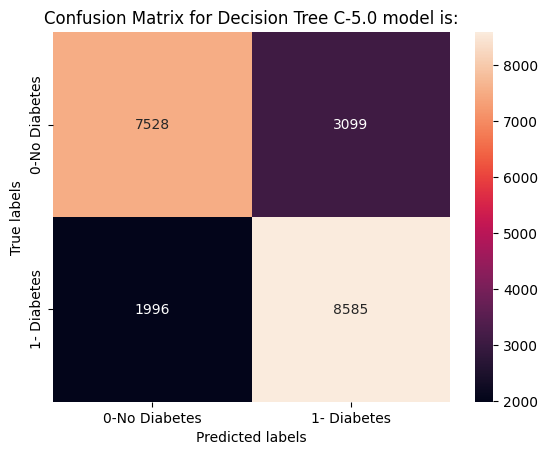

In [104]:
def plot(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f"Confusion Matrix for Decision Tree C-5.0 model is:"); 
    ax.xaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    ax.yaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    plt.show()
print("Author:Milan Chandiramani")
plot(confusion_matrix(y_test, y_pred))

## Another ANN with 4 hidden layers i/p -> 42 -> 21 -> 10 -> 4 -> 1

In [51]:
dropout_rate = 0.1
epochs = 100
batch_size = 32
# learn_rate = 0.001

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=42, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(dropout_rate))
model.add(Dense(units=21, activation='relu', input_dim=h_neurons))
model.add(Dropout(dropout_rate))
model.add(Dense(units=10, activation='relu', input_dim=h_neurons))
model.add(Dropout(dropout_rate))
model.add(Dense(units=4, activation='relu', input_dim=h_neurons))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

# adam = Adam(learning_rate=learn_rate)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])
print(accuracies)
accuracy = accuracies[1]
print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}% : Hidden Neurons = {h_neurons}")

Epoch 1/100


D:\Stevens\Semester 1 Courses\CS559B\CS559B-env\CS559B-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.6812 - loss: 0.6053 - val_accuracy: 0.7460 - val_loss: 0.5282
Epoch 2/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.7439 - loss: 0.5419 - val_accuracy: 0.7469 - val_loss: 0.5178
Epoch 3/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.7389 - loss: 0.5369 - val_accuracy: 0.7478 - val_loss: 0.5156
Epoch 4/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.7401 - loss: 0.5304 - val_accuracy: 0.7526 - val_loss: 0.5107
Epoch 5/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.7447 - loss: 0.5257 - val_accuracy: 0.7449 - val_loss: 0.5154
Epoch 6/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7421 - loss: 0.5268 - val_accuracy: 0.7477 - val_loss: 0.5100
Epoch 7/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.7490 - loss: 0.5180 - val_accuracy: 0.7506 - val_loss: 0.5110
Epoch 8/100
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7452 - los

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
[[7519 3108]
 [2113 8468]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74     10627
           1       0.73      0.80      0.76     10581

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



In [53]:
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])

663/663 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7528 - loss: 0.5045
Test score: 0.5046844482421875
Test Accuracy; 0.7538192868232727


In [54]:
print(accuracies)

[0.5046844482421875, 0.7538192868232727]
